# <center> <b>MSc Data Science Project (6G7V0007_2324_9S)</b></center>

## <center><b>Flight Fare Prediction System v.1.00</b></center>

### <b>Introduction</b>

This project aims to develop a robust and accurate flight fare prediction system using multiple machine learning algorithms and to identify the features that most significantly impact fare prices. Flight fare datasets from different airlines are collected and preprocessed. Various machine learning algorithms, including linear regression, decision trees, random forests, and gradient boosting, are implemented and compared for their predictive performance using metrics such as RMSE, MAE, and R². The best-performing models are fine-tuned for optimal performance. Additionally, the project analysed the independent features in the dataset to determine their contributions to fare fluctuations by employing SHapley Additive exPlanations (SHAP) for both global and local model interpretability. This comprehensive approach aims to provide accurate fare predictions and valuable insights into the factors driving fare changes, benefiting both consumers and airlines.

### <b>1. Importing Required Libraries</b>

In this section, all the relevant Python libraries are imported in one place for ease of use. This includes libraries for data manipulation, visualization, machine learning, and model evaluation. By importing these libraries at the beginning, it is ensured that all necessary tools are available throughout the notebook and are easily manageable.

In [1]:
# Importing basic python libraries
import numpy as np
import pandas as pd
import datetime
import math

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing splitting libraries
from scipy.stats import f_oneway
from sklearn.model_selection import StratifiedShuffleSplit

# Importing encoding libraries
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder

# Importing scaling libraries
from sklearn.preprocessing import RobustScaler

# Importing Pipeline libraries
from sklearn.pipeline import Pipeline

# Importing mean cross validation libraries
from sklearn.model_selection import cross_val_score

# Importing machine learning model libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing R2 Sccore and error calculation libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Importing cross validation search libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Importing ensemble libraries
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

# Importing SHAP libraries
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### <b>2. Importing Datasets</b>

The dataset was sourced from the EaseMyTrip website, and the Octoparse tool was employed to scrape data, focusing on flight booking options. The data collection was divided into two categories: economy class and business class tickets. Over a span of 50 days, from February 11th to March 31st, 2022, it contains all the flight details for travel between India's top six metro cities. Moreover, the data was extracted on February 10th, 2022.

Two datasets, business.csv and economy.csv, are imported into pandas data frames named `business` and `economy`, respectively. Then, a new column called `class` are added to each data frame, assigning the value 'Business' to all rows in the `business` data frame and 'Economy' to all rows in the `economy` data frame. After that, these two data frames are concatenated into a single data frame `df`, combining all rows from both datasets while ignoring the original index. Finally, the first few rows of the combined DataFrame df were displayed using the `head()` method.

In [2]:
# Importing the dataset
business = pd.read_csv('../Dataset/business.csv')
economy = pd.read_csv('../Dataset/economy.csv')

# Including class of the flight in the dataset
business['class'] = 'Business'
economy['class'] = 'Economy'

# Concatenating the two datasets
df = pd.concat([economy, business], ignore_index=True)

### <b>3. Data Understanding and Cleaning</b>

In this step, the process begins with acquiring domain knowledge to fully understand the context and significance of the data. This understanding helps in identifying key features and potential issues within the dataset. Following this, the initial data inspection is performed to uncover any inconsistencies, missing values, or anomalies. Based on these findings, data cleaning is carried out, which includes addressing missing values, correcting data types, removing duplicates, standardizing entries, and handling outliers. The aim is to ensure that the data is accurate, consistent, and ready for further analysis and modeling.

#### <b>a. Initial Data Overview</b>

The initial data overview involves using the `df.info()` method in pandas to get a concise summary of the data frame. This summary includes the number of non-null entries, the data type of each column, and the memory usage of the data frame. This step is crucial for quickly understanding the structure and composition of the data frame, identifying any missing values, and assessing the overall size of the dataset. This information helps in planning the subsequent data cleaning and preprocessing steps.

In [3]:
# Checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


<b>Observation(s):</b>

* The dataset contains 300,261 entries and 12 features.
* All columns have non-null values, indicating there are no missing values.
* There are 11 features with data type object (strings) and 1 column with data type int64.
* The memory usage of the DataFrame is 27.5+ MB.

#### <b>b. Removing Duplicate Rows</b>

This step involves identifying and removing duplicate rows from the DataFrame to ensure data integrity. Initially, the number of duplicate rows are determined and then these duplicated rows are displayed. This process helps in cleaning the dataset by eliminating redundant entries, thereby improving the quality of the data for analysis and modeling.

In [4]:
# Checking for duplicate rows
print("Number of duplicate rows are:", df.duplicated(keep=False).sum())

# Displaying the duplicated rows
df[df.duplicated(keep=False)]

Number of duplicate rows are: 4


date    airline ch_code  num_code dep_time   from time_taken  \
516   14-02-2022  Air India      AI       807    17:20  Delhi    15h 15m   
563   14-02-2022  Air India      AI       807    17:20  Delhi    15h 15m   
6080  13-03-2022  Air India      AI       475    13:00  Delhi    24h 35m   
6181  13-03-2022  Air India      AI       475    13:00  Delhi    24h 35m   

                                                   stop arr_time      to  \
516   1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    08:35  Mumbai   
563   1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    08:35  Mumbai   
6080  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    13:35  Mumbai   
6181  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    13:35  Mumbai   

       price    class  
516   12,150  Economy  
563   12,150  Economy  
6080   4,780  Economy  
6181   4,780  Economy

After identifying four duplicate rows, these rows are removed from the data frame to ensure data integrity. It is modified in place to drop the duplicates. Following the removal, the data frame is checked again to confirm that no duplicate rows remain. This ensures that the dataset is free from redundant entries, thereby improving its quality for subsequent analysis and modeling.

In [5]:
# Dropping the duplicated rows
df.drop_duplicates(inplace=True)

# Checking for duplicates again to be sure
print("Number of duplicate rows are: ", df.duplicated(keep=False).sum())

Number of duplicate rows are:  0


<b>Observation(s):</b>

* Four duplicate rows are identified and removed from the dataset. Despite the flight timings being consistent throughout the year, flights with identical descriptions on the same date and time are highly unlikely. Therefore, these duplicates are removed to maintain data consistency.

#### <b>c. Missing / NaN Values</b>

In the next step, missing or NaN values are checked in the DataFrame to ensure data completeness. The count of missing values for each column is determined. Identifying these missing values is crucial for understanding the extent of data gaps and planning appropriate strategies to handle them, such as imputation or removal, to ensure the dataset is ready for analysis and modeling.

In [6]:
# Checking for missing / NaN values in the dataset
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

<b>Observation(s):</b>

* No missing values are identified in any of its features in the dataset.

#### <b>d. Data Type Verification</b>

To ensure that each feature has the correct data type, the data types are checked in the early stages. This verification is crucial for making subsequent steps of the project, such as analysis and visualisation, much easier and more accurate. Correct data types help in applying appropriate operations and functions on the data, thereby enhancing the overall data processing workflow.

In [7]:
# Checking Data Types and sample values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300259 non-null  object
 1   airline     300259 non-null  object
 2   ch_code     300259 non-null  object
 3   num_code    300259 non-null  int64 
 4   dep_time    300259 non-null  object
 5   from        300259 non-null  object
 6   time_taken  300259 non-null  object
 7   stop        300259 non-null  object
 8   arr_time    300259 non-null  object
 9   to          300259 non-null  object
 10  price       300259 non-null  object
 11  class       300259 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


First, a sample of the price column is extracted before converting it to int64. By displaying a random sample of 10 rows from the price column, it provides an initial view of the data, including any formatting issues such as the presence of commas in the price values. This step helps in understanding the current state of the data and identifying any necessary preprocessing steps.

In [8]:
# Checking a sample of price column before converting it to int64
df.sample(10)

date    airline ch_code  num_code dep_time       from  \
294256  26-02-2022    Vistara      UK       822    09:45    Chennai   
65688   07-03-2022  Air India      AI       888    19:00     Mumbai   
209076  05-03-2022  Air India      AI       441    17:50      Delhi   
58269   14-03-2022   GO FIRST      G8      7545    12:30     Mumbai   
166737  23-02-2022  Air India      AI       559    06:30  Hyderabad   
180870  15-02-2022     Indigo      6E       605    13:05    Chennai   
20771   15-02-2022    Vistara      UK       953    20:40      Delhi   
199132  25-02-2022     Indigo      6E       606    17:55    Chennai   
277444  13-02-2022    Vistara      UK       870    20:35  Hyderabad   
204307  02-03-2022     Indigo      6E       847    16:30    Chennai   

       time_taken                                               stop arr_time  \
294256    23h 05m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    08:50   
65688     14h 00m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    09:00   
209076    03h 45m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...    21:35   
58269     01h 40m                                          non-stop     14:10   
166737    13h 35m                                            2+-stop    20:05   
180870    07h 40m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:45   
20771     13h 00m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    09:40   
199132    02h 05m                                          non-stop     20:00   
277444    26h 15m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    22:50   
204307    03h 55m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:25   

               to   price     class  
294256  Bangalore  44,144  Business  
65688     Kolkata   4,556   Economy  
209076     Mumbai  22,152  Business  
58269   Bangalore   2,124   Economy  
166737  Bangalore  15,373   Economy  
180870      Delhi   7,877   Economy  
20771     Kolkata  14,880   Economy  
199132    Kolkata   5,042   Economy  
277444     Mumbai  83,594  Business  
204307  Hyderabad   2,862   Economy

The next step involves cleaning and converting the price column to an integer data type. Commas are removed from the price values to ensure they are in a suitable format for numerical operations. The column is then converted to an integer data type, which is essential for accurate numerical analysis and modeling. After the conversion, a sample of the price column is checked again to verify that the transformation was successful. This ensures that the data is now in the correct format and ready for further analysis.

In [9]:
# Removing ',' in the price column before converting it to int64
df['price'] = df['price'].str.replace(',', '').astype('int64')

# Checking a sample of price column after converting it to int64
df.sample(10)

date    airline ch_code  num_code dep_time       from  \
154986  05-03-2022    Vistara      UK       890    17:40  Hyderabad   
95942   23-02-2022    Vistara      UK       893    19:55  Bangalore   
7095    18-03-2022     Indigo      6E      5328    09:30      Delhi   
202554  29-03-2022    Vistara      UK       824    20:30    Chennai   
159791  21-02-2022    Vistara      UK       860    06:50  Hyderabad   
290772  17-02-2022    Vistara      UK       836    10:45    Chennai   
243618  12-03-2022  Air India      AI       442    15:35     Mumbai   
273788  08-03-2022    Vistara      UK       772    10:25    Kolkata   
247819  20-03-2022    Vistara      UK       864    19:00  Bangalore   
243984  17-03-2022  Air India      AI       806    08:00     Mumbai   

       time_taken                                               stop arr_time  \
154986    02h 15m                                          non-stop     19:55   
95942     14h 05m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    10:00   
7095      02h 30m                                          non-stop     12:00   
202554    23h 25m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    19:55   
159791    13h 15m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:05   
290772    09h 20m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:05   
243618    08h 00m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...    23:35   
273788    12h 40m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:05   
247819    05h 55m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    00:55   
243984    15h 35m  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:35   

             to  price     class  
154986    Delhi   2350   Economy  
95942    Mumbai   8224   Economy  
7095     Mumbai   3001   Economy  
202554  Kolkata   7081   Economy  
159791   Mumbai  11854   Economy  
290772   Mumbai  64113  Business  
243618  Chennai  49613  Business  
273788  Chennai  55502  Business  
247819    Delhi  42521  Business  
243984  Chennai  49613  Business

<b>Observation(s):</b>

* Majorly, all the columns have the correct data type, except for some which will be first utilised for data cleaning and feature engineering purposes before changing their data type or entirely dropping them from the dataset.
* The price column initially contained comma-separated values, which are removed to convert the data into a numerical format. After removing the commas, the values are casted to int64, ensuring that the price column is in a suitable format for numerical analysis and computations.

#### <b>e. Data Inconsistencies</b>

This step involves identifying data inconsistencies within the DataFrame. By examining the unique values for each column, it helps to determine whether all values are correct, consistent, and valuable for analysis. This process is crucial for ensuring data quality and reliability, as it allows for the detection and correction of any anomalies or errors in the dataset. Regarding the implementation, the code below involves viewing the unique values in all columns of the data frame. By iterating over each column and printing its unique values, it helps to identify any data inconsistencies or anomalies. This examination is essential for ensuring that the data is correct, consistent, and valuable for analysis, and it aids in detecting any errors that need to be addressed during the data cleaning process.

In [10]:
# Viewing the unique values in all the columns
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

date: ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']
airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']
ch_code: ['SG' 'I5' 'UK' 'G8' '6E' 'AI' '2T' 'S5']
num_code: [8709 8157  764 ... 7127 7259  433]
dep_time: ['18:55' '06:20' '04:25' '10:20' '08:50' '11:40' '09:30' '14:20' '08:00'
 '15:00' '10:30' '07:15' '12:00' '08:45' '07:00' '19:00' '06:25' '05:50'

After the analysis of unique values of all features, the issues are corrected first. In the first step, cleaning and standardising the values in the `stop` column of the data frame takes place. It first removes any extra text following '1-stop' using a regular expression, then replaces 'non-stop' with 'Zero'. Next, it uses a lambda function to replace any occurrence of '1-stop' with 'One'. Finally, the procedure below replaces '2+-stop' with 'Two or More'. This ensures that the `stop` column has consistent and standardised values, which is crucial for accurate analysis and modeling.

In [11]:
# In the stop column, cleaning the stopover / layover data
df['stop'] = df['stop'].str.replace(r'1-stop[\s\S]*', '1-stop', regex=True)
df['stop'] = df['stop'].replace('non-stop ', 'Zero')
df['stop'] = df['stop'].apply(lambda x: 'One' if '1-stop' in x else x)
df['stop'] = df['stop'].replace('2+-stop', 'Two or More')


Lastly, the rows in the `time_taken` column are displayed where a decimal point is present immediately after the first character by using a regular expression to match this pattern. Then, it deletes these observations from the DataFrame to clean the data by filtering out rows that match the same pattern. This ensures that the `time_taken` column is free from inconsistencies and is in a suitable format for analysis.

In [12]:
# Displaying the rows in the time_taken column where after first character, a decimal point is present
df[df['time_taken'].str.contains(r'^[0-9]\.', regex=True)]

# Deleting these observations to clean the data and also to standardise it
df = df[~df['time_taken'].str.contains(r'^[0-9]\.', regex=True)]

<b>Observation(s):</b>

* Standardised the values in the `stop` column by removing extra text after '1-stop', and replacing 'non-stop' with 'Zero', '1-stop' with 'One', and '2+-stop' with 'Two or More'.
* Identified and removed rows in the `time_taken` column where a decimal point appears immediately after the first character, ensuring cleaner and more consistent data.

#### <b>f. Checking for Negative Values</b>

This step involves checking for and removing negative values in the numeric columns of the DataFrame. Ensuring that the dataset is free from negative values is crucial for maintaining data integrity and accuracy, as negative values in certain columns may indicate errors or inconsistencies that need to be addressed. This particular process begins by iterating through all numeric columns (both integers and floats) to count and print the occurrences of negative values for each column. This helps identify any potential data issues. Subsequently, any rows containing negative values in these numeric columns are removed from the data frame, ensuring that the dataset is clean and ready for accurate analysis and modeling.

In [13]:
# Checking for negative values in the numeric columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{col}: {df[col].lt(0).sum()}')

# Removing the negative values from the numeric columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df = df[~df[col].lt(0)]


num_code: 0
price: 0


<b>Observation(s):</b>

* Both the `num_code` and `price` columns have 0 negative values, indicating that there are no negative values in the numeric columns of the dataset.

### <b>4. Feature Engineering</b>

Feature engineering involves creating and selecting features to enhance model performance. This includes deriving new features from existing data, such as extracting information from datetime values. Continuous variables can be binned into categories based on ranges or frequency. This process helps in transforming raw data into meaningful features that better represent the underlying problem to the predictive models, thereby improving their accuracy and effectiveness.

#### <b>a. Calculating the Time Between Booking and Departure Dates</b>

To calculate the number of days left until the flight from a fixed date (10-02-2022), which is the date when the scraping of the dataset took place, this value is stored in a new column called `flight_days_left`. This is achieved by converting the `date` column values from string format to datetime objects and then computing the difference in days. After calculating the days left, the original `date` column is dropped from the data frame. This new feature helps in understanding the booking behavior and its impact on flight fares.

In [14]:
# Substracting date value with 10-02-2022 to get the number of days left for the flight
df['flight_days_left'] = df['date'].apply(lambda x: (datetime.datetime.strptime(x, '%d-%m-%Y') - datetime.datetime.strptime('10-02-2022', '%d-%m-%Y')).days)

# Dropping the date column to avoid redundancy
df.drop(['date'], axis=1, inplace=True)

<b>Observation(s):</b>

* The conversion of the booking date to the number of days left until the flight departure is done to create a numerical feature that is more suitable for machine learning models. This transformation helps the model to better understand and process temporal data, potentially improving the accuracy of predictions. After this conversion, the original date column is dropped to eliminate redundancy and to simplify the dataset.

#### <b>b. Extracting and Categorising Departure Hours</b>

To convert the `dep_time` column into bins, the procedure first extracts the hour and minute values and saves them in a new data frame. Then, the hour value is adjusted based on the minute value, decrementing the hour by 1 if the minute is 0 and replacing any resulting -1 values with 23. Using predefined bin edges and labels, the adjusted hour values are categorized into time-of-day categories. Rows with null values in the new `departure_time` column are removed, and finally, the original `dep_time` column is dropped from the data frame. This process helps in transforming the departure time into meaningful categorical features that can improve the performance of machine learning models.

In [15]:
# In dep_time column, extracting hour and saving in a new dataset of hour column name
temp = pd.DataFrame(df['dep_time'].str.split(':', expand=True).to_numpy().astype(int), columns=['hour', 'minute'])

# Adjusting hour based on minute value
temp['adjusted_hour'] = temp.apply(lambda row: (row['hour'] - 1) if row['minute'] == 0 else row['hour'], axis=1)
temp['adjusted_hour'] = temp['adjusted_hour'].replace(-1, 23)

# Defining the bins and labels for the departure time
bin_edges = [0, 4, 8, 12, 16, 20, 24]
labels = ["Late Night", "Early Morning", "Morning", "Afternoon", "Evening", "Night"]

# Using pd.cut to categorize dep_time based on the adjusted hour
df['departure_time'] = pd.cut(temp['adjusted_hour'], bins=bin_edges, labels=labels, right=False, include_lowest=True)

# Removing rows where departure_time is null
df = df[~df['departure_time'].isnull()]

# Dropping the dep_time column
df.drop(['dep_time'], axis=1, inplace=True)

<b>Observation(s):</b>

* The departure times are converted into categories like 'Morning' or 'Evening' to make it easier for the model to understand different times of the day.
* Grouping departure times into broader categories simplifies the model's task and can improve prediction accuracy.
* Adjusting the hour value when the minute is zero helps handle edge cases and ensures consistency.
* Removing rows with null values in the new categorical feature maintains data integrity.
* Dropping the original `dep_time` column avoids redundancy and keeps the dataset focused on the more relevant categorical feature.

#### <b>c. Extracting and Categorizing Arrival Hours</b>

Similar to the above step, this procedure also processes for the `arr_time` column to categorise arrival times into broader time-of-day labels. First, it splits the `arr_time` values into separate hour and minute columns and converts them to integers. It then adjusts the hour value by subtracting one if the minute is zero, ensuring that times like "00:00" are correctly categorized, and replaces any resulting negative hours with 23. Using predefined bin edges and labels, the adjusted hour values are categorised into time-of-day labels such as 'Late Night' and 'Morning'. Rows with null values in the new `arrival_time` column are removed to maintain data integrity, and finally, the original `arr_time` column is dropped to avoid redundancy. This process helps in transforming the arrival time into meaningful categorical features that can enhance the performance of machine learning models.

In [16]:
# In arr_time column, extracting hour and saving in a new dataset of hour column name
temp = pd.DataFrame(df['arr_time'].str.split(':', expand=True).to_numpy().astype(int), columns=['hour', 'minute'])

# Adjusting hour based on minute value
temp['adjusted_hour'] = temp.apply(lambda row: (row['hour'] - 1) if row['minute'] == 0 else row['hour'], axis=1)
temp['adjusted_hour'] = temp['adjusted_hour'].replace(-1, 23)

# Defining the bins and labels for the arrival time
bin_edges = [0, 4, 8, 12, 16, 20, 24]
labels = ["Late Night", "Early Morning", "Morning", "Afternoon", "Evening", "Night"]

# Using pd.cut to categorize dep_time based on the adjusted hour
df['arrival_time'] = pd.cut(temp['adjusted_hour'], bins=bin_edges, labels=labels, right=False, include_lowest=True)

# Removing rows where arrival_time is null
df = df[~df['arrival_time'].isnull()]

# Dropping the arr_time column
df.drop(['arr_time'], axis=1, inplace=True)

<b>Observation(s):</b>

* The arrival times are converted into categories like 'Morning' or 'Evening' to make it easier for the model to understand different times of the day.
* Grouping arrival times into broader categories simplifies the model's task and can improve prediction accuracy.
* Adjusting the hour value when the minute is zero helps handle edge cases and ensures consistency.
* Removing rows with null values in the new categorical feature maintains data integrity.
* Dropping the original `arr_time` column avoids redundancy and keeps the dataset focused on the more relevant categorical feature.

#### <b>d. Calculating Total Flight Time</b>

The procedure processes the `time_taken` column by extracting hours and minutes, handling missing minute values by assigning them to 0, converting minutes to a fraction of an hour, and then combining hours and fractional minutes to get the total time taken in hours. This total time is rounded to two decimal places. Finally, the original `time_taken` column is replaced with this new calculated time, and the intermediate columns are dropped to clean up the dataset.

In [17]:
# Extracting the time taken from the time_taken column and save in a new dataset
temp = pd.DataFrame(df['time_taken'],columns=['time_taken'])

# Extracting the hours and minutes from the time_taken column
temp = temp['time_taken'].str.extract(r'(\d+)h (\d+)m')
temp.columns = ['hours', 'minutes']

# If minutes is null, then assigning 0 to it
temp['minutes'] = temp['minutes'].fillna(0)

# Dividing minutes by 60 in a new float column
temp['minutes_calculated'] = temp['minutes'].astype(float)/60

# Concatenating hours and minutes calculated to get the total time taken in hours and round it to 2 decimal places
temp['time_taken'] = temp['hours'].astype(float) + temp['minutes_calculated'].round(2)

# Dropping the hours and minutes columns
temp.drop(['hours', 'minutes', 'minutes_calculated'], axis=1, inplace=True)

# Replacing the time_taken column with the new time_taken column
df['time_taken'] = temp['time_taken']

<b>Observation(s):</b>

* The values in the `time_taken` column are initially in string format. To analyse and extract key patterns and insights, these values are converted into a numerical format (float). This involves extracting hours and minutes, handling missing minute values, converting minutes to a fraction of an hour, and combining them to get the total time taken in hours. This transformation ensures that the `time_taken` data is in a suitable format for numerical analysis and modeling.

#### <b>e. Creating Flight Numbers from Codes</b>

This step involves creating a new `flight_number` column by concatenating the `ch_code` and `num_code` columns in the data frame. The `num_code` is converted to a string and joined with `ch_code` using a hyphen. After creating the `flight_number` column, the original `ch_code` and `num_code` columns are dropped from the data frame to avoid redundancy and keep the dataset focused on the more relevant combined feature. This transformation helps in simplifying the dataset and creating a unique identifier for each flight.

In [18]:
# Concatenating the ch_code and num_code to get the flight number for every row
df['flight_number'] = df['ch_code'] + '-' + df['num_code'].astype(str)

# Dropping the ch_code and num_code columns
df.drop(['ch_code', 'num_code'], axis=1, inplace=True)

<b>Observation(s):</b>

* Combined `ch_code` and `num_code` into a new column `flight_number` to make it easier to interpret and use in the analysis, and to reduce dimensionality.

#### <b>f. Rearranging and Standardising Feature Names</b>

This step involves changing the column names of the DataFrame to a new set of descriptive names and then rearranging the columns to a specified order. This ensures that the data frame has standardised and well-ordered columns, making it easier to work with and understand.

In [19]:
# Changing the column names for standardisation
df.columns = ['Airline Name', 'Departure City', 'Flight Duration', 'Number of Stops', 'Destination City', 'Price', 'Seat Class', 'Flight Days Left', 'Departure Time', 'Destination Time', 'Flight Number']

# Rearranging the columns
df = df[['Airline Name', 'Flight Number', 'Seat Class', 'Departure City', 'Departure Time',  'Number of Stops', 'Destination City', 'Destination Time', 'Flight Duration', 'Flight Days Left','Price']]

<b>Observation(s):</b>

* The column names are changed and rearranged in the data frame to improve readability, consistency, and usability. By renaming the columns to more descriptive names, the data frame becomes easier to understand and work with.
* Rearranging the columns to a specific order ensures that the data is organised in a logical sequence, which is useful for analysis, reporting, or meeting the requirements of specific algorithms or processes. This helps in maintaining a clean and well-structured dataset.

#### <b>g. Outlier Detection and Treatment</b>

The code extracts numeric columns from a data frame `df` and creates boxplots for each numeric column in a subplot. It first identifies numeric columns and calculates the number of subplots needed. It then sets up a figure with an appropriate size and iterates through each numeric column to create a boxplot using seaborn's boxplot function. For each boxplot, it calculates the Interquartile Range (IQR) and determines the lower and upper bounds for potential outliers, which are then plotted as vertical lines. These bounds are annotated on the plot, and each subplot is titled with the column name. Finally, the layout is adjusted for better spacing, and the plots are displayed.

Index(['Flight Duration', 'Flight Days Left', 'Price'], dtype='object')


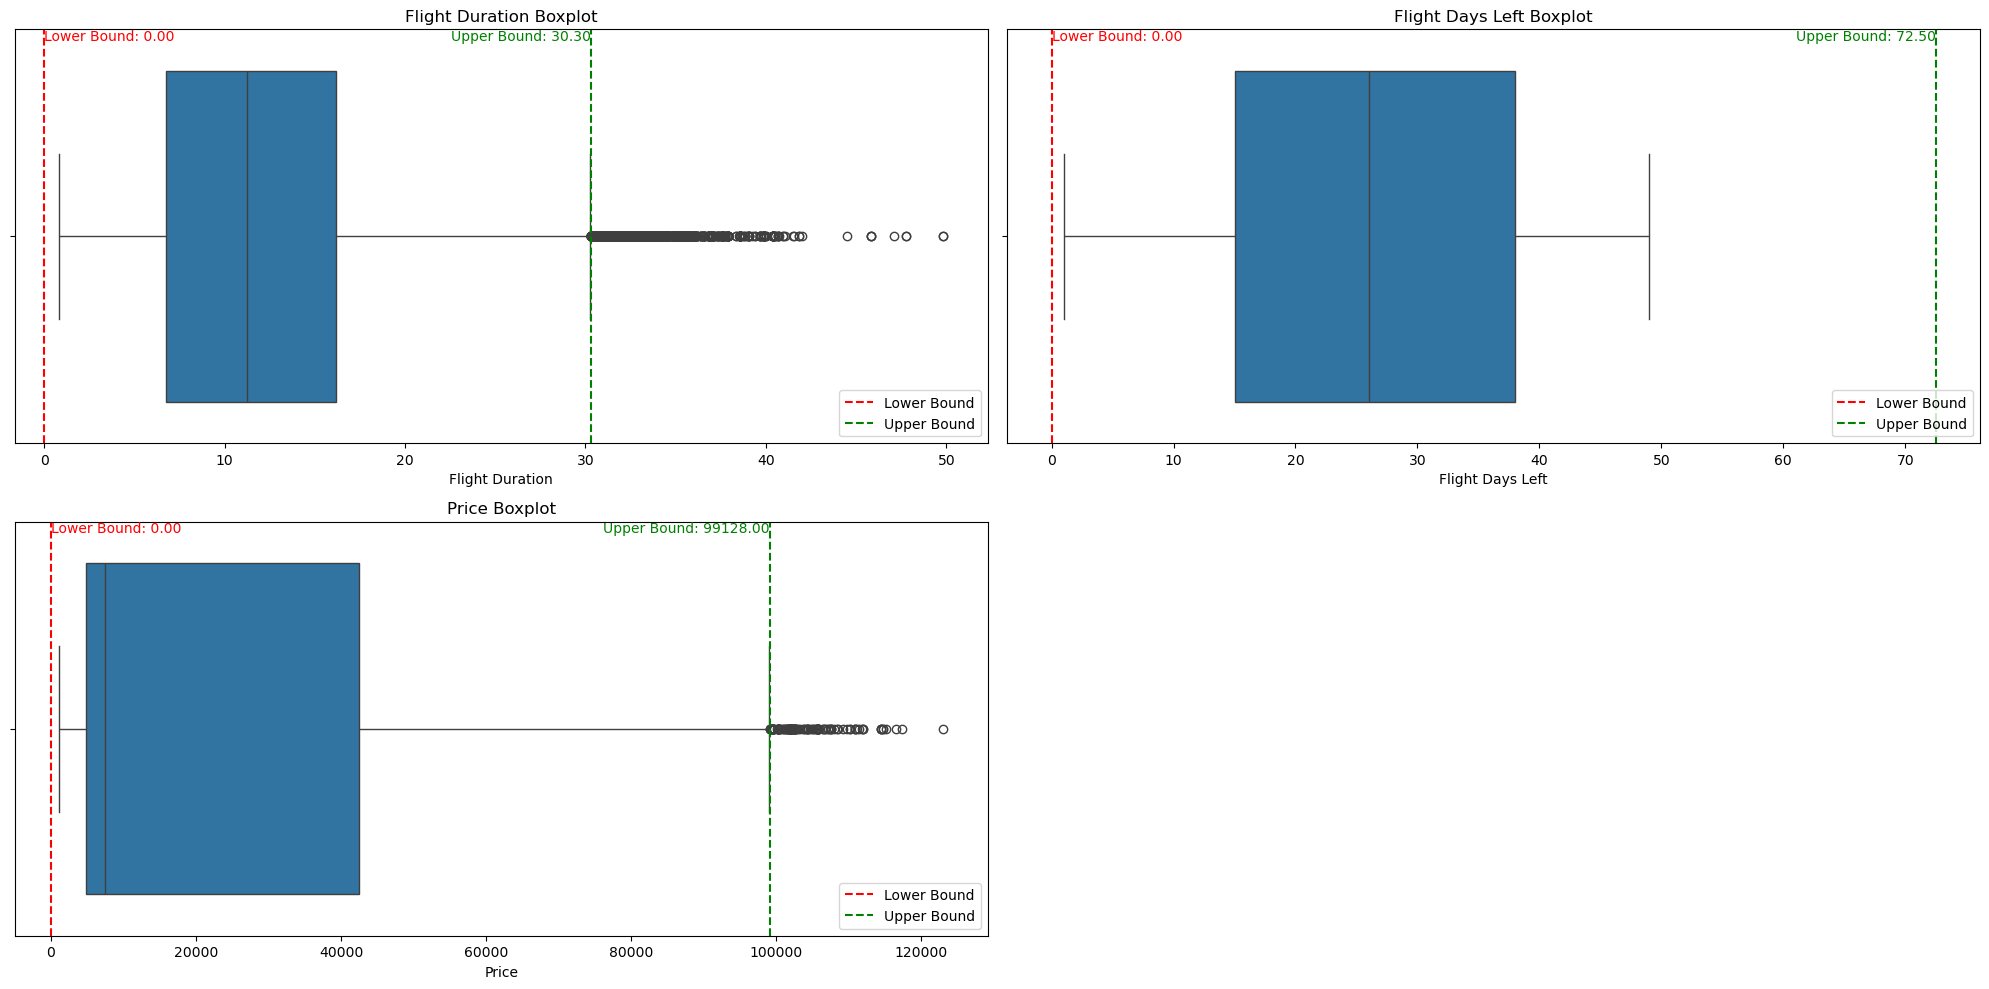

In [20]:
# Extracting the numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

# Determining the number of rows and columns for subplots
num_plots = len(num_cols)
num_cols_subplot = 2
num_rows_subplot = (num_plots + 1) // num_cols_subplot

# Creating boxplot of numeric columns in a single loop in a subplot
plt.figure(figsize=(20, 5 * num_rows_subplot))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows_subplot, num_cols_subplot, i + 1)
    sns.boxplot(x=df[col])
    
    # Calculating IQR bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)
    upper_bound = Q3 + 1.5 * IQR
    
    # Plotting IQR bounds
    plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='g', linestyle='--', label='Upper Bound')
    
    # Annotating the bounds
    plt.text(lower_bound, plt.ylim()[1] * 0.95, f'Lower Bound: {lower_bound:.2f}', color='r', ha='left')
    plt.text(upper_bound, plt.ylim()[1] * 0.95, f'Upper Bound: {upper_bound:.2f}', color='g', ha='right')
    
    plt.title(f'{col} Boxplot')
    plt.legend(loc='lower right')

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()

There are a number of outliers found in the `Flight Duration` column. To investigate the reason behind these outliers, all values where the flight duration is more than 30 hours and 30 minutes are extracted for further analysis.

In [21]:
# Masking flight duration greater than 30.30 hours of flight duration
mask = df['Flight Duration'] >= 30.30

# Displaying the rows where flight duration is greater than 30.30 of flight duration
df[mask]

Airline Name Flight Number Seat Class Departure City Departure Time  \
10536       Vistara        UK-706    Economy          Delhi        Evening   
10537       Vistara        UK-706    Economy          Delhi      Afternoon   
10542     Air India       AI-9887    Economy          Delhi        Evening   
10893       Vistara        UK-706    Economy          Delhi  Early Morning   
10894       Vistara        UK-706    Economy          Delhi      Afternoon   
...             ...           ...        ...            ...            ...   
296172    Air India        AI-440   Business        Chennai          Night   
296405    Air India        AI-440   Business        Chennai  Early Morning   
296499    Air India        AI-440   Business        Chennai        Evening   
296824    Air India        AI-440   Business        Chennai          Night   
297769    Air India        AI-440   Business        Chennai          Night   

       Number of Stops Destination City Destination Time  Flight Duration  \
10536      Two or More        Bangalore        Afternoon            31.25   
10537      Two or More        Bangalore        Afternoon            33.17   
10542      Two or More        Bangalore          Evening            36.92   
10893      Two or More        Bangalore        Afternoon            31.25   
10894      Two or More        Bangalore            Night            33.17   
...                ...              ...              ...              ...   
296172             One          Kolkata          Evening            30.33   
296405             One          Kolkata          Evening            30.33   
296499             One          Kolkata          Morning            30.33   
296824             One          Kolkata          Morning            30.33   
297769             One          Kolkata          Morning            30.33   

        Flight Days Left  Price  
10536                  4  12222  
10537                  4  12222  
10542                  4  12321  
10893                  6  12222  
10894                  6  12222  
...                  ...    ...  
296172                 5  55377  
296405                10  55377  
296499                12  55377  
296824                19  55377  
297769                40  55377  

[2004 rows x 11 columns]

Moreover, there are also a number of outliers found in the `Price` columns. To investigate the reason behind these outliers, all values where the `price` column were extracted where the value is is greater than INR 99,128.00 for further analysis.

In [22]:
# Masking price greather than INR 99,128.00
mask =df['Price'] >= 99128.00

# Displaying the rows where price is greater than INR 99,128.00
df[mask]

Airline Name Flight Number Seat Class Departure City Departure Time  \
215966      Vistara        UK-809   Business          Delhi      Afternoon   
215967      Vistara        UK-809   Business          Delhi      Afternoon   
216133      Vistara        UK-817   Business          Delhi        Evening   
216202      Vistara        UK-995   Business          Delhi  Early Morning   
216203      Vistara        UK-963   Business          Delhi          Night   
...             ...           ...        ...            ...            ...   
293582      Vistara        UK-836   Business        Chennai        Morning   
296109      Vistara        UK-838   Business        Chennai          Night   
296189      Vistara        UK-832   Business        Chennai      Afternoon   
296278      Vistara        UK-838   Business        Chennai        Morning   
296512      Vistara        UK-838   Business        Chennai        Morning   

       Number of Stops Destination City Destination Time  Flight Duration  \
215966     Two or More          Kolkata          Evening            21.08   
215967     Two or More          Kolkata            Night            21.08   
216133     Two or More          Kolkata          Evening            17.58   
216202             One          Kolkata        Afternoon             6.50   
216203             One          Kolkata            Night             8.00   
...                ...              ...              ...              ...   
293582             One        Bangalore          Morning             9.67   
296109             One          Kolkata          Evening            11.50   
296189             One          Kolkata          Morning            15.83   
296278             One          Kolkata          Evening            11.50   
296512             One          Kolkata          Evening            21.00   

        Flight Days Left   Price  
215966                 1  114434  
215967                 1  116562  
216133                 4  100395  
216202                 5   99129  
216203                 5  101369  
...                  ...     ...  
293582                 3  107597  
296109                 3  102832  
296189                 5  102384  
296278                 7  104624  
296512                12  102384  

[123 rows x 11 columns]

<b>Observation(s):</b>

* It is observed that there are a considerable number of outliers in the `Flight Duration` feature where the value is equal to or greater than 30.30 hours. Upon verifying these details with the original source (website), it was revealed that such long durations indeed exist for certain domestic flights in a small number.
* There are also some outliers in the `Price` feature where the value is equal to or greater than INR 99,128.00. After analysing the relevant dataset, it was found that these high prices correspond to business class seats, reflecting the higher costs associated with premium seating options.
* Both the `Flight Duration` and `Price` columns are retained to represent rows with rare occurrences, such as extremely expensive tickets and some of the most unusual long flight durations. This ensures that the dataset captures these exceptional cases for comprehensive analysis.

### <b>5. Exploratory Data Analysis (EDA)</b>

After completing data cleaning and feature engineering, Exploratory Data Analysis (EDA) involves examining the processed dataset to uncover patterns and relationships. This includes summarising statistics, visualising feature distributions, and exploring correlations to understand how features interact with each other and the target variable. EDA ensures that the data is well-prepared and effective for modeling, providing insights that can help refine the feature set and improve the overall analysis. To start this process, numerical and categorical features are separated so that appropriate models and plots can be applied to them, extracting initial insights both statistically and through visualisation.

In [23]:
# Extracting the numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Extracting the categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

#### <b>a. Descriptive Statistical Analysis</b>

In the phase of Exploratory Data Analysis (EDA), descriptive statistical analysis involves summarising the main characteristics of a dataset. This includes calculating measures of central tendency (mean, median, mode), measures of variability (standard deviation, variance, range), and understanding the distribution of data. It helps in identifying patterns, detecting anomalies, and forming hypotheses for further analysis.

In [24]:
# Describing all columns
df.describe(include='all')

Airline Name Flight Number Seat Class Departure City Departure Time  \
count        300243        300243     300243         300243         300243   
unique            8          1569          2              6              6   
top         Vistara        UK-706    Economy          Delhi        Morning   
freq         127854          3235     206768          61343          71183   
mean            NaN           NaN        NaN            NaN            NaN   
std             NaN           NaN        NaN            NaN            NaN   
min             NaN           NaN        NaN            NaN            NaN   
25%             NaN           NaN        NaN            NaN            NaN   
50%             NaN           NaN        NaN            NaN            NaN   
75%             NaN           NaN        NaN            NaN            NaN   
max             NaN           NaN        NaN            NaN            NaN   

       Number of Stops Destination City Destination Time  Flight Duration  \
count           300243           300243           300243    300243.000000   
unique               3                6                6              NaN   
top                One           Mumbai            Night              NaN   
freq            250913            59106            91551              NaN   
mean               NaN              NaN              NaN        12.217755   
std                NaN              NaN              NaN         7.192916   
min                NaN              NaN              NaN         0.830000   
25%                NaN              NaN              NaN         6.750000   
50%                NaN              NaN              NaN        11.250000   
75%                NaN              NaN              NaN        16.170000   
max                NaN              NaN              NaN        49.830000   

        Flight Days Left          Price  
count      300243.000000  300243.000000  
unique               NaN            NaN  
top                  NaN            NaN  
freq                 NaN            NaN  
mean           26.003747   20882.294505  
std            13.560498   22694.725010  
min             1.000000    1105.000000  
25%            15.000000    4783.000000  
50%            26.000000    7425.000000  
75%            38.000000   42521.000000  
max            49.000000  123071.000000

<b>Observation(s):</b>

* The dataset includes flight information for 300,243 records.
* There are 8 unique airlines, with Vistara being the most common (127,854 records).
* The dataset contains 1,569 unique flight numbers, with UK-706 being the most frequent (3,235 records).
* The `Seat Class` column has 2 unique values, with Economy being the most frequent (206,768 records).
* The dataset includes flights from 6 unique departure cities, with Delhi being the most frequent (61,343 records).
* The `Departure Time` column has 6 unique values, with 'Morning' being the most common (71,183 records).
* The `Number of Stops` column has 3 unique values, with 'One' stop being the most frequent (250,913 records).
* The dataset includes flights to 6 unique destination cities, with 'Mumbai' being the most frequent (59,106 records).
* The `Destination Time` column has 6 unique values, with 'Night' for destination time being the most common (91,551 records).
* The `Flight Duration` ranges from 0.83 to 49.83 hours, with a mean of 12.22 hours and a standard deviation of 7.19 hours.
* The `Flight Days` Left ranges from 1 to 49 days, with a mean of 26.00 days and a standard deviation of 13.56 days.
* The `Price` ranges from INR 1,105 to INR 123,071, with a mean of INR 20,882.29 and a standard deviation of INR 22,694.73.

The step below involves calculating the median for quantitative features and the mode for qualitative features in the dataset. The median provides a robust measure of central tendency for numerical data, as it is less affected by outliers. The mode identifies the most frequently occurring value in categorical data, offering insights into the most common categories. By calculating these statistics, we gain a clearer understanding of the central values of numerical features and the predominant categories in categorical features, which aids in comprehensively understanding the dataset's characteristics.

In [25]:
# Calculating median and mode of quantitative and qualitative features in the dataset
print("Median of quantitative features in the dataset:", df[num_cols].median())
print("Mode of qualitative features in the dataset:", df[cat_cols].mode().iloc[0])

Median of quantitative features in the dataset: Flight Duration       11.25
Flight Days Left      26.00
Price               7425.00
dtype: float64
Mode of qualitative features in the dataset: Airline Name        Vistara
Flight Number        UK-706
Seat Class          Economy
Departure City        Delhi
Departure Time      Morning
Number of Stops         One
Destination City     Mumbai
Destination Time      Night
Name: 0, dtype: object


<b>Observation(s):</b>

* The median duration of a flight is 11.25 hours, indicating that half of the flights have a duration less than or equal to 11.25 hours and the other half have a duration greater than or equal to 11.25 hours.
* The median number of days left until the flight is 26 days, suggesting that typically, flights are booked 26 days in advance.
* The median fare is INR 7,425.00, meaning that half of the flight fares are less than or equal to INR 7,425.00 and the other half are greater than or equal to INR 7425.00.
* The most frequently occurring airline in the dataset is 'Vistara', indicating that it has the highest number of flights in the dataset.
* The most common flight number is 'UK-706', suggesting that this specific flight number appears more frequently than any other in the dataset.
* The most frequently booked seat class is 'Economy', showing that 'Economy' class tickets are the most popular among passengers.
* The most common departure city is 'Delhi', indicating that a significant number of flights originate from that city.
* The most frequent departure time is in the 'Morning', suggesting that most flights are scheduled to depart during that period.
* The most common number of stops is 'One', indicating that the majority of flights have one stopover.
* The most frequent destination city is 'Mumbai', showing that 'Mumbai' is the most common destination for flights in the dataset.
* The most common destination time is at 'Night', suggesting that most flights are scheduled to arrive at their destination during the night hours.

This step calculates the skewness of quantitative features in the dataset, which measures the asymmetry of the data distribution. A positive skewness value indicates a right-skewed distribution, a negative value indicates a left-skewed distribution, and a value close to zero suggests a symmetric distribution. Understanding the skewness helps identify potential transformations needed to normalize the data, thereby improving the performance of predictive models.

In [26]:
# Calculating and displaying skewness of quantitative features in the dataset
print("Skewness of quantitative features in the dataset:", df[num_cols].skew())

Skewness of quantitative features in the dataset: Flight Duration     0.602989
Flight Days Left   -0.035490
Price               1.061970
dtype: float64


<b>Observation(s):</b>

* The skewness of `Flight Duration` is approximately 0.60, indicating a moderate positive skew. This suggests that there are more flights with shorter durations, but a few flights have significantly longer durations.
* The skewness of `Flight Days` Left is around -0.04, indicating a nearly symmetric distribution. This suggests that the number of days left until the flight is fairly evenly distributed around the mean.
* The skewness of `Price` is approximately 1.06, indicating a high positive skew. This suggests that most flight prices are lower, but there are a few flights with significantly higher prices.

#### <b>b. Values Distributions of Quantitative Features</b>

This step involves generating histograms to visualise the value distribution of quantitative variables in the dataset. Histograms provide a graphical representation of the distribution of numerical data, showing the frequency of data points within specified ranges (bins). This helps in understanding the spread, central tendency, and skewness of the data, which are crucial for further analysis and modeling. The procedure to implement it starts by setting up a figure with a size of 20x10 inches and iterates through the numeric columns (`num_cols`). For each column, it creates a subplot in a 2x2 grid, formats the tick labels to plain style, and plots a histogram with 10 bins and black edges. The x-axis is labeled with the [column name], and the y-axis is labeled 'Frequency'. The title of each subplot is set to 'Histogram of [column name]'. Additionally, the code annotates each bar in the histogram with the count of values in that bin, placing the text at the center of the bin and slightly above the bar. Finally, the plots are displayed using `plt.show()`.

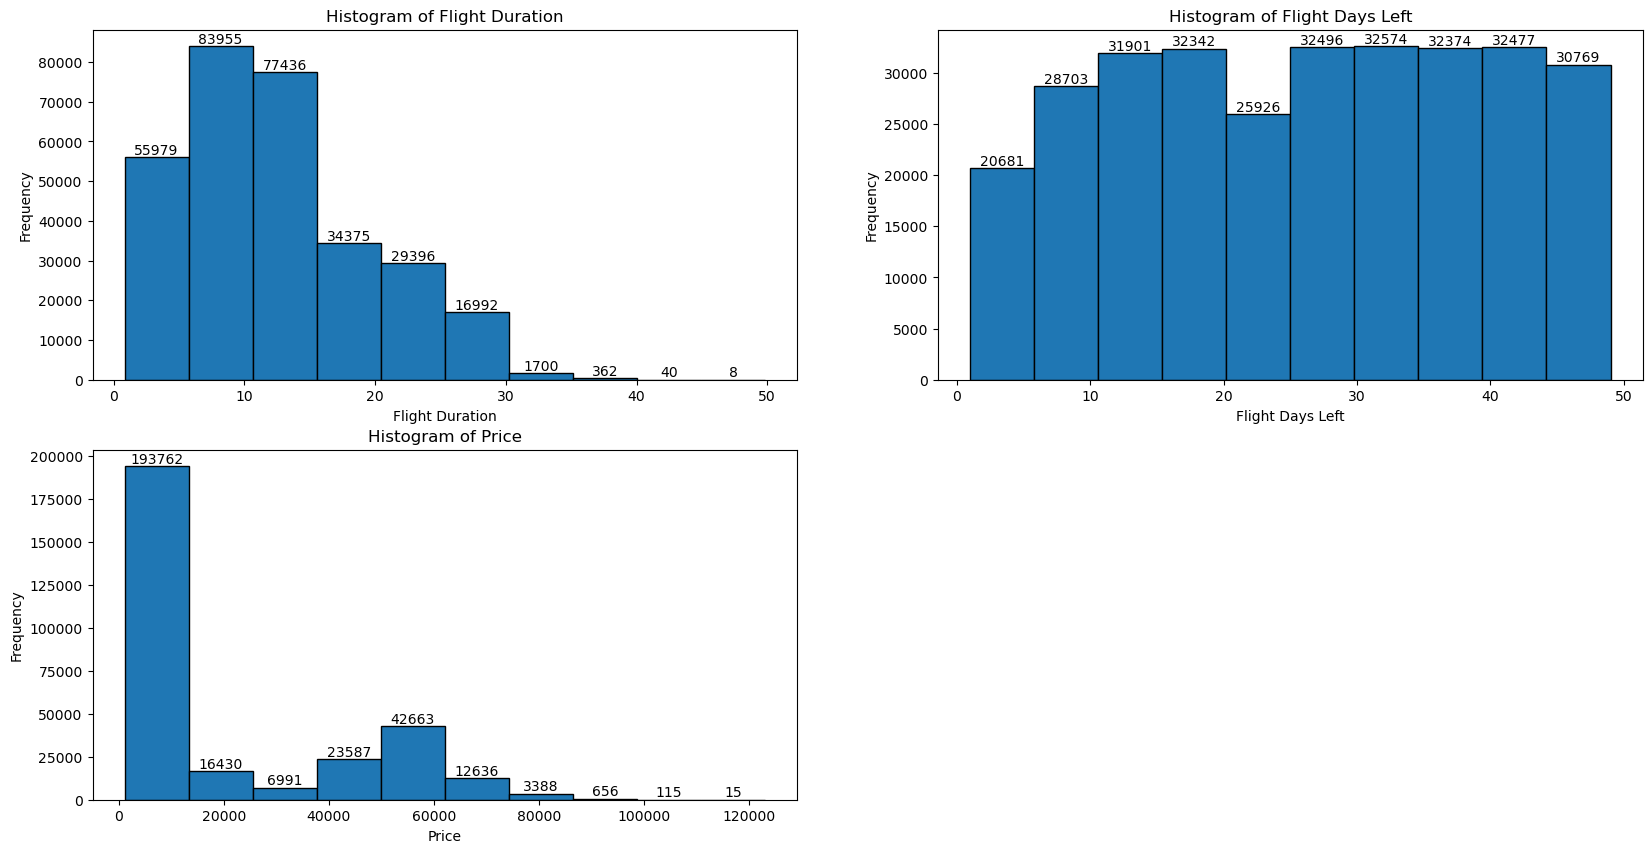

In [27]:
# Value Distribution of Quantitative Variables
plt.figure(figsize=(20,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    plt.ticklabel_format(style='plain')
    count, bins, patches = plt.hist(df[col], bins=10, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    for count, bin, patch in zip(count, bins, patches):
        height = patch.get_height()
        bin_center = bin + (bins[1] - bins[0]) / 2
        plt.text(bin_center, height + 3, str(int(count)), ha = 'center', va='bottom')
plt.show()


<b>Observation(s):</b>

- **Histogram of Flight Duration**
  - Most flights have a duration between 5 and 15 hours, indicating a common preference or operational range.
  - A noticeable decrease in frequency is observed for flights lasting 15 to 25 hours, suggesting fewer long-haul flights.
  - Very few flights have durations longer than 25 hours, indicating these are rare outliers.
  - The longest flight durations (30-50 hours) are extremely rare, highlighting an operational or demand limit.
  - The concentration of flights between 5 and 15 hours might be influenced by factors like popular travel destinations, airline schedules, and passenger preferences.

- **Histogram of Flight Days Left**
  - The distribution is fairly even across the range, indicating a balanced availability of flights regardless of how far in advance they are booked.
  - A slight dip in the number of flights around 15-25 days left suggests a temporary decrease in booking or availability during this period.
  - After 25 days, the number of flights stabilizes, showing consistent availability from 25 to 50 days left.
  - The overall trend shows that flights are uniformly available from the day of booking up to 50 days in advance.
  - The relatively even distribution of flight days left suggests a well-managed inventory and booking process, ensuring consistent availability for travelers.

- **Histogram of Price**
  - The majority of flights are priced between INR 0 and INR 20,000, indicating a high concentration of lower-cost flights.
  - A significant drop in frequency is seen for flights priced between INR 20,000 and INR 40,000, suggesting fewer mid-range priced flights.
  - There is a smaller peak for flights priced around INR 60,000, indicating a secondary preference or market for higher-priced flights.
  - Very few flights are priced above INR 80,000, with extremely rare cases above INR 100,000, highlighting a very limited market for high-end flights.
  - The high concentration of lower-cost flights might be attributed to competitive pricing strategies, budget-conscious travelers, or the availability of more affordable airlines.

#### <b>c. Quantitative Features' Associations with Price</b>

This step generates scatter plots to visualise the relationship between quantitative variables (`Flight Duration` and `Flight Days Left`) and `Price`, with points coloured by `Seat Class`. The code creates a figure of size 20x10 inches for each variable and uses seaborn's scatterplot function to plot the data, with the x-axis representing the quantitative variable and the y-axis representing `Price`. The hue parameter colours the points based on `Seat Class`, allowing for differentiation between different seat classes. Each plot is titled with the format "Variable vs Price", and the axes are labeled accordingly. Finally, the plots are displayed using `plt.show()`. This step provides visual insights into how `Flight Duration` and `Flight Days Left` are associated with `Price`, and how these associations vary across different seat classes.

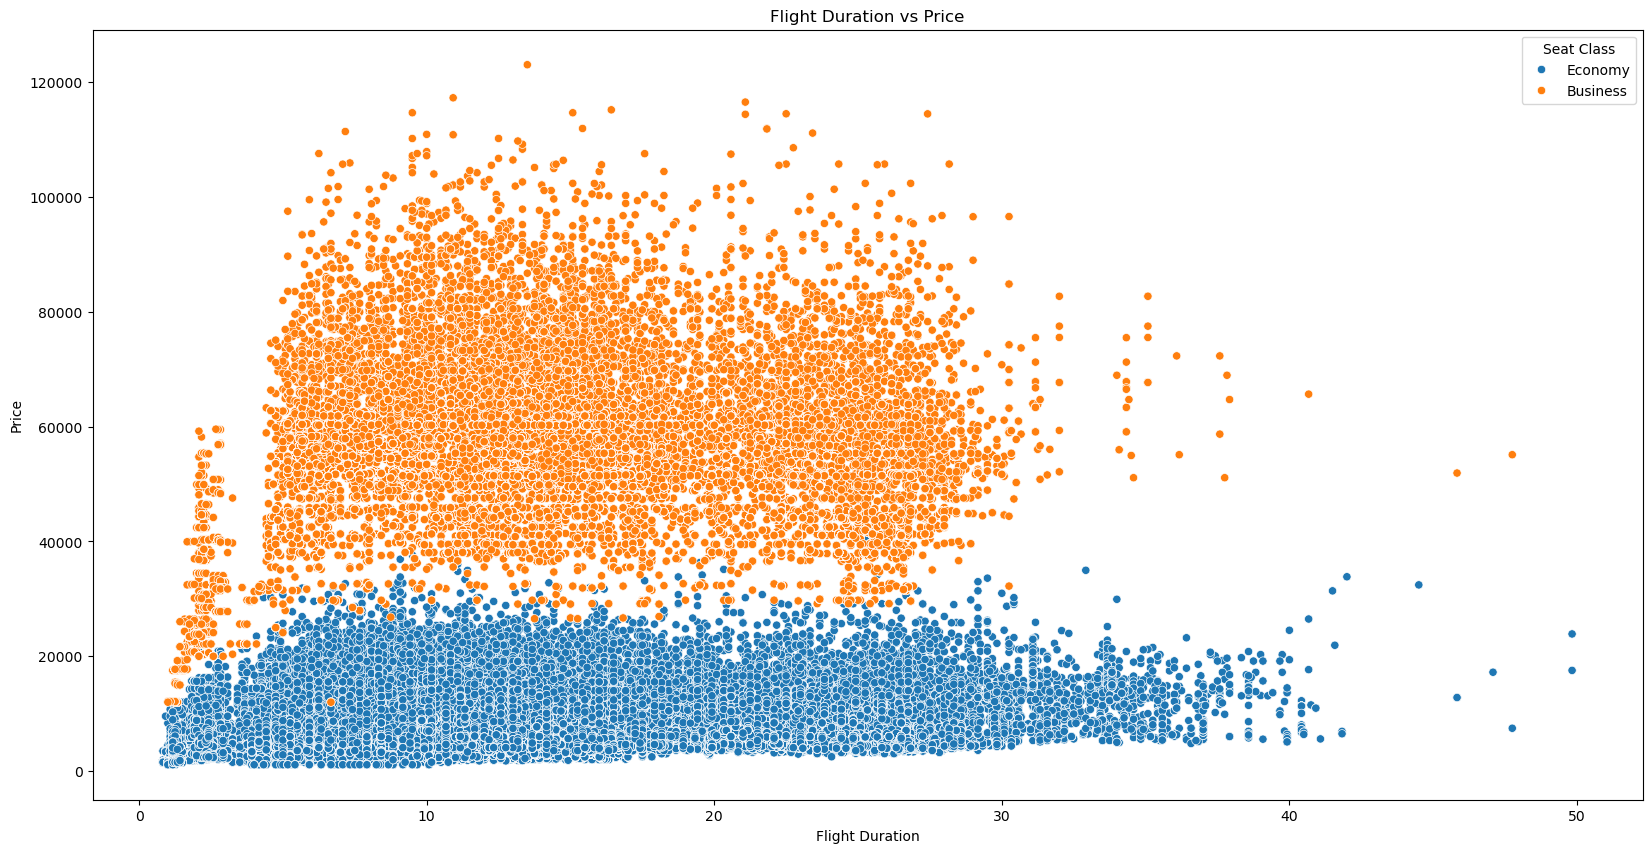

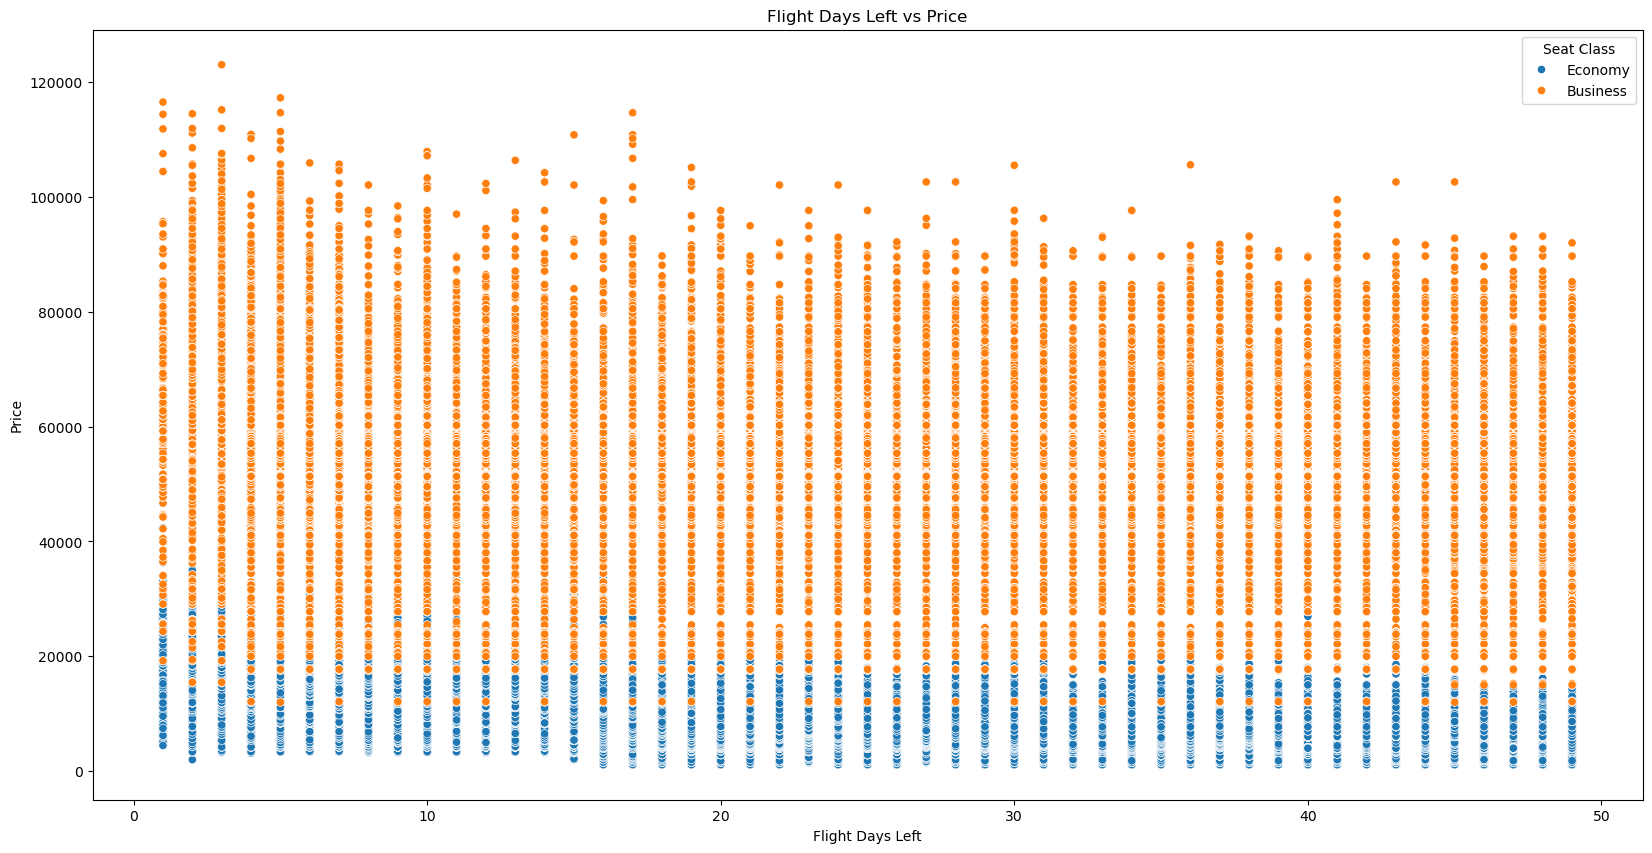

In [28]:
# Plotting Quantitative Variables vs Price Associations
for col in ['Flight Duration', 'Flight Days Left']:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=col, y='Price', data = df, hue='Seat Class')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

This step generates scatter plots to visualise the relationship between quantitative variables (`Flight Duration` and `Flight Days Left`) and `Price`, with points coloured by `Seat Class`. The code creates a figure of size 20x10 inches for each variable and uses seaborn's scatterplot function to plot the data. The data is first grouped by `Seat Class` and the respective quantitative variable, and the mean `Price` is calculated for each group. This grouped data is then reset to a flat index for plotting. The x-axis represents the quantitative variable, and the y-axis represents the mean `Price`. The hue parameter colors the points based on `Seat Class`, allowing for differentiation between different seat classes. Each plot is titled with the format "Variable vs Price", and the axes are labeled accordingly. Finally, the plots are displayed using `plt.show()`. This step provides visual insights into how `Flight Duration` and `Flight Days Left` are associated with the average `Price`, and how these associations vary across different seat classes.

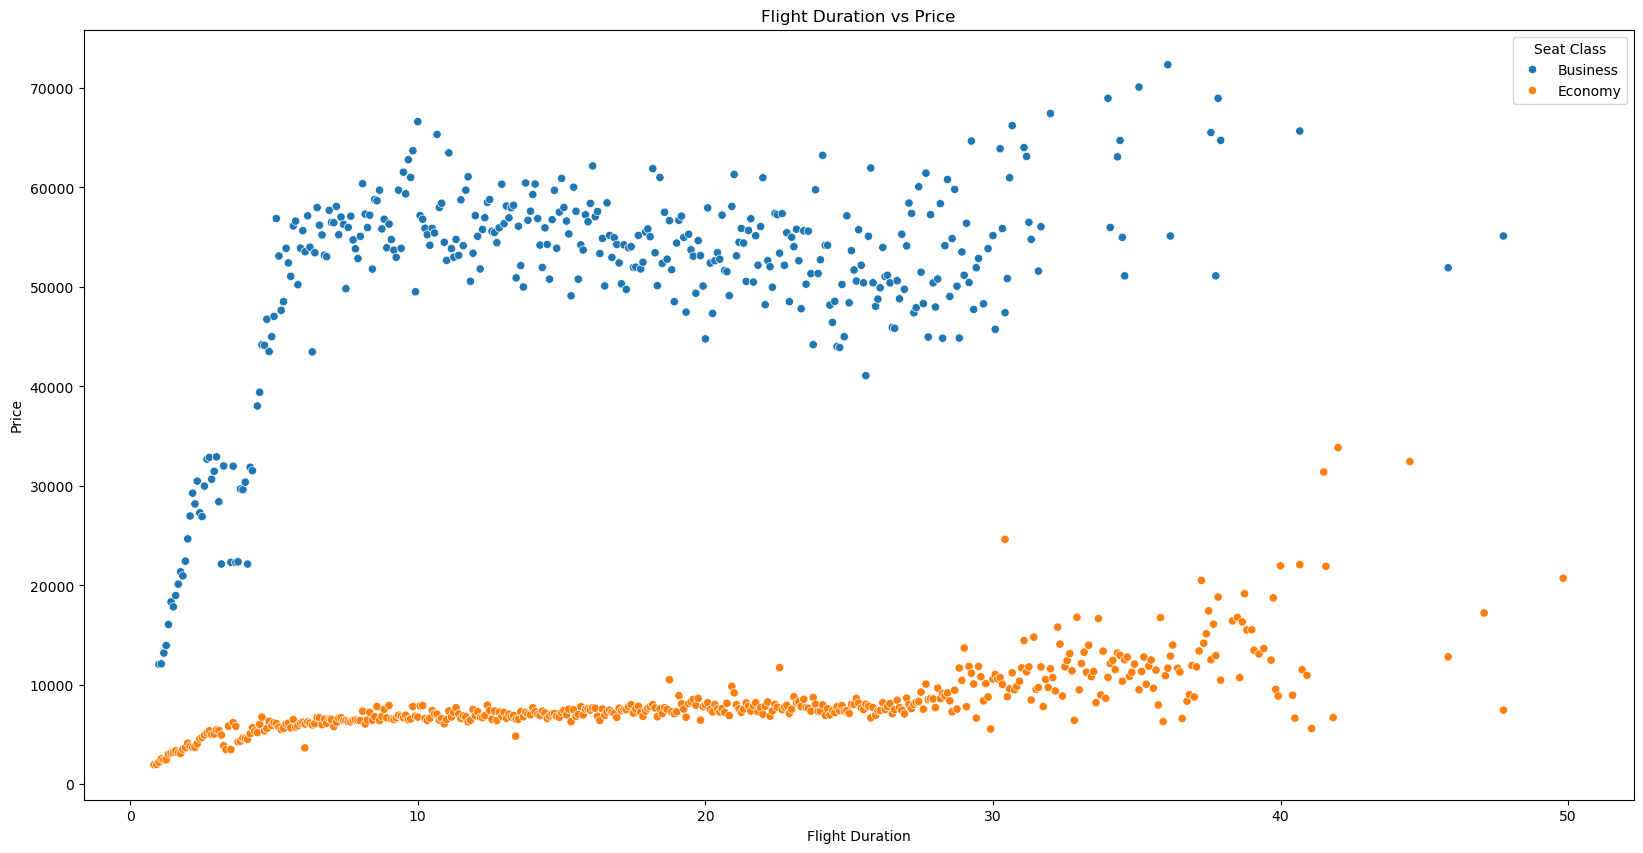

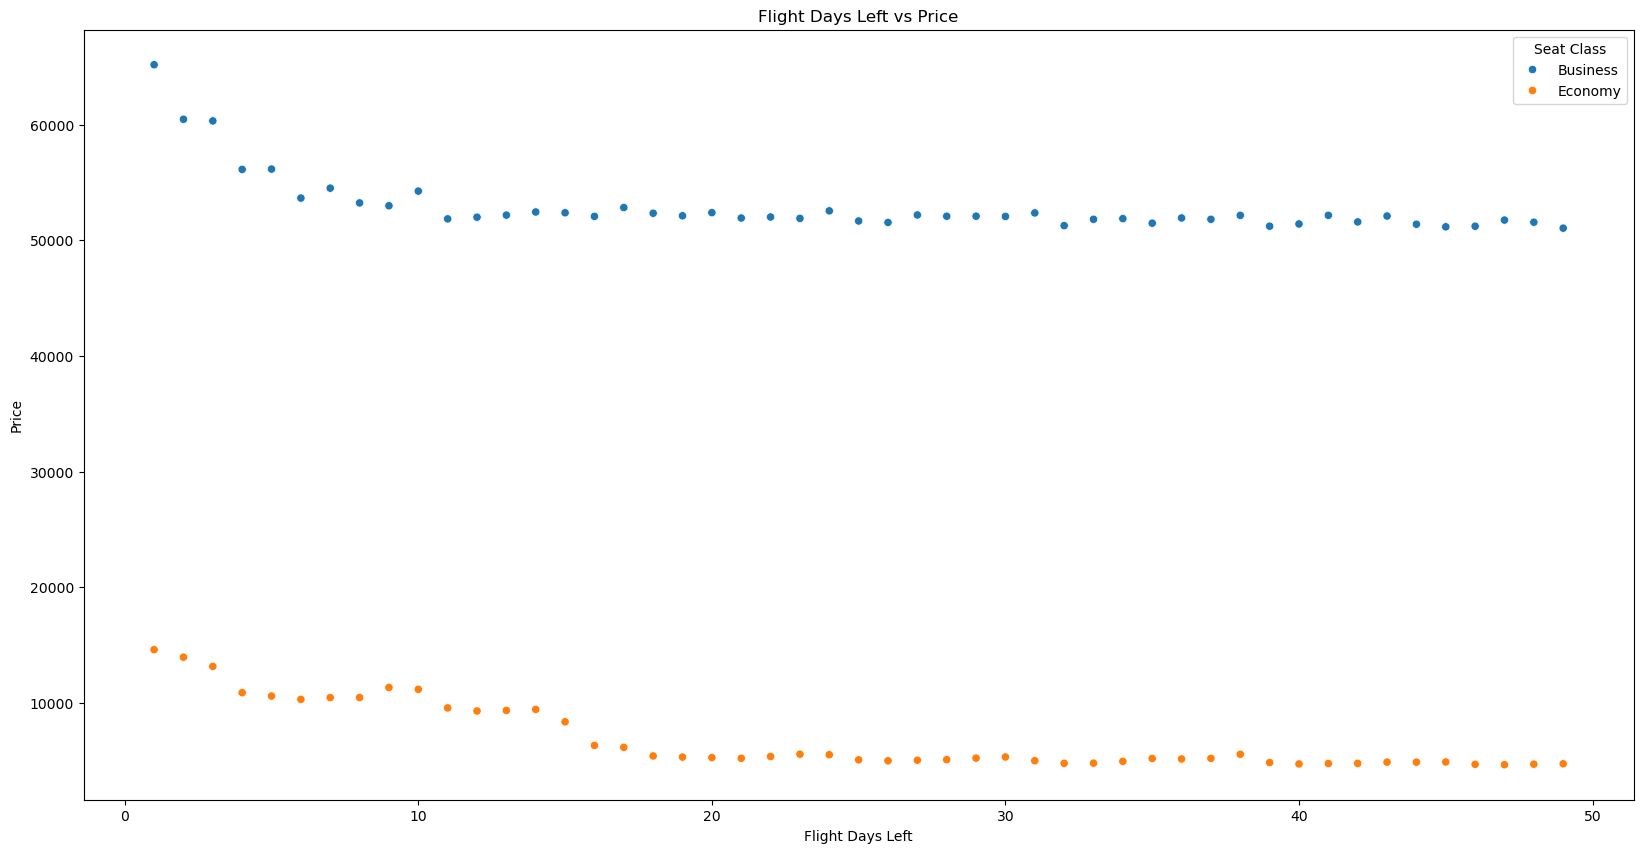

In [29]:
# Plotting Quantitative Variables vs Price Associations
for col in ['Flight Duration', 'Flight Days Left']:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=col, y='Price', hue='Seat Class', data = df.groupby(['Seat Class', col])['Price'].mean().reset_index())
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

<b>Observation(s):</b>

**Flight Duration and Price**

* There is a positive correlation between `Flight Duration` and `Price`. This means that as flight duration increases, price also tends to increase.
* There is some overlap between the data points for business class and economy class. This suggests that flight duration is not the only factor that affects price. Other factors, such as the specific airline, the time of year, and the destination, can also play a role.
* It is difficult to say definitively from this scatter plot alone whether business class seats are always more expensive than economy class seats for flights of the same duration. However, the general trend is that business class seats are more expensive.
* There are a few outliers, especially for the business class data, that have significantly higher prices for shorter flight durations. These could be due to factors like premium airlines, last-minute bookings, or specific routes with high demand.
* The data points for economy class appear to be more densely clustered than those for business class, especially at shorter flight durations. This could indicate that there are more flights available in the economy class at lower prices.

**Flight Days Left and Price**

* There is a weak negative correlation between `Flight Days Left` and `Price`, meaning that as the number of days left until the flight departure decreases, the price tends to increase.
* The data points for both business and economy class seem to cluster around certain price ranges for specific flight days left, suggesting the existence of price bands or thresholds.
* A few outliers, especially in business class, have significantly higher prices for flights with many days left until departure, potentially due to factors like premium airlines, last-minute bookings, or high-demand routes.
* The data points for economy class appear to be more densely clustered than those for business class, especially at shorter flight days left, indicating a higher availability of flights in the economy class at lower prices.
* The scatter plot reveals that flight days left is not the sole factor affecting price. Other factors, such as the specific airline, time of year, and destination, also play a significant role.

#### <b>d. Value Distributions of Qualitative Features</b>

This step involves visualising the value distributions of qualitative features in a data frame `df` by setting up a 3x3 grid of subplots using Matplotlib. The code creates subplots and adjusts the layout for better spacing, then flattens the axes array for easy iteration. For each categorical column in `cat_cols`, a countplot is generated with annotations displaying the frequency of each category, and the x-axis labels are rotated for better readability. If the column is `Flight Number`, a bar plot of the top 10 flight numbers is created instead due to a considerable number of flights in the dataset. Any unused subplots are hidden, and the plot is displayed using `plt.show()`.

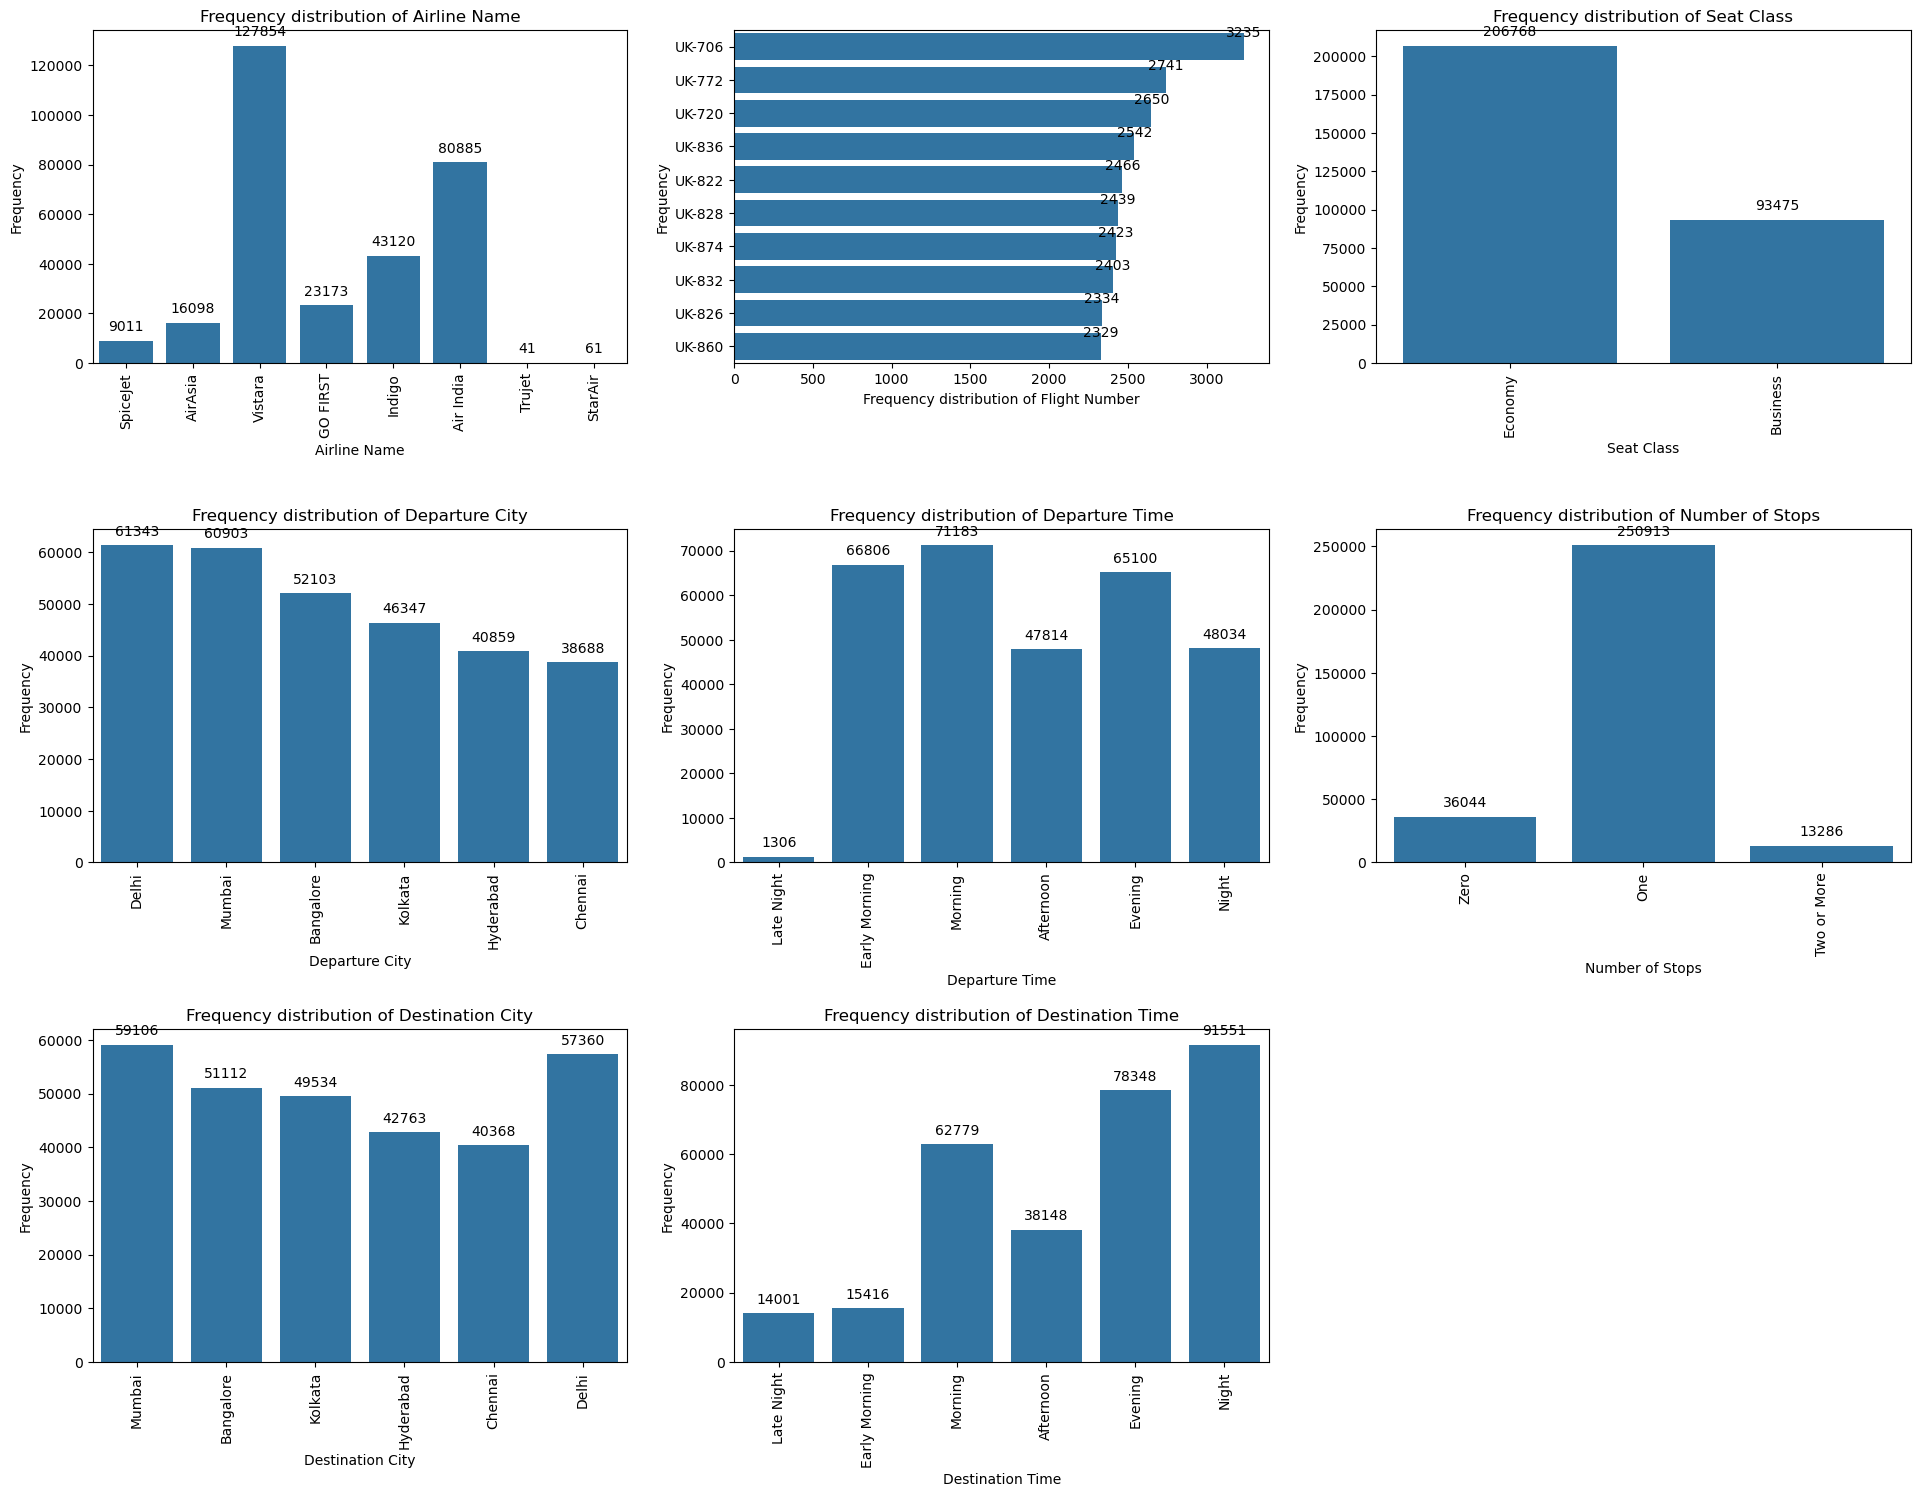

In [30]:
# Seting up the matplotlib figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Increasing the space between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.2)

# Flattening the axes array for easy iteration
axes_flat = axes.flatten()

# Plotting the countplot for each categorical column
for i, col in enumerate(cat_cols):

    if cat_cols[i] == 'Flight Number':
        ax = axes_flat[i]
        top_flight_numbers = df[col].value_counts().nlargest(10).to_frame().reset_index()
        top_flight_numbers.columns = [col, 'Frequency']
        sns.barplot(y=col, x='Frequency', data=top_flight_numbers, color='C0', ax=ax)
        ax.set_label(col)
        ax.set_ylabel('Frequency')
        ax.set_xlabel(f'Frequency distribution of {col}')
        ax.tick_params(axis='y', rotation=0)
        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    else:
        ax = axes_flat[i]
        sns.countplot(x=col, data=df, color='C0', ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Frequency distribution of {col}')
        ax.tick_params(axis='x', rotation=90)
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Hiding the unused subplot
axes_flat[-1].set_visible(False)

# Displaying the plot
plt.show()

<b>Observation(s):</b>

**Airline Name**
- Air India and Vistara dominate the market, possibly due to factors like network size, reputation, or pricing strategies.
- SpiceJet and AirAsia have a smaller market share, potentially due to regional focus or niche offerings.
- Trujet and StarAir may have limited operations due to smaller scale, regional focus, or specific market niches.

**Flight Number**
- The distribution of flight numbers could reveal patterns such as clustering of numbers within certain ranges or the presence of specific sequences, indicating popular routes or heavily operated schedules.

**Seat Class**
- The higher frequency of economy class bookings might be attributed to factors like pricing differences, availability, or customer preferences.

**Departure City**
- Delhi and Mumbai being the top departure cities aligns with their status as major travel hubs.
- Chennai's lower departure frequency could be due to factors like smaller city size, less developed infrastructure, or lower demand for air travel.

**Departure Time**
- The peak demand for morning and early morning flights might be influenced by business schedules, tourist preferences, or airline operations.
- The lower demand for late-night flights could be attributed to factors like reduced business activity, fewer connecting flights, or customer preferences.

**Number of Stops**
- The large number of one-stop flights might be influenced by factors like cost, or demand.
- Non-stop flights might be less frequent due to route limitations, operational constraints, or customer preferences.

**Destination City**
- The alignment of the most common destinations with major travel hubs suggests a strong correlation between demand and infrastructure.
- Chennai's lower frequency as a destination could be due to factors like limited tourist attractions, fewer business opportunities, or less developed infrastructure.

**Destination Time**
- The preference for night and evening arrivals might be influenced by factors like customer preferences, flight schedules, or connection options.
- The lower frequency of early morning and morning arrivals could be due to limited flight schedules, operational constraints, or customer preferences.

#### <b>e. Qualitative Features' Associations with Price</b>

For qualitative associations with price, a grid of subplots with 2 rows and 4 columns is created, adjusting the layout and spacing for better readability. It iterates over a list of categorical columns (`Airline Name`, `Seat Class`, `Departure City`, `Destination City`, `Departure Time`, `Destination Time`, `Number of Stops`), creating bar plots for each column to visualise the mean `Price` for each category. The data is grouped by each categorical variable, and the mean `Price` is calculated and plotted using seaborn's barplot function. The x-axis labels are rotated 90 degrees for readability, and each bar is annotated with its height value, representing the mean Price. Any unused subplots are hidden, and the final plots are displayed using `plt.show()`.

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


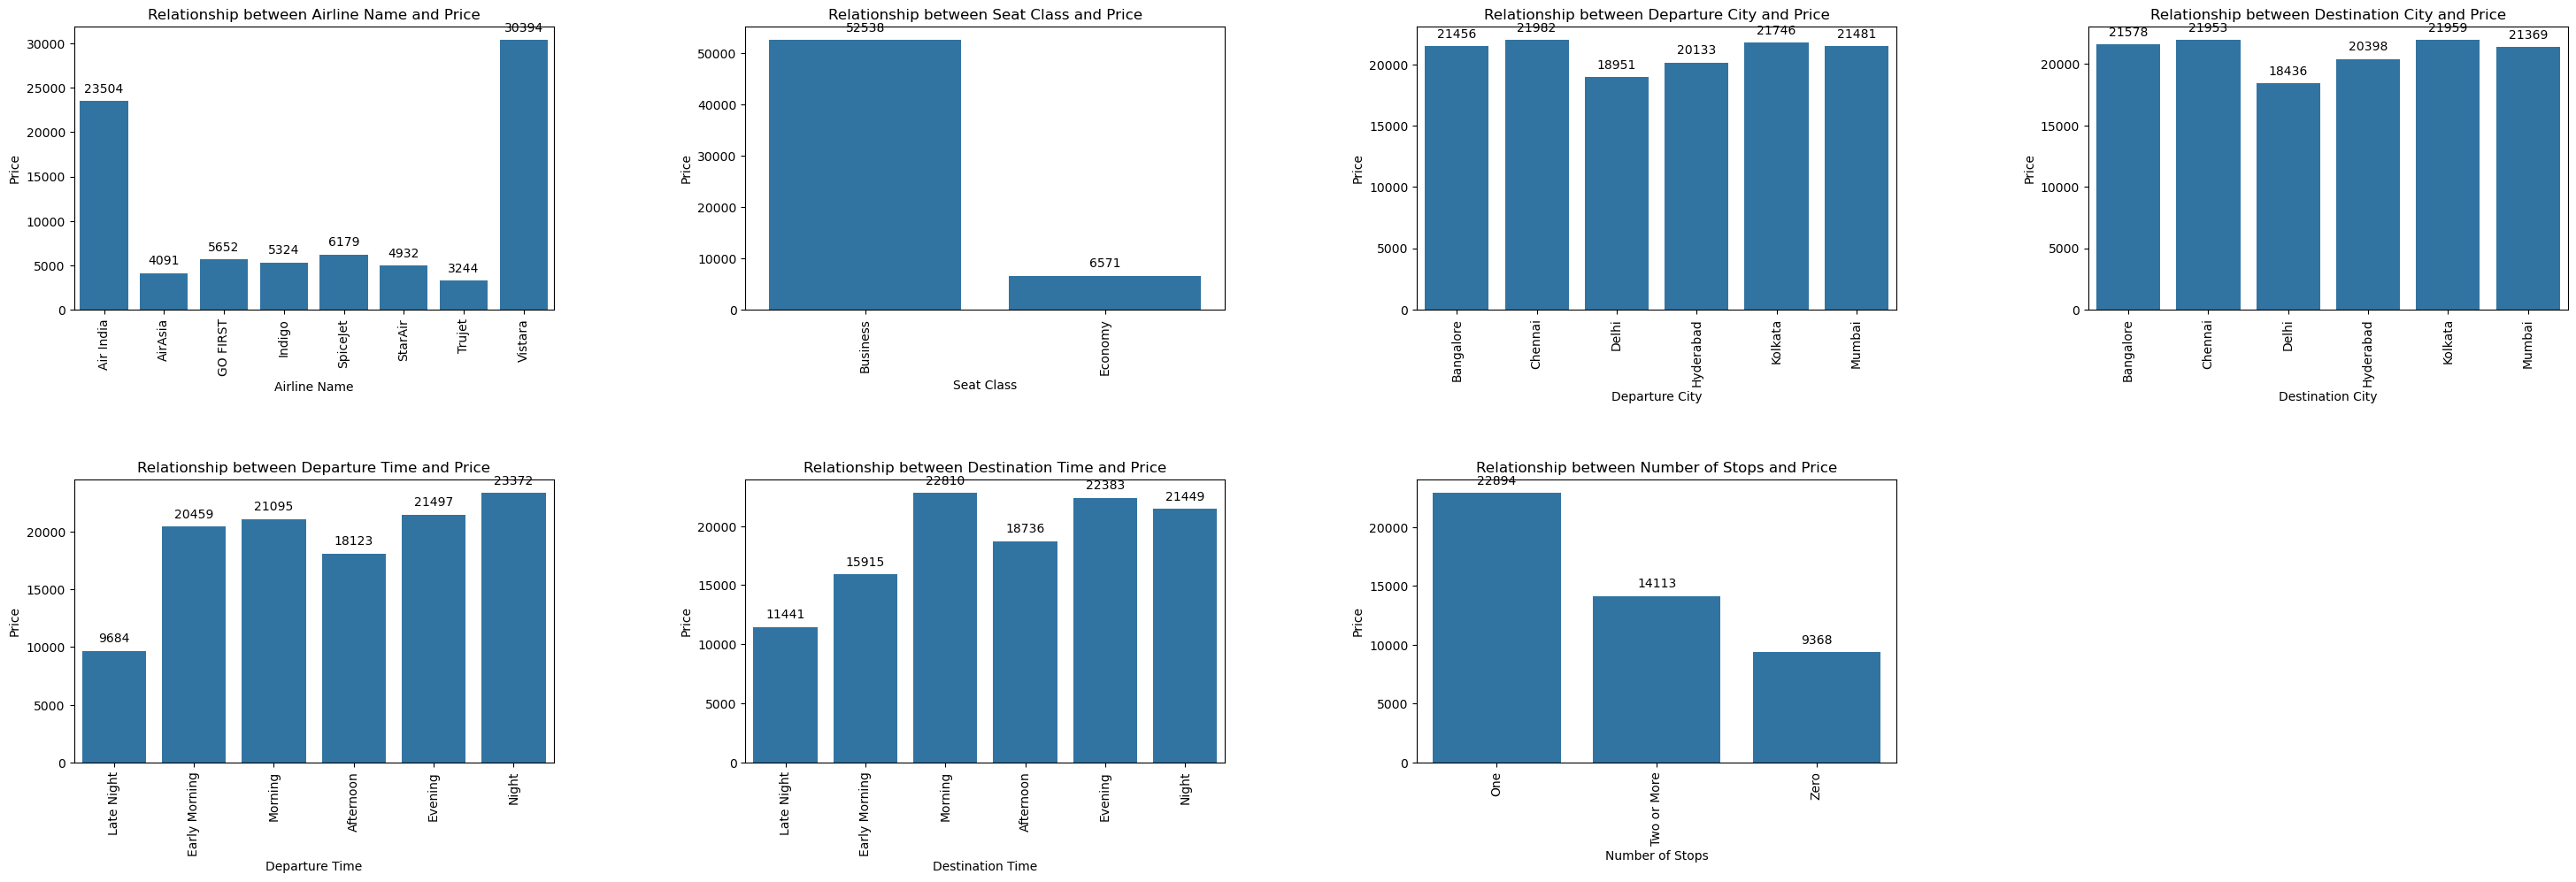

In [31]:
# Setting up the matplotlib figure with a grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(30, 10))
fig.tight_layout(pad=5.0)
fig.subplots_adjust(hspace=0.6, wspace=0.4)  # Increase spacing between plots
axes_flat = axes.flatten()

# Plotting the barplot for each categorical column
for i, col in enumerate(['Airline Name', 'Seat Class', 'Departure City', 'Destination City', 'Departure Time', 'Destination Time', 'Number of Stops']):
    ax = axes_flat[i]
    sns.barplot(x=col, y='Price', data=df.groupby(col)['Price'].mean().reset_index(), color="C0", ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(f'Relationship between {col} and Price')
    ax.tick_params(axis='x', rotation=90)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Hide any unused subplots
for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

# Displaying the plot
plt.show()

<b>Observation(s):</b>

**Relationship between Airline Name and Price**

- Vistara and Air India likely operate as premium carriers, offering higher service quality and amenities, reflected in their higher average prices.
- TruJet, AirAsia, and Star Air might be budget carriers, focusing on cost-effective travel with fewer amenities, leading to lower average prices.
- Other airlines like GO FIRST, Indigo, and SpiceJet may position themselves as hybrid carriers, balancing cost and service offerings between budget and premium.

**Relationship between Seat Class and Price**

- The significant price difference between business and economy class highlights the market segmentation based on customer preferences for luxury and convenience versus cost-saving.
- Business class caters to a smaller segment of travelers willing to pay a premium for enhanced services, while economy class offers a more affordable option for the majority of passengers.

**Relationship between Departure City and Price**

- Chennai and Kolkata might have higher demand or fewer budget options, leading to higher average flight prices.
- Delhi's lower average price could be attributed to high competition among airlines and more available flight options.
- The variations in prices based on departure city reflect local market conditions, competition, and demand.

**Relationship between Destination City and Price**

- Kolkata and Chennai being the most expensive destinations could be influenced by factors like demand, limited competition, or specific route characteristics.
- Delhi's lower average price might be due to high competition or more available flight options.

**Relationship between Departure Time and Price**

- Late-night flights might be cheaper due to lower demand or promotional pricing.
- Night flights might be more expensive due to higher demand or fewer available options.
- Early morning, morning, and evening flights could have higher prices due to peak travel times or limited availability.

**Relationship between Destination Time and Price**

- Morning arrivals might be more expensive due to higher demand or limited availability during peak travel times.
- Late-night arrivals could be cheaper due to lower demand or promotional pricing.
- The variations in prices based on destination time reflect demand patterns, flight schedules, and competition.

**Relationship between Number of Stops and Price**

- Non-stop flights are generally cheaper due to fewer operational costs and lesser options for general people.
- One-stop flights might have higher prices due to the number of options and cheaper cost.
- Flights with two or more stops could be moderately priced due to the combination of additional travel time and potential layovers.


### <b>6. Machine Learning Models Implementation</b>

This step focuses on training and evaluating various machine learning models to predict flight prices. With the data already cleaned, transformed, and explored, the next phase involves extracting an unbiased and representative sample of the dataset, selecting appropriate algorithms, training them on the dataset, and fine-tuning their parameters to optimize performance. Popular models applied include Linear Regression, Decision Trees, Random Forests, K-Nearest Neighbors (KNN), and Gradient Boosting. Each model is trained on the dataset using techniques like data splitting, feature scaling, and hyperparameter tuning. After training, the models are evaluated using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to determine their accuracy and reliability. Finally, the scores are compared to identify the best-performing model, ensuring the selected model provides the most accurate predictions for flight prices.

#### <b>a. Splitting Technique Implementation</b>

Splitting techniques like random split, stratified split, k-fold cross-validation, and stratified k-fold cross-validation are crucial in machine learning for dividing datasets into training and testing subsets to evaluate model performance. In a flight fare prediction system, StratifiedShuffleSplit is particularly beneficial as it ensures that both training and testing sets have a similar distribution of fare classes, addressing class imbalance and ensuring representative sampling. ANOVA (Analysis of Variance) is used to identify the most significant categorical feature affecting the target variable (price) by comparing the means of different groups. The feature with the highest F-value is chosen for stratification. For instance, after identifying categorical features, ANOVA is applied to find the feature with the lowest p-value and highest F-statistic value, which is then used in StratifiedShuffleSplit to create balanced training and testing sets. This method ensures robust model training and evaluation.

Ranking of features based on F-statistic:
1. Seat Class - F-statistic: 2193455.0795171554, p-value: 0.0
2. Airline Name - F-statistic: 12294.993974923978, p-value: 0.0
3. Number of Stops - F-statistic: 6484.497981981782, p-value: 0.0
4. Destination Time - F-statistic: 883.957139765687, p-value: 0.0
5. Departure Time - F-statistic: 337.89053626304195, p-value: 0.0
6. Destination City - F-statistic: 193.0800604354054, p-value: 4.012777861151254e-206
7. Departure City - F-statistic: 144.84619325889614, p-value: 4.359978015662588e-154
8. Flight Number - F-statistic: 72.57999917744452, p-value: 0.0




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



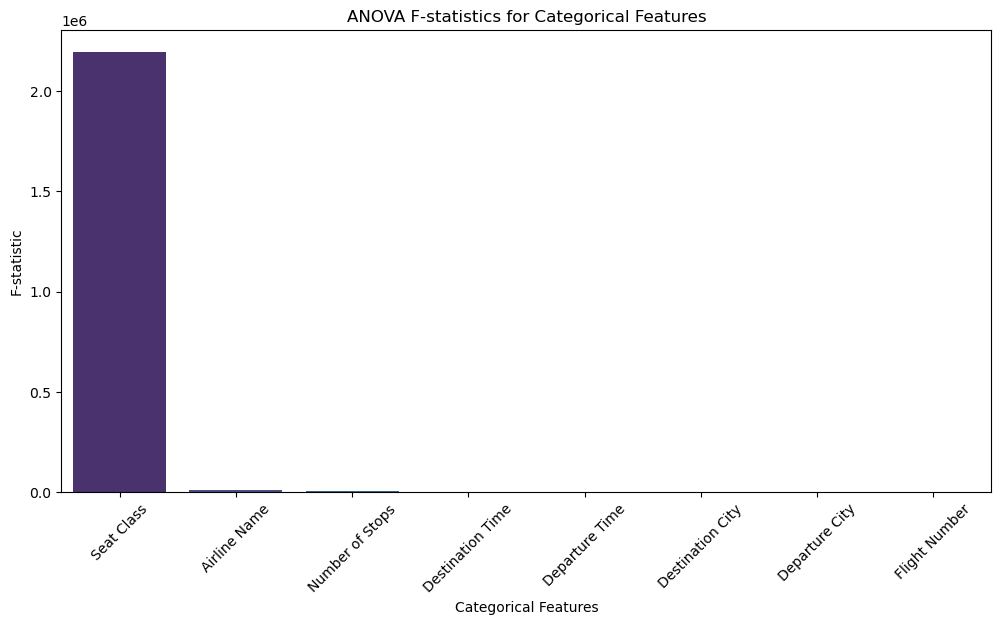

In [32]:
# Calculating ANOVA F-statistic for categorical columns
def anova_test(df, feature, target):
    groups = [df[target][df[feature] == category] for category in df[feature].unique()]
    f_stat, p_val = f_oneway(*groups)
    return f_stat, p_val

# Evaluating the ANOVA test for all categorical columns
anova_results = {}
for feature in cat_cols:
    f_stat, p_val = anova_test(df, feature, 'Price')
    anova_results[feature] = (f_stat, p_val)

# Converting the results to a DataFrame for easier ranking and plotting
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])

# Sorting the DataFrame by F-statistic for better visualization
anova_df = anova_df.sort_values(by='F-statistic', ascending=False)

# Printing and ranking all the features
print("Ranking of features based on F-statistic:")
for rank, (feature, row) in enumerate(anova_df.iterrows(), start=1):
    print(f"{rank}. {feature} - F-statistic: {row['F-statistic']}, p-value: {row['p-value']}")

# Best feature based on F-statistic saved in a new variable
best_feature = anova_df.index[0]

# Plotting the F-statistics
plt.figure(figsize=(12, 6))
sns.barplot(x=anova_df.index, y='F-statistic', data=anova_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('ANOVA F-statistics for Categorical Features')
plt.xlabel('Categorical Features')
plt.ylabel('F-statistic')
plt.show()

After identifying the best feature with the highest F-statistic through ANOVA calculation for Stratified Shuffle Split function, it is ensured that the selected feature is unbiased and that the sample will be representative of the whole dataset. To verify its balance across different categories, the distribution of the selected feature (best_feature) is first calculated and displayed. Then visualisation of this distribution using a bar plot is employed. By confirming that the distribution of the selected feature is balanced, it ensures that the Stratified Shuffle Split will maintain this balance in both the training and testing sets, leading to unbiased and representative samples.

Distribution of Seat Class:
Seat Class
Economy     0.688669
Business    0.311331
Name: proportion, dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



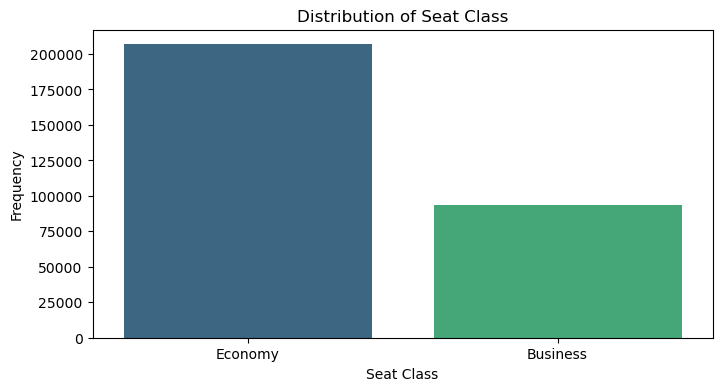

In [33]:
# Checking distribution of the feature with highest F-statistic
seat_class_distribution = df[best_feature].value_counts(normalize=True)
print(f"Distribution of {best_feature}:")
print(seat_class_distribution)

# Plotting the distribution of the best feature
plt.figure(figsize=(8, 4))
sns.countplot(x=best_feature, data=df, palette='viridis')
plt.title(f'Distribution of {best_feature}')
plt.xlabel(best_feature)
plt.ylabel('Frequency')
plt.show()

The next procedure begins by setting up variables, including the predictor (`Price`), the best categorical feature identified from ANOVA, random state, and test size. Stratified Shuffle Split is initialised with the specified test size and random state to maintain the proportion of the categorical feature in the splits. The data is splitted into training and testing sets using the categorical feature, ensuring balanced representation. The distributions of the categorical feature in both sets are calculated and displayed to verify balance. Finally, the distributions are visualised using bar plots to confirm that the training and testing sets are representative of the overall dataset.

Train set distribution of Seat Class:
Seat Class
Economy     0.688668
Business    0.311332
Name: proportion, dtype: float64
Test set distribution of Seat Class:
Seat Class
Economy     0.688671
Business    0.311329
Name: proportion, dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



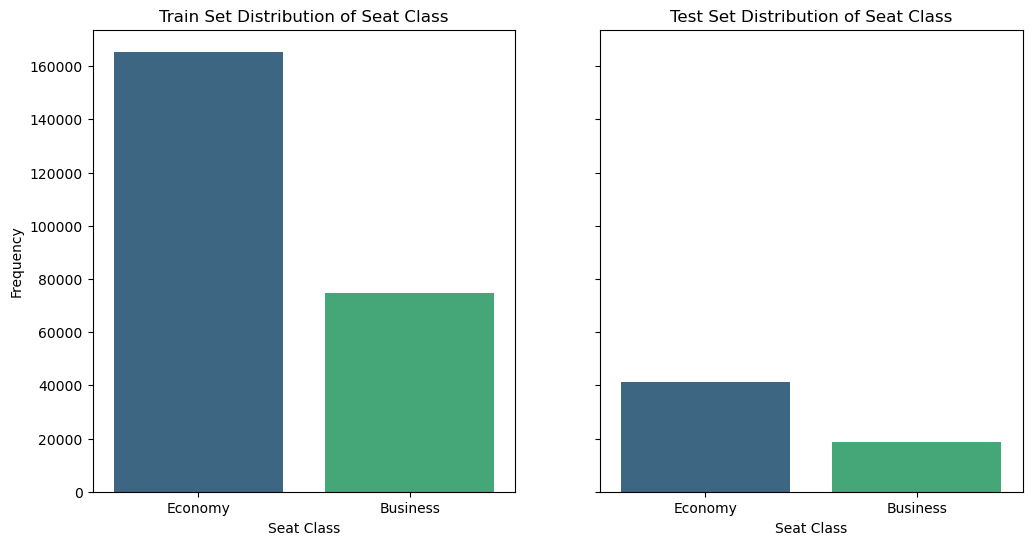

In [34]:
# Initialising the required variables of predictor, categorical feature, random state and test size
predictor = 'Price'
categorical_feature = best_feature
rs = 42
ts = 0.20

# Resetting the index of the DataFrame to ensure continuous indices
df = df.reset_index(drop=True)

# Initialising StratifiedShuffleSplit with the desired test size
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Performing the split using the categorical feature
for train_index, test_index in split.split(df, df[categorical_feature]):
    df_train = df.loc[train_index].reset_index(drop=True)
    df_test = df.loc[test_index].reset_index(drop=True)

# Verifying the distribution in the splits
train_seat_class_distribution = df_train[categorical_feature].value_counts(normalize=True)
test_seat_class_distribution = df_test[categorical_feature].value_counts(normalize=True)

print(f"Train set distribution of {categorical_feature}:")
print(train_seat_class_distribution)
print(f"Test set distribution of {categorical_feature}")
print(test_seat_class_distribution)

# Plotting the distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.countplot(x=categorical_feature, data=df_train, palette='viridis', ax=axes[0], order=['Economy', 'Business'])
axes[0].set_title(f'Train Set Distribution of {categorical_feature}')
axes[0].set_xlabel(categorical_feature)
axes[0].set_ylabel('Frequency')

sns.countplot(x='Seat Class', data=df_test, palette='viridis', ax=axes[1], order=['Economy', 'Business'])
axes[1].set_title(f'Test Set Distribution of {categorical_feature}')
axes[1].set_xlabel(categorical_feature)
axes[1].set_ylabel('Frequency')

plt.show()

Finally, the representative dataset is splitted into training and test sets. The independent features are separated from the target feature for both the training and test datasets by dropping the predictor column from the feature sets (`X_train` and `X_test`) and assigning the predictor column to the target sets (`y_train` and `y_test`). Finally, the shapes of the training and test sets are displayed to provide an overview of the dimensions of the data being used for model training and evaluation.

In [35]:
# Splitting the dataset into the Training set and Test set
X_train = df_train.drop(predictor, axis=1)
y_train = df_train[predictor]

X_test = df_test.drop(predictor, axis=1)
y_test = df_test[predictor]

# Displaying the shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((240194, 10), (240194,), (60049, 10), (60049,))

<b>Observation(s):</b>

* `Seat Class` has the highest F-statistic and lowest p value, indicating it has the most significant impact on the target variable, Price. Other features also show significant impact but to a lesser extent.
* The overall dataset has Economy class at approximately 68% and Business class at approximately 31%. This distribution is reasonably balanced, with no category being overwhelmingly dominant.
* The train and test data frame set after implementing Stratifield Shuffle Split model also maintains the distribution with Economy at approximately 68% and Business at approximately 31%. It matches the overall distribution in the whole dataset before splitting the dataset. This indicates that Stratified Shuffle Split algorithm has successfully maintained the proportion of each class in both splits.
* After splitting the dataset into `X_train`, `y_train`, `X_test`, and `y_test`, it can be observed that the training set consists of 240,194 samples with 10 features each. The test set consists of 60,049 samples with 10 features each.

#### <b>b. Suitable Encoding Algorithm Application</b>

First, ordinal encoding is applied to encode ordinal categorical columns in the dataset. The procedure to implement it starts with listing the original ordinal categorical columns that needed to be encoded. Then, it defines the categories for each feature in the order of their significance. An instance for Ordinal Encoder is initialized with these specified categories. The encoder is then fitted and applied to the training data (`X_train`), and the same transformation is applied to the test data (`X_test`). This ensures that the ordinal categorical values are converted to numerical values consistently across both datasets.

It is chosen over other encoders because it is specifically designed for ordinal categorical data, where the categories have a meaningful order. Unlike label encoder or one hot encoder, ordinal encoder can encode the categories in a specified order, preserving the ordinal relationship between the categories. This is crucial for features like `Seat Class`, `Departure Time`, `Destination Time`, and `Number of Stops`, where the order of categories carries significant information.

In [36]:
# Listing ordinal categorical columns
ordinal_cat_cols = ['Seat Class', 'Departure Time', 'Destination Time', 'Number of Stops']

# Defining the categories for each feature
seat_class_categories = ['Business', 'Economy']
time_categories = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
stops_categories = ['Zero', 'One', 'Two or More']

# Creating the encoder with the specified categories
encoder = OrdinalEncoder(categories=[seat_class_categories, time_categories, time_categories, stops_categories])

# Fitting and transforming the training data
X_train[ordinal_cat_cols] = encoder.fit_transform(X_train[ordinal_cat_cols])

# Transforming the test data
X_test[ordinal_cat_cols] = encoder.transform(X_test[ordinal_cat_cols])

To encode nominal categorical columns in a dataset, target encoding is applied. The nominal categorical columns that need to be encoded are saved in a variable. Then, it initializes a Target Encoder instance. The Target Encoder is applied to each nominal categorical column in the training set `X_train` and the test set `X_test`. For the training set, the encoder is fitted and transformed using both the features and the target variable `y_train`. For the test set, the same transformation is applied without fitting to ensure consistency. This algorithm is chosen over other encoders because these features have large number of unique values (high cardinality) and this encoding algorithm reduces it by converting them into numerical values based on the target variable, and also it helps in soothing and preventing overfitting. Unlike other algorithms, target encoding can provide more informative numerical representations of the categorical features by leveraging the target variable.

In [37]:
# Listing Nominal categorical columns
nominal_cat_cols = ['Airline Name', 'Flight Number', 'Departure City', 'Destination City']

# Initialising the Target Encoder
te = TargetEncoder()

# Applying Target Encoding to the categorical columns
X_train[nominal_cat_cols] = te.fit_transform(X_train[nominal_cat_cols], y_train)
X_test[nominal_cat_cols] = te.transform(X_test[nominal_cat_cols])

#### <b>c. Suitable Scalar Algorithm Application</b>

For application of `Robust Scaler`, the features of the training and test datasets are scaled using the `RobustScaler`. It is particularly useful when the data contains outliers, as it scales the data according to the interquartile range (IQR), making it more robust to outliers compared to other scalers like StandardScaler or MinMaxScaler. That is why this scaling algorithm is chosen over other scaling algorithms because it is less sensitive to outliers. Unlike Standard Scaler which scales data to have zero mean and unit variance, or Min Max Scaler which scales data to a specified range (usually 0 to 1), Robust Scaler uses the median and IQR for scaling. This makes it more robust to outliers, which can be particularly beneficial in datasets where outliers are present and could skew the scaling process.

In [38]:
# Initialising the RobustScaler
rs = RobustScaler()

# Applying RobustScaler to the X_train and X_test
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

#### <b>d. Suitable Model Implementation</b>

In this section, several machine learning models are implemented and evaluated to predict flight fares. Candidate models are selected, trained, and validated using the preprocessed dataset. The performance of each model is assessed with appropriate evaluation metrics, and further enhancements are made in later stages.

##### <b>i. Linear Regression </b>


Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. In the provided code, a linear regression model is constructed using a pipeline, trained on the training dataset (`X_train`, `y_train`), and then used to predict the test set results (`y_pred`). The model's performance is assessed using metrics such as R² score, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE).

In [39]:
# Creating a Linear Regression model pipeline
lr_pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

# Fitting the model pipeline
lr_pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred = lr_pipeline.predict(X_test)

# Evaluating model performance
lr_train_Score = lr_pipeline.score(X_train, y_train)
lr_Test_Score = lr_pipeline.score(X_test, y_test)

# Displaying the scores
print('Linear Regression Accuracy Train Score is: {}'.format(lr_train_Score))
print('Linear Regression Accuracy Test Score is: {}'.format(lr_Test_Score))

# Calcuating evaluation metrics
lr_MAE = mean_absolute_error(y_test, y_pred)
lr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
lr_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
lr_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Mean Absolute Error:', lr_MAE)
print('Root Mean Squared Error:', lr_RMSE)
print('Mean Squared Error:', lr_MSE)
print('Mean Absolute Percentage Error:', lr_MAPE)

Linear Regression Accuracy Train Score is: 0.9096797375112516
Linear Regression Accuracy Test Score is: 0.9090577715483709
Mean Absolute Error: 4564.688168360504
Root Mean Squared Error: 6854.943181652712
Mean Squared Error: 46990246.023687005
Mean Absolute Percentage Error: 44.26856913409695


<b>Observation(s):</b>

* The R² scores for both the training (0.91) and test (0.91) datasets are relatively high, indicating that the linear regression model explains a significant portion of the variance in the data.
* The Mean Absolute Error (MAE) of approximately 4565 and Root Mean Squared Error (RMSE) of approximately 6855 suggest that there is a noticeable average deviation between the predicted and actual values.
* The Mean Squared Error (MSE) of approximately 46990246 is quite large, which is expected given the RMSE value.
* The Mean Absolute Percentage Error (MAPE) of approximately 44.27% indicates that the average percentage error between the predicted and actual values is substantial.

##### <b>ii. Decision Tree Regression</b>

Decision Tree Regression is a machine learning technique used to predict continuous values. It operates by partitioning the data into subsets based on feature values, forming a tree structure of decisions. Each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents a predicted value. The objective is to create a model that predicts the target variable by learning simple decision rules derived from the data features. While Decision Tree Regression is easy to understand and interpret, it can be prone to overfitting, which is why parameters like max_depth are used to limit the tree's complexity.

The procedure for implementation starts with initializing a Decision Tree Regressor with a maximum depth of 2 and constructing a pipeline for it. The model is then trained using the training data (`X_train`, `y_train`). The R² scores for both the training and testing datasets are calculated and printed. Predictions are made on the test data (`X_test`), and various error metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Mean Squared Error (MSE) are computed and displayed.

In [40]:
# Creating a Decision Tree Regressor instance via pipeline 
dtr_pipeline = Pipeline([
    ('decision tree', DecisionTreeRegressor(max_depth=2))
])

# Fitting the model
dtr_pipeline.fit(X_train, y_train)

# Evaluating model performance
dtr_train_Score = dtr_pipeline.score(X_train, y_train)
dtr_Test_Score = dtr_pipeline.score(X_test, y_test)

# Displaying the accuracy scores
print('Decision Tree Regression Accuracy Train Score is: {}'.format(dtr_train_Score))
print('Decision Tree Regression Accuracy Test Score is: {}'.format(dtr_Test_Score))

# Calculating the predictions
y_pred = dtr_pipeline.predict(X_test)

# Calcuating evaluation metrics
dtr_MAE = mean_absolute_error(y_test, y_pred)
dtr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
dtr_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
dtr_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Mean Absolute Error:', dtr_MAE)
print('Root Mean Squared Error:', dtr_RMSE)
print('Mean Squared Error:', dtr_MSE)
print('Mean Absolute Percentage Error:', dtr_MAPE)

Decision Tree Regression Accuracy Train Score is: 0.9238608928111939
Decision Tree Regression Accuracy Test Score is: 0.9235092175364601
Mean Absolute Error: 3866.2362979233276
Root Mean Squared Error: 6286.741672876341
Mean Squared Error: 39523120.86148001
Mean Absolute Percentage Error: 31.8052080376372


<b>Observation(s):</b>

* The R² Train Score of approximately 0.92 indicates that the model fits the training data well, suggesting that the Decision Tree Regressor has effectively captured the patterns in the training dataset.
* The R² Test Score of approximately 0.92 shows that the model performs well on unseen data, indicating that it generalizes well and can make reasonably accurate predictions on new, unseen data points.
* The Mean Absolute Error (MAE) of approximately 3866 measures the average magnitude of errors in predictions. This acceptable MAE indicates that, on average, the model's predictions are close to the actual values.
* The Root Mean Squared Error (RMSE) of approximately 6287 provides a measure of the average magnitude of errors, giving higher weight to larger errors. A reasonable RMSE suggests that the model's larger errors are not excessively high, indicating reliability in its performance.
* The Mean Squared Error (MSE) of approximately 39,523,121 is another measure of the average magnitude of errors, also giving higher weight to larger errors. A reasonable MSE indicates that the model's predictions are generally close to the actual values, with larger errors being relatively infrequent.
* The Mean Absolute Percentage Error (MAPE) of approximately 31.81% indicates the average percentage error in predictions. A moderate MAPE shows that the model's predictions are, on average, a reasonable percentage away from the actual values, providing a useful metric for understanding the model's performance in relative terms.

##### <b>iii. Random Forest Regresion</b>

A Random Forest Regressor is a learning method generally used for regression tasks. It works by constructing multiple decision trees during training and outputting the mean prediction of the individual trees. This approach helps to improve predictive accuracy and control overfitting. A pipeline in machine learning is a way to streamline a sequence of data processing steps, ensuring that the same steps are applied consistently to both training and test data.

Regarding its implementation below, a pipeline is created with a Random Forest Regressor. The model is then trained using the fit() method on the training data (`X_train`, `y_train`). The R² scores for both training and testing datasets are calculated to evaluate the model's performance. Predictions on the test data (`X_test`) are made using the predict() method. Various error metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Mean Squared Error (MSE) are computed to assess the model's accuracy.

In [41]:
# Creating a Random Forest Regressor Instance via pipeline
rfr_pipeline = Pipeline([
    ('random forest', RandomForestRegressor(max_depth=2))
])

# Fitting the Model
rfr_pipeline.fit(X_train, y_train)

# Evaluating model performance
rfr_train_Score = rfr_pipeline.score(X_train, y_train)
rfr_Test_Score = rfr_pipeline.score(X_test, y_test)

# Displaying the scores
print('Random Forest Regression Accuracy Train Score is: {}'.format(rfr_train_Score))
print('Random Forest Regression Accuracy Test Score is: {}'.format(rfr_Test_Score))

# Calculating the predictions
y_pred = rfr_pipeline.predict(X_test)

# Calcuating evaluation metrics
rfr_MAE = mean_absolute_error(y_test, y_pred)
rfr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
rfr_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rfr_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Mean Absolute Error:', rfr_MAE)
print('Root Mean Squared Error:', rfr_RMSE)
print('Mean Squared Error:', rfr_MSE)
print('Mean Absolute Percentage Error:', rfr_MAPE)

Random Forest Regression Accuracy Train Score is: 0.9238632012327692
Random Forest Regression Accuracy Test Score is: 0.9235109422467546
Mean Absolute Error: 3866.18722815206
Root Mean Squared Error: 6286.670795910163
Mean Squared Error: 39522229.69614973
Mean Absolute Percentage Error: 31.810686785168762


**Observation(s):**

* The model demonstrates an excellent fit to the training data, with an R² Train Score of approximately 0.92. This indicates that the Random Forest Regressor has effectively captured the underlying patterns in the training dataset.
* The model performs well on the test data, with an R² Test Score of approximately 0.92, indicating good generalisation. This shows that the model can make reasonably accurate predictions on new, unseen data.
* The Mean Absolute Error (MAE) of around 3866 suggests that, on average, the model's predictions are close to the actual values, indicating a reasonable magnitude of errors.
* The Root Mean Squared Error (RMSE) of approximately 6287 indicates that the model's larger errors are not excessively high, suggesting reliability in its performance.
* The Mean Squared Error (MSE) of about 39,522,230 further supports that the model's predictions are generally close to the actual values, with larger errors being relatively infrequent.
* The Mean Absolute Percentage Error (MAPE) of around 31.81% shows that the model's predictions are, on average, a reasonable percentage away from the actual values, providing a useful metric for understanding the model's performance in relative terms.

##### <b>iv. KNN Regression</b>

K-Nearest Neighbours (KNN) Regression is a type of instance-based learning where the target value for a new data point is predicted based on the average of the target values of its k-nearest neighbours in the training data. The "k" in KNN represents the number of nearest neighbours to consider. The distance between data points is typically measured using Euclidean distance. KNN regression is simple and effective for small datasets but can become computationally expensive as the size of the dataset grows.

The code initialises the number of neighbours for a K-Nearest Neighbours Regressor to 100 and creates a pipeline for it. The model is then fitted using the training data (`X_train` and `y_train`). The R² scores for both the training and testing datasets are calculated and printed. Predictions are made on the test data (`X_test`), and various error metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Mean Squared Error (MSE) are computed and displayed.

In [42]:
# Creating pipeline for K-Nearest Neighbours Regressor
knnr_pipeline = Pipeline([
    ('knn', KNeighborsRegressor(n_neighbors=100))
])

# Fitting the K-Nearest Neighbours Regressor Model
knnr_pipeline.fit(X_train, y_train)

# Evaluating the model performance
knnr_train_Score = knnr_pipeline.score(X_train, y_train)
knnr_Test_Score = knnr_pipeline.score(X_test, y_test)

# Displaying the scores
print('KNN Regression Accuracy Train Score is: {}'.format(knnr_train_Score))
print('KNN Regression Accuracy Test Score is: {}'.format(knnr_Test_Score))

# Calculating the predictions
y_pred = knnr_pipeline.predict(X_test)

# Calcuating the evaluation metrics
knnr_MAE = mean_absolute_error(y_test, y_pred)
knnr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
knnr_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
knnr_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Mean Absolute Error:', knnr_MAE)
print('Root Mean Squared Error:', knnr_RMSE)
print('Mean Squared Error:', knnr_MSE)
print('Mean Absolute Percentage Error:', knnr_MAPE)

KNN Regression Accuracy Train Score is: 0.9619992280404245
KNN Regression Accuracy Test Score is: 0.960392888857712
Mean Absolute Error: 2610.9229835634233
Root Mean Squared Error: 4523.844277461452
Mean Squared Error: 20465167.046720732
Mean Absolute Percentage Error: 20.260696374124148


<b>Observation(s):</b>

* The model fits the training data well, with an R² Train Score of approximately 0.96. This indicates that the K-Nearest Neighbours Regressor has effectively captured the underlying patterns in the training dataset.
* The model performs adequately on the test data, with an R² Test Score of approximately 0.96, indicating reasonable generalisation. This shows that the model can make reasonably accurate predictions on new, unseen data.
* The Mean Absolute Error (MAE) of around 2611 suggests that, on average, the model's predictions are close to the actual values, indicating an acceptable magnitude of errors.
* The Root Mean Squared Error (RMSE) of approximately 4524 indicates that the model's larger errors are not excessively high, suggesting reliability in its performance.
* The Mean Squared Error (MSE) of about 20,465,167 further supports that the model's predictions are generally close to the actual values, with larger errors being relatively infrequent.
* The Mean Absolute Percentage Error (MAPE) of around 20.26% shows that the model's predictions are, on average, a reasonable percentage away from the actual values, providing a useful metric for understanding the model's performance in relative terms.

#### <b>v. Gradient Boosting Regression</b>

Gradient Boosting Regressor is a learning technique generally used for regression tasks. It builds the model in a stage-wise fashion by sequentially adding predictors to an ensemble, each one correcting its predecessor's errors. The basic idea is to combine the predictions of several base estimators (typically decision trees) to improve robustness and accuracy. Each new model is trained to predict the residual errors of the previous models, and the final prediction is a weighted sum of the predictions from all models. This method is highly effective for a variety of regression problems due to its ability to reduce bias and variance.

The code creates a Gradient Boosting Regressor instance using a pipeline and fits it to the training data (`X_train`, `y_train`). The R² scores for both the training and test datasets are calculated to evaluate the model's performance. The code then calculates various error metrics, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Mean Squared Error (MSE), to provide a comprehensive assessment of the model's prediction accuracy.

In [43]:
# Creating a Gradient Boosting Regressor instance via pipeline
gbr_pipeline = Pipeline([
    ('gradient boosting', GradientBoostingRegressor(n_estimators=5, learning_rate=0.4))
])

# Fitting the Model
gbr_pipeline.fit(X_train, y_train)

# Evaluating model performance
gbr_train_Score = gbr_pipeline.score(X_train, y_train)
gbr_Test_Score = gbr_pipeline.score(X_test, y_test)

# Displaying the scores
print('Gradient Boosting Regressionn Accuracy Train Score is: {}'.format(gbr_train_Score))
print('Gradient Boosting Regression Accuracy Test Score is: {}'.format(gbr_Test_Score))

# Calculating the predictions
y_pred = gbr_pipeline.predict(X_test)

# Calcuating evaluation metrics
gbr_MAE = mean_absolute_error(y_test, y_pred)
gbr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
gbr_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
gbr_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Mean Absolute Error:', gbr_MAE)
print('Root Mean Squared Error:', gbr_RMSE)
print('Mean Squared Error:', gbr_MSE)
print('Mean Absolute Percentage Error:', gbr_MAPE)

KNN Regression Accuracy Train Score is: 0.9489386087567739
KNN Regression Accuracy Test Score is: 0.948112249866395
Mean Absolute Error: 3287.6617514983436
Root Mean Squared Error: 5177.897910078565
Mean Squared Error: 26810626.767195966
Mean Absolute Percentage Error: 33.43420042294669


<b>Observation(s):</b>

* The R² Train Score of approximately 0.95 indicates that the Gradient Boosting Regressor fits the training data well. This suggests that the model has effectively captured the patterns in the training dataset.
* The R² Test Score of approximately 0.95 shows that the model performs well on unseen data. This indicates that the model generalises well and can make reasonably accurate predictions on new, unseen data points.
* The Mean Absolute Error (MAE) of around 3288 measures the average magnitude of errors in predictions. An acceptable MAE indicates that, on average, the model's predictions are close to the actual values.
* The Root Mean Squared Error (RMSE) of approximately 5178 provides a measure of the average magnitude of errors, giving higher weight to larger errors. A reasonable RMSE suggests that the model's larger errors are not excessively high, indicating reliability in its performance.
* The Mean Squared Error (MSE) of about 26,810,627 is another measure of the average magnitude of errors, also giving higher weight to larger errors. A reasonable MSE indicates that the model's predictions are generally close to the actual values, with larger errors being relatively infrequent.
* The Mean Absolute Percentage Error (MAPE) of around 33.43% indicates the average percentage error in predictions. A moderate MAPE shows that the model's predictions are, on average, a reasonable percentage away from the actual values, providing a useful metric for understanding the model's performance in relative terms.

#### <b>vi. Comparing Models' Performances</b>

Finally, a data frame is created to display the performance metrics of various regression models, including Linear Regression, Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbours Regressor, and Gradient Boosting Regressor. The data frame includes columns for R² Train Score, R² Test Score, Mean Absolute Error, Root Mean Squared Error, Mean Squared Error, and Mean Absolute Percentage Error.

In [44]:
# Displaying all the scores of the models in a dataframe
im_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'K-Nearest Neighbours Regressor', 'Gradient Boosting Regressor'],
    'R2 Train Score': [lr_train_Score, dtr_train_Score, rfr_train_Score, knnr_train_Score, gbr_train_Score],
    'R2 Test Score': [lr_Test_Score, dtr_Test_Score, rfr_Test_Score, knnr_Test_Score, gbr_Test_Score],
    'Mean Absolute Error': [lr_MAE, dtr_MAE, rfr_MAE, knnr_MAE, gbr_MAE],
    'Root Mean Squared Error': [lr_RMSE, dtr_RMSE, rfr_RMSE, knnr_RMSE, gbr_RMSE],
    'Mean Squared Error': [lr_MSE, dtr_MSE, rfr_MSE, knnr_MSE, gbr_MSE],
    'Mean Absolute Percentage Error': [lr_MAPE, dtr_MAPE, rfr_MAPE, knnr_MAPE, gbr_MAPE]
})

# Displaying the scores
im_scores

Model  R2 Train Score  R2 Test Score  \
0               Linear Regression        0.909680       0.909058   
1         Decision Tree Regressor        0.923861       0.923509   
2         Random Forest Regressor        0.923863       0.923511   
3  K-Nearest Neighbours Regressor        0.961999       0.960393   
4     Gradient Boosting Regressor        0.948939       0.948112   

   Mean Absolute Error  Root Mean Squared Error  Mean Squared Error  \
0          4564.688168              6854.943182        4.699025e+07   
1          3866.236298              6286.741673        3.952312e+07   
2          3866.187228              6286.670796        3.952223e+07   
3          2610.922984              4523.844277        2.046517e+07   
4          3287.661751              5177.897910        2.681063e+07   

   Mean Absolute Percentage Error  
0                       44.268569  
1                       31.805208  
2                       31.810687  
3                       20.260696  
4                       33.434200

Next, a series of scatter plots are generated using Matplotlib and Seaborn to compare the true vs. predicted values for different regression models: Linear Regression, Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbours Regressor, and Gradient Boosting Regressor. It sets the figure size to 15x10 inches and creates a 2x3 grid of subplots. Each subplot displays a scatter plot of the true values (`y_test`) against the predicted values from the respective model pipelines (`lr_pipeline`, `dtr_pipeline`, `rfr_pipeline`, `knnr_pipeline`, `gbr_pipeline`). A red diagonal line is plotted to indicate the ideal scenario where predicted values match the true values. Titles, x-axis labels, and y-axis labels are added to each subplot for clarity. Finally, plt.tight_layout() is called to adjust the spacing between subplots, and plt.show() is used to display the plots.

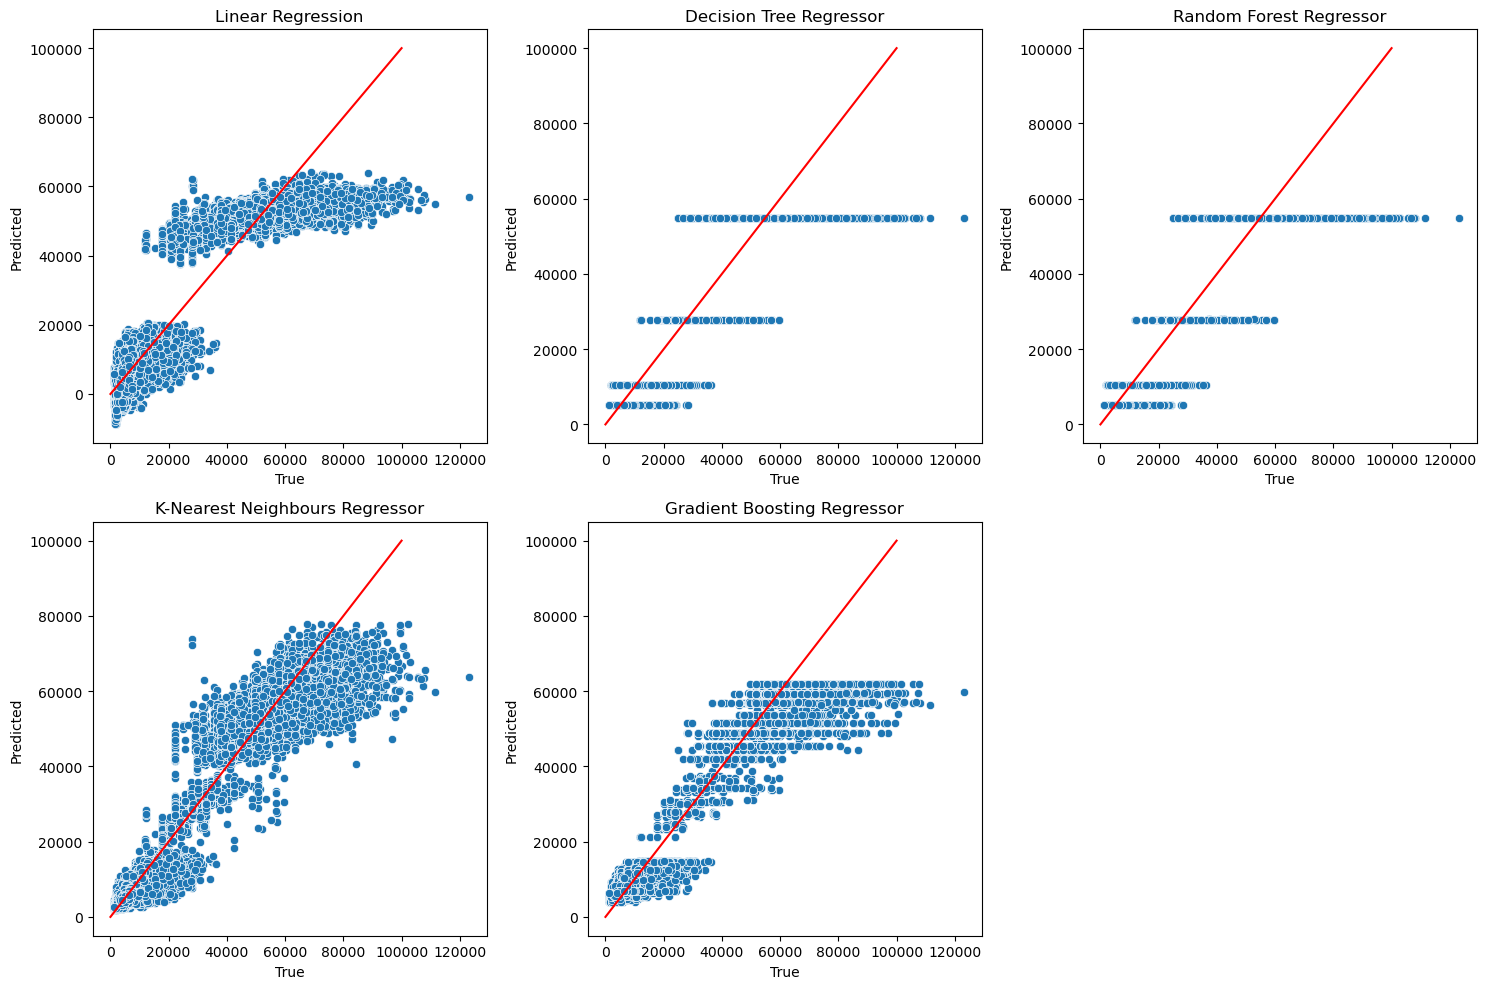

In [45]:
# Displaying True vs Predicted Analysis scatterplots of all the models
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=lr_pipeline.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Linear Regression')
plt.xlabel('True')
plt.ylabel('Predicted')

# Decision Tree Regressor
plt.subplot(2, 3, 2)    
sns.scatterplot(x=y_test, y=dtr_pipeline.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Decision Tree Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Random Forest Regressor
plt.subplot(2, 3, 3)
sns.scatterplot(x=y_test, y=rfr_pipeline.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Random Forest Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# KNN Regressor
plt.subplot(2, 3, 4)
sns.scatterplot(x=y_test, y=knnr_pipeline.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('K-Nearest Neighbours Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Gradient Boosting Regressor
plt.subplot(2, 3, 5)
sns.scatterplot(x=y_test, y=gbr_pipeline.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Gradient Boosting Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()

Another plot is generated which combines all the scatterplots for the true vs. predicted values of the models. It sets the figure size to 20x10 inches and plots the true values (`y_test`) against the predicted values from each model pipeline (`lr_pipeline`, `dtr_pipeline`, `rfr_pipeline`, `knnr_pipeline`, `gbr_pipeline`) using different colours for each model. A black diagonal line is plotted to indicate the ideal scenario where predicted values match the true values. The plot is labelled with 'Actual' on the x-axis and 'Predicted' on the y-axis, and a legend is added to distinguish between the models. Finally, the plot is displayed using plt.show().

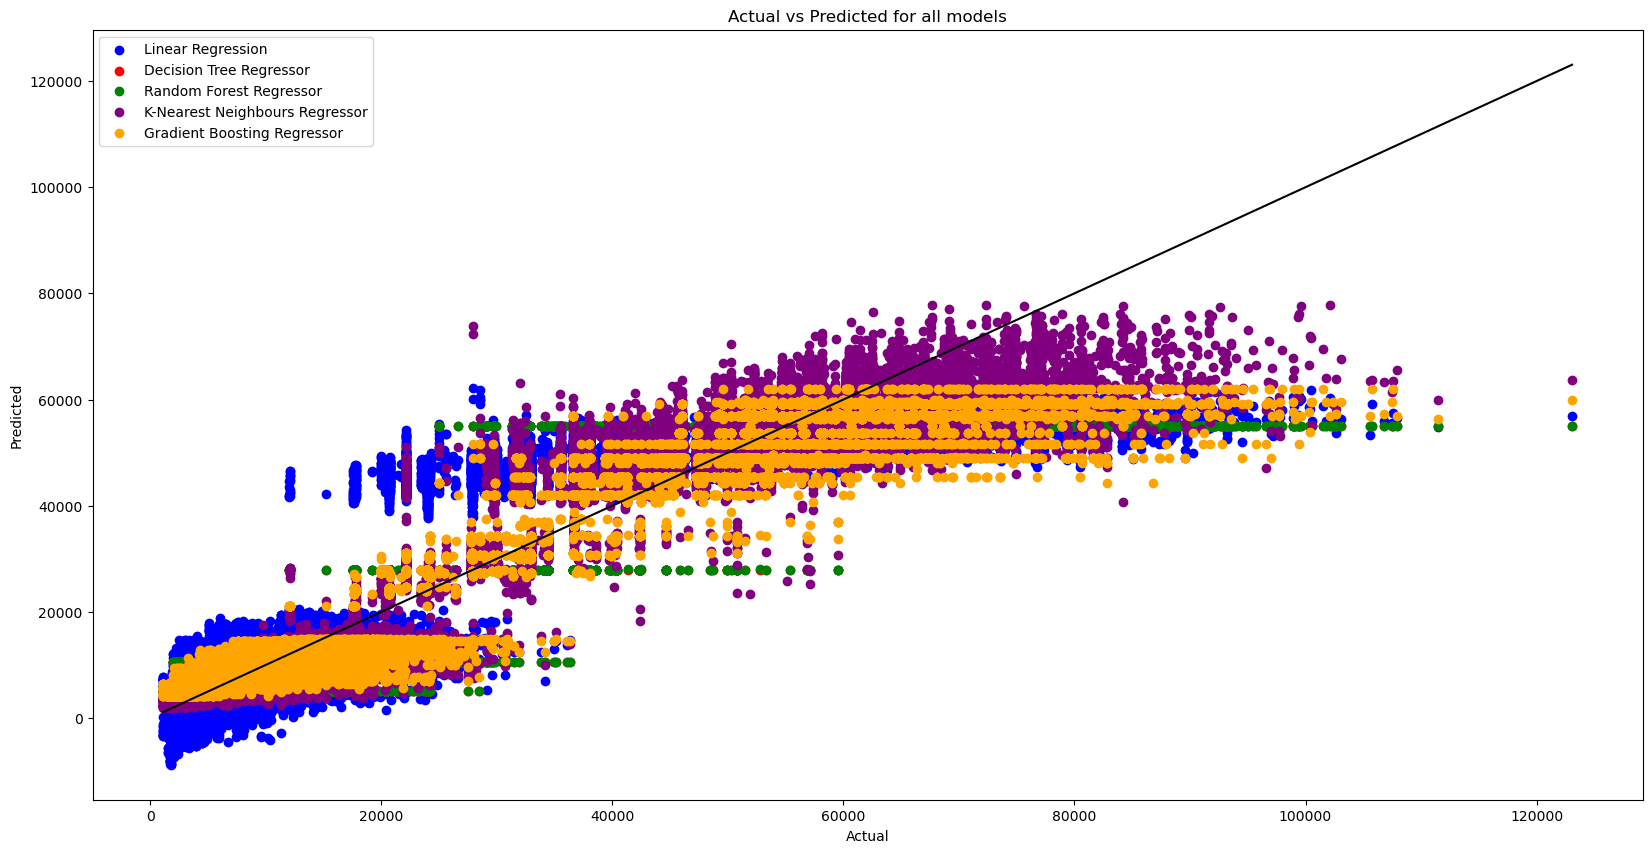

In [46]:
# Displaying True v Predicted scatterplots of all the models in a single plot
plt.figure(figsize=(20, 10))
plt.scatter(y_test, lr_pipeline.predict(X_test), label='Linear Regression', color='blue')
plt.scatter(y_test, dtr_pipeline.predict(X_test), label='Decision Tree Regressor', color='red')
plt.scatter(y_test, rfr_pipeline.predict(X_test), label='Random Forest Regressor', color='green')
plt.scatter(y_test, knnr_pipeline.predict(X_test), label='K-Nearest Neighbours Regressor', color='purple')
plt.scatter(y_test, gbr_pipeline.predict(X_test), label='Gradient Boosting Regressor', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for all models')
plt.legend()
plt.show()

<b>Observation(s):</b>

**General Performance:**

* All models demonstrate a good fit to the training data, as indicated by the high R² scores. However, although not much, but there are varying degrees of overfitting, as evidenced by the differences in performance between the training and test data.

**Model-Specific Performance:**

* **Linear Regression** captures the overall trend of the data well but struggles with non-linear relationships between the variables because of relatively high error metrics compared to other models. 
* **Decision Tree Regressor** performs well but shows slight overfitting, as indicated by the small difference between the training and test R² scores.
* **Random Forest Regressor** achieves a good balance between bias and variance, performing consistently well on both the training and test data.
* **K-Nearest Neighbors Regressor** shows the best performance with the highest R² scores and the lowest error metrics, indicating strong predictive power and generalisation.
* **Gradient Boosting Regressor** achieves high R² scores on both the training and test data but shows some overfitting, as indicated by the difference in error metrics.

Overall, the K-Nearest Neighbours Regressor appears to be the best performing model, achieving a good balance between bias and variance and generalising well to unseen data. However, all models exhibit some degree of overfitting, indicating that further investigation is needed to improve their performance.


### <b>7. Evaluation & Analysis of Existing Models</b>

In the next step, all five models are evaluated using RandomizedSearchCV() to optimise their performance and efficiency. This involves introducing and altering hyperparameters specific to each algorithm to identify the best combination that enhances model accuracy and generalisation. By systematically searching through a range of hyperparameter values, RandomizedSearchCV() helps in fine-tuning the models, thereby improving their predictive capabilities and reducing the risk of overfitting.

#### <b>a. RandomizedSearchCV</b>

In this step, all five models are evaluated using `RandomizedSearchCV()` to optimise their hyperparameters and enhance their performance. This method performs a randomised search over specified parameter values for each model, allowing for a more efficient exploration of the hyperparameter space compared to grid search. It is preferred over `GridSearchCV()` because it can cover a broader range of hyperparameter values with fewer iterations, making it more computationally efficient and faster, especially when dealing with large datasets or complex models. This approach helps in identifying the best combination of hyperparameters that yield the highest model performance, ensuring that each model is fine-tuned for optimal results. The results from `RandomizedSearchCV()` are then used to evaluate and compare the performance of the models based on various metrics.

#### <b>i. Linear Regressor</b>

Regarding the use of `RandomizedSearchCV()` to optimise hyperparameters for a Ridge Regression mode, the hyperparameters being tuned include `fit_intercept`, `alpha`, and `solver`. An instance of Ridge Regression is created, followed by an instance of `RandomizedSearchCV()` with specified iterations, cross-validation, and parallel processing enabled. The model is then fitted to the training data (`X_train`, `y_train`). The results of the randomised search are stored in a data frame, sorted by the rank of the test score, and the top 5 results are displayed, including parameters, mean and standard deviation of train and test scores, and rank of the test score. Ridge Regression is used in this context because it is a regularised version of linear regression that helps prevent overfitting by adding a penalty term to the loss function. This penalty term, controlled by the hyperparameter alpha, shrinks the coefficients of less important features, leading to a more robust model. Ridge Regression is particularly useful when dealing with multicollinearity or when the number of features is larger than the number of observations, as it can handle such scenarios better than ordinary least squares regression.

In [47]:
# Declaring relevant hyperparameters for RandomizedSearchCV for Ridge regression
lr_cv_parameters = {
    'fit_intercept': [True, False],
    'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Creating an instance for Ridge Regression
ridge = Ridge()

# Creating an instance for RandomizedSearchCV
ridge_cv = RandomizedSearchCV(estimator=ridge, param_distributions=lr_cv_parameters, n_iter=10, cv=5, n_jobs=-1, verbose=1, return_train_score=True, random_state=42)

# Fitting the model
ridge_cv.fit(X_train, y_train)

# Displaying all randomized search results in a dataframe
lr_cv_results = pd.DataFrame(ridge_cv.cv_results_)
lr_cv_results.sort_values(by='rank_test_score', inplace=True)
lr_cv_results = lr_cv_results[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(5).reset_index(drop=True)

# Displaying the randomized search results
lr_cv_results

Fitting 5 folds for each of 10 candidates, totalling 50 fits


params  mean_train_score  \
0  {'solver': 'auto', 'fit_intercept': True, 'alp...          0.909681   
1  {'solver': 'saga', 'fit_intercept': True, 'alp...          0.909681   
2  {'solver': 'svd', 'fit_intercept': True, 'alph...          0.909680   
3  {'solver': 'sag', 'fit_intercept': True, 'alph...          0.909680   
4  {'solver': 'sparse_cg', 'fit_intercept': True,...          0.909680   

   std_train_score  mean_test_score  std_test_score  rank_test_score  
0         0.000126         0.909672        0.000505                1  
1         0.000126         0.909672        0.000505                2  
2         0.000126         0.909672        0.000505                3  
3         0.000126         0.909672        0.000505                4  
4         0.000126         0.909671        0.000505                5

In the next step, the code snippet below generates a line plot to visualise the mean train and test scores across different hyperparameter combinations. It first sets the figure size to 10 by 5 inches. Then, it plots the mean train scores and mean test scores from the `lr_cv_results` data frame, marking each data point with a circle (marker='o') and labelling the lines as Train Score and Test Score respectively. The plot is titled Mean Train and Test Scores vs. Hyperparameter Combinations, and the x-axis and y-axis are labelled Hyperparameter Combination and Mean Score respectively. A legend is added to distinguish between the train and test scores, and finally, the plot is displayed using `plt.show()`.

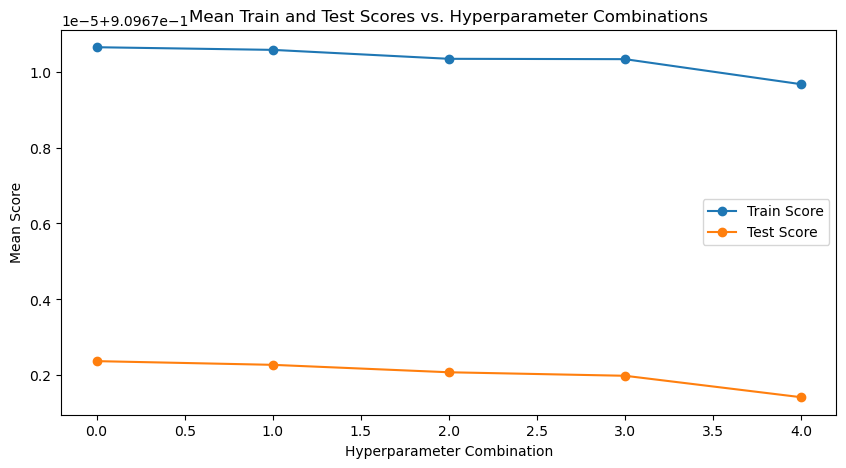

In [48]:
# Plotting the mean test and train scores on a line plot
plt.figure(figsize=(10, 5))

plt.plot(lr_cv_results['mean_train_score'], marker='o', label='Train Score')
plt.plot(lr_cv_results['mean_test_score'], marker='o', label='Test Score')

# Adding title and labels
plt.title('Mean Train and Test Scores vs. Hyperparameter Combinations')

# Labeling X and Y labels
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Score')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In the next step, the best parameters from a `RandomizedSearchCV()` object for a Ridge regression model are extracted, and a pipeline is created using these parameters. The model is then fitted to the training data and its performance is evaluated on both the training and test datasets, displaying the train and test scores. Various error metrics, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE), are calculated and printed. Additionally, the cross-validation score is computed using 10-fold cross-validation with R² as the scoring metric.

In [49]:
# Displaying the best parameters
lr_cv_best_params = ridge_cv.best_params_
lr_cv_best_fit_intercept = lr_cv_best_params['fit_intercept']
lr_cv_best_alpha = lr_cv_best_params['alpha']
lr_cv_best_solver = lr_cv_best_params['solver']

# Fitting the model with the best parameters
lr_pipeline = Pipeline([
    ('ridge_cv', Ridge(fit_intercept=lr_cv_best_fit_intercept, alpha=lr_cv_best_alpha, solver=lr_cv_best_solver))
])

# Fitting the model
lr_pipeline.fit(X_train, y_train)

# Evaluate model performance
lr_cv_train_Score = lr_pipeline.score(X_train, y_train)
lr_cv_Test_Score = lr_pipeline.score(X_test, y_test)

# Displaying the scores
print('Linear Regression CV Train Score is:', lr_cv_train_Score)
print('Linear Regression CV Test Score is:', lr_cv_Test_Score)

# Calculating the error metrics
y_pred = lr_pipeline.predict(X_test)
lr_cv_MAE = mean_absolute_error(y_test, y_pred)
lr_cv_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
lr_cv_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
lr_cv_MSE = mean_squared_error(y_test, y_pred)

# Displaying the error metrics
print('Mean Absolute Error:', lr_cv_MAE)
print('Root Mean Squared Error:', lr_cv_RMSE)
print('Mean Squared Error:', lr_cv_MSE)
print('Mean Absolute Percentage Error:', lr_cv_MAPE)

Linear Regression CV Train Score is: 0.9096797244523198
Linear Regression CV Test Score is: 0.909057393765079
Mean Absolute Error: 4564.649866380555
Root Mean Squared Error: 6854.9574197044685
Mean Squared Error: 46990441.22596135
Mean Absolute Percentage Error: 44.26404763414934


<b>Observation(s):</b>

* The model performs well on the training data, with an R² score of approximately 0.91. This indicates that the model has effectively learned the underlying patterns in the training dataset.
* The model generalises well to the test data, also achieving an R² score of approximately 0.91. This suggests that the model is not overfitting and can make accurate predictions on unseen data.
* The Mean Absolute Error (MAE) is around 4565, indicating that, on average, the model's predictions are reasonably close to the actual values.
* The Root Mean Squared Error (RMSE) is approximately 6855, showing that the model's predictions have a moderate spread from the actual values, with some variability.
* The Mean Squared Error (MSE) is around 46,990,441, suggesting that there are some predictions with large errors, which significantly impact the overall error metric.
* The Mean Absolute Percentage Error (MAPE) is about 44.26%, indicating that the model's predictions can be off by a considerable percentage, which might affect its reliability in certain scenarios.

#### <b>ii. Decision Tree Regressor</b>

This code sets up and performs hyperparameter tuning for a Decision Tree Regressor using `RandomizedSearchCV()`. It defines a parameter grid with various values for `max_depth`, `min_samples_split`, and `min_samples_leaf`, then creates an instance of the Decision Tree Regressor. A `RandomizedSearchCV()` instance is created with the regressor, parameter grid, and additional settings such as the number of iterations, cross-validation folds, and parallel processing. The model is then fitted to the training data (`X_train`, `y_train`). The results of the randomised search are stored in a DataFrame, sorted by the test score rank, and the top five configurations are displayed, including their parameters and performance metrics.

In [50]:
# Creating a parameter grid for RandomizedSearchCV for Decision Tree Regressor
dtr_cv_parameters = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Creating an instance for Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Creating an instance for RandomizedSearchCV
dtr_cv = RandomizedSearchCV(estimator=dtr, param_distributions=dtr_cv_parameters, n_iter=10, cv=5, n_jobs=-1, verbose=1, return_train_score=True, random_state=42)

# Fitting the model
dtr_cv.fit(X_train, y_train)

# Displaying all randomized search results in a dataframe
dtr_cv_results = pd.DataFrame(dtr_cv.cv_results_)
dtr_cv_results.sort_values(by='rank_test_score', inplace=True)
dtr_cv_results = dtr_cv_results[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(5).reset_index(drop=True)

# Displaying the randomized search results
dtr_cv_results

Fitting 5 folds for each of 10 candidates, totalling 50 fits


params  mean_train_score  \
0  {'min_samples_split': 10, 'min_samples_leaf': ...          0.973179   
1  {'min_samples_split': 20, 'min_samples_leaf': ...          0.973019   
2  {'min_samples_split': 10, 'min_samples_leaf': ...          0.970022   
3  {'min_samples_split': 2, 'min_samples_leaf': 1...          0.970080   
4  {'min_samples_split': 20, 'min_samples_leaf': ...          0.969953   

   std_train_score  mean_test_score  std_test_score  rank_test_score  
0         0.000723         0.971812        0.000495                1  
1         0.000741         0.971757        0.000430                2  
2         0.000570         0.969119        0.000339                3  
3         0.000580         0.969113        0.000374                4  
4         0.000583         0.969104        0.000322                5

Then a line plot is created to visualise the mean train and test scores for different hyperparameter combinations from a Decision Tree Regressor's randomised search results. It sets the figure size, plots the mean train and test scores with markers, adds a title and axis labels, includes a legend to differentiate between the train and test scores, and finally displays the plot using `plt.show()`.

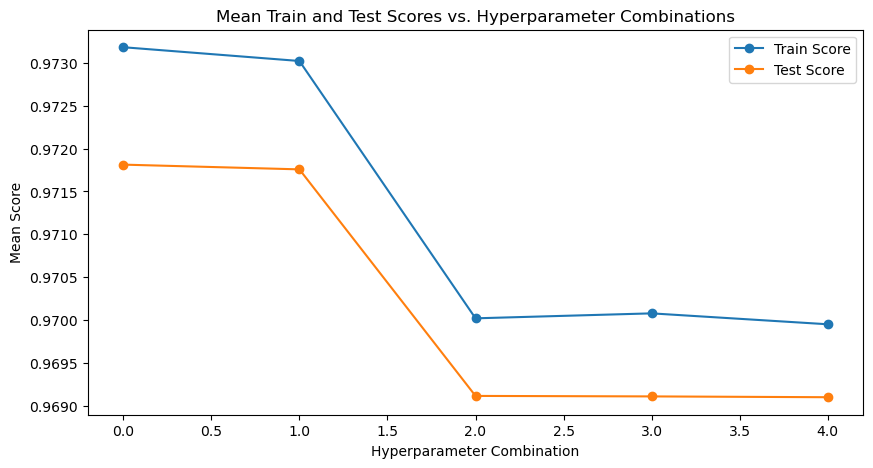

In [51]:
# Plotting the mean test and train scores on a line plot
plt.figure(figsize=(10, 5))

plt.plot(dtr_cv_results['mean_train_score'], marker='o', label='Train Score')
plt.plot(dtr_cv_results['mean_test_score'], marker='o', label='Test Score')

# Adding title and labels
plt.title('Mean Train and Test Scores vs. Hyperparameter Combinations')

# X and Y labels
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Score')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

The code below applies the best hyperparameters found by RandomizedSearchCV to a Decision Tree Regressor and evaluates its performance. It extracts the best parameters (`max_depth`, `min_samples_split`, `min_samples_leaf`) and creates a pipeline with the Decision Tree Regressor using these parameters. The model is then fitted to the training data, and its accuracy scores on both the training and test datasets are calculated and printed. The code also computes and prints various error metrics, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE).

In [52]:
# Applying the best parameters to the Decision Tree Regressor
dtr_cv_best_params = dtr_cv.best_params_
dtr_cv_best_max_depth = dtr_cv_best_params['max_depth']
dtr_cv_best_min_samples_split = dtr_cv_best_params['min_samples_split']
dtr_cv_best_min_samples_leaf = dtr_cv_best_params['min_samples_leaf']

# Creating a Decision Tree Regressor Instance via Pipeline with the best parameters
dt_pipeline = Pipeline([
    ('decision tree', DecisionTreeRegressor(max_depth=dtr_cv_best_max_depth, min_samples_split=dtr_cv_best_min_samples_split, min_samples_leaf=dtr_cv_best_min_samples_leaf))
])

# Fitting the Decision Tree regressor Model
dt_pipeline.fit(X_train, y_train)

# Calculating Accuracy Scores of the Decision Tree Regressor Model
dtr_cv_train_Score = dt_pipeline.score(X_train, y_train)
dtr_cv_Test_Score = dt_pipeline.score(X_test, y_test)

# Displaying the Accuracy Scores
print('Decision Tree Regressor CV Train Score is:', dtr_cv_train_Score)
print('Decision Tree Regressor CV Test Score is:', dtr_cv_Test_Score)

# Calculating the error metrics
y_pred = dt_pipeline.predict(X_test)

dtr_cv_MAE = mean_absolute_error(y_test, y_pred)
dtr_cv_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
dtr_cv_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
dtr_cv_MSE = mean_squared_error(y_test, y_pred)

# Displaying the error metrics
print('Mean Absolute Error:', dtr_cv_MAE)
print('Root Mean Squared Error:', dtr_cv_RMSE)
print('Mean Squared Error:', dtr_cv_MSE)
print('Mean Absolute Percentage Error:', dtr_cv_MAPE)

Decision Tree Regressor CV Train Score is: 0.9733096498862283
Decision Tree Regressor CV Test Score is: 0.9717227274637569
Mean Absolute Error: 2121.484645746418
Root Mean Squared Error: 3822.4324757391523
Mean Squared Error: 14610990.031585347
Mean Absolute Percentage Error: 15.39693934020789


<b>Observation(s):</b>

* The model performs exceptionally well on the training data, with an R² score of approximately 0.97. This indicates that the model has effectively learned the underlying patterns in the training dataset.
* The model generalises well to the test data, also achieving an R² score of approximately 0.97. This suggests that the model is not overfitting and can make accurate predictions on unseen data.
* The Mean Absolute Error (MAE) is around 2121, indicating that, on average, the model's predictions are reasonably close to the actual values.
* The Root Mean Squared Error (RMSE) is approximately 3822, showing that the model's predictions have a moderate spread from the actual values, with some variability.
* The Mean Squared Error (MSE) is around 14,611,000, suggesting that there are some predictions with large errors, which significantly impact the overall error metric.
* The Mean Absolute Percentage Error (MAPE) is about 15.40%, indicating that the model's predictions can be off by a moderate percentage, which might affect its reliability in certain scenarios.

#### <b>iii. Random Forest Regressor</b>

This code snippet performs hyperparameter tuning for a Random Forest Regressor using RandomizedSearchCV. It first defines a dictionary of hyperparameters (`n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`) to be tested. An instance of `RandomForestRegressor()` is created, followed by an instance of `RandomizedSearchCV()` configured to search over the specified hyperparameters with 10 iterations and 5-fold cross-validation. The model is then fitted to the training data (`X_train`, `y_train`). The results of the randomised search are stored in a DataFrame, sorted by the rank of the test score, and the top 5 results are displayed, including parameters, mean and standard deviation of train and test scores, and rank of the test score.

In [53]:
# Declaring hyperparameters for RandomizedSearchCV for Random Forest Regressor
rfr_cv_parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Creating an instance for Random Forest Regressor
rfr = RandomForestRegressor()

# Creating an instance for RandomizedSearchCV
rfr_cv = RandomizedSearchCV(estimator=rfr, param_distributions=rfr_cv_parameters, n_iter=10, cv=5, n_jobs=-1, verbose=1, return_train_score=True, random_state=42)

# Fitting the model
rfr_cv.fit(X_train, y_train)

# Displaying all randomized search results in a dataframe
rfr_cv_results = pd.DataFrame(rfr_cv.cv_results_)
rfr_cv_results.sort_values(by='rank_test_score', inplace=True)

# Displaying the randomized search results
rfr_cv_results = rfr_cv_results[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(5).reset_index(drop=True)
rfr_cv_results

Fitting 5 folds for each of 10 candidates, totalling 50 fits


params  mean_train_score  \
0  {'n_estimators': 500, 'min_samples_split': 15,...          0.975302   
1  {'n_estimators': 100, 'min_samples_split': 20,...          0.975079   
2  {'n_estimators': 400, 'min_samples_split': 20,...          0.975046   
3  {'n_estimators': 200, 'min_samples_split': 20,...          0.967853   
4  {'n_estimators': 100, 'min_samples_split': 10,...          0.967859   

   std_train_score  mean_test_score  std_test_score  rank_test_score  
0         0.000375         0.974178        0.000154                1  
1         0.000376         0.974067        0.000170                2  
2         0.000419         0.974053        0.000113                3  
3         0.000295         0.967381        0.000153                4  
4         0.000259         0.967364        0.000193                5

The code snippet below generates a line plot to visualise the mean train and test scores for different hyperparameter combinations of a Random Forest Regressor. It first sets the figure size to 10x5 inches, then plots the mean train scores and mean test scores from the `rfr_cv_results` DataFrame, each with markers and labels. The plot is titled "Mean Train and Test Scores vs. Hyperparameter Combinations," with appropriate labels for the x-axis (Hyperparameter Combination) and y-axis (Mean Score). A legend is added to distinguish between the train and test scores, and finally, the plot is displayed using `plt.show()`.

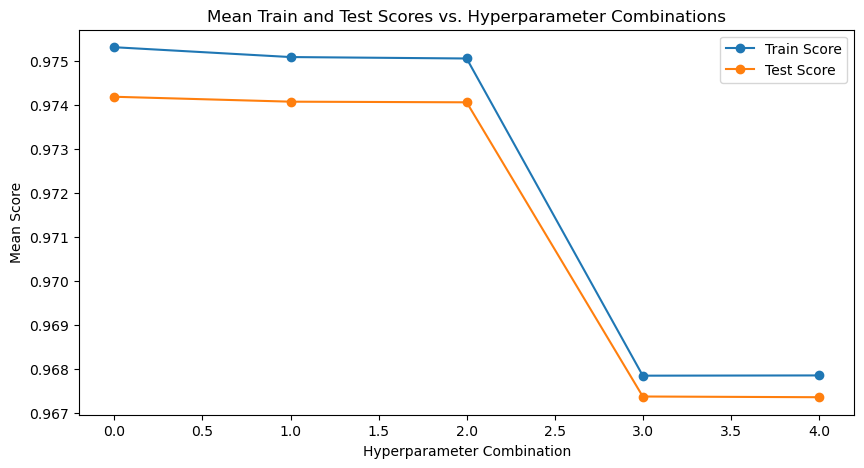

In [54]:
# Plotting the mean test and train scores on a line plot
plt.figure(figsize=(10, 5))

plt.plot(rfr_cv_results['mean_train_score'], marker='o', label='Train Score')
plt.plot(rfr_cv_results['mean_test_score'], marker='o', label='Test Score')

# Adding title and labels
plt.title('Mean Train and Test Scores vs. Hyperparameter Combinations')

# X and Y labels
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Score')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

The code below applies the best hyperparameters from `RandomizedSearchCV()` to a `RandomForestRegressor()`, creates a pipeline with these parameters, and fits the model to the training data. It calculates and prints the train and test scores, then predicts the test set and evaluates the model using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE).

In [55]:
# Applying the best parameters to the Random Forest Regressor
rfr_cv_best_params = rfr_cv.best_params_
rfr_cv_best_n_estimators = rfr_cv_best_params['n_estimators']
rfr_cv_best_max_depth = rfr_cv_best_params['max_depth']
rfr_cv_best_min_samples_split = rfr_cv_best_params['min_samples_split']
rfr_cv_best_min_samples_leaf = rfr_cv_best_params['min_samples_leaf']

# Creating a Random Forest Regressor Instance via Pipeline
rf_pipeline = Pipeline([
    ('random forest', RandomForestRegressor(n_estimators=rfr_cv_best_n_estimators, max_depth=rfr_cv_best_max_depth, min_samples_split=rfr_cv_best_min_samples_split, min_samples_leaf=rfr_cv_best_min_samples_leaf))
])

# Fitting the Random Forest Regressor Model
rf_pipeline.fit(X_train, y_train)

# Calculating the accuracy scores of the Random Forest Regressor Model
rfr_cv_train_Score = rf_pipeline.score(X_train, y_train)
rfr_cv_Test_Score = rf_pipeline.score(X_test, y_test)

# Displaying the accuracy scores
print('Random Forest Regressor Train Score is:', rfr_cv_train_Score)
print('Random Forest Regressor Test Score is:', rfr_cv_Test_Score)

# Calculate mean squared error of random forest regressor model
y_pred = rf_pipeline.predict(X_test)

rfr_cv_MAE = mean_absolute_error(y_test, y_pred)
rfr_cv_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
rfr_cv_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rfr_cv_MSE = mean_squared_error(y_test, y_pred)

# Displaying the error metrics
print('Mean Absolute Error:', rfr_cv_MAE)
print('Root Mean Squared Error:', rfr_cv_RMSE)
print('Mean Squared Error:', rfr_cv_MSE)
print('Mean Absolute Percentage Error:', rfr_cv_MAPE)

Random Forest Regressor Train Score is: 0.9754002695757271
Random Forest Regressor Test Score is: 0.9740217934628888
Mean Absolute Error: 2034.7186007148237
Root Mean Squared Error: 3663.7484362357495
Mean Squared Error: 13423052.6040199
Mean Absolute Percentage Error: 15.009673963747627


<b>Observation(s):</b>

* The model performs exceptionally well on the training data, with a train score of approximately 0.975. This indicates that the model has effectively learned the underlying patterns in the training dataset.
* The model generalises well to the test data, with a test score of approximately 0.974. This suggests that the model is not overfitting and can make accurate predictions on unseen data.
* The average absolute difference between predicted and actual values is relatively high, with a Mean Absolute Error (MAE) of around 2035. This means that, on average, the model's predictions have significant errors.
* The model's predictions have a substantial spread from the actual values, as indicated by a Root Mean Squared Error (RMSE) of approximately 3664. This suggests that while the predictions are generally accurate, there is considerable variability.
* The average squared difference between predicted and actual values is large, with a Mean Squared Error (MSE) of about 13,423,053. This implies that some predictions have large errors, significantly impacting the overall error metric.
* The average percentage error in predictions is high, with a Mean Absolute Percentage Error (MAPE) of around 15%. This indicates that the model's predictions can be off by a considerable percentage, potentially affecting its reliability in certain scenarios.

#### <b>iv. K-Nearest Neighbour Regression</b>

The code snippet performs hyperparameter tuning for a K-Nearest Neighbours Regressor using `RandomizedSearchCV()`. It begins by declaring a dictionary of hyperparameters, including the number of neighbours (`n_neighbors`) ranging from 1 to 19, weights (`uniform` and `distance`), and metrics (`euclidean` and `manhattan`). An instance of `KNeighborsRegressor()` is created, followed by an instance of `RandomizedSearchCV()` configured to search over the specified hyperparameters with 10 iterations and 5-fold cross-validation, utilising all available CPU cores (`n_jobs=-1`). The model is then fitted to the training data (`X_train`, `y_train`). The results of the randomised search are stored in a DataFrame, sorted by the test score rank, and the top 5 results are displayed, including parameters, mean and standard deviation of train and test scores, and rank of test scores.

In [56]:
# Declaring hyperparameters for RandomizedSearchCV for K-Nearest Neighbours Regressor
knnr_cv_parameters = {
    'n_neighbors': np.arange(1, 20, 1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creating an instance for K-Nearest Neighbours Regressor
knn = KNeighborsRegressor()

# Creating an instance for RandomizedSearchCV
knn_cv = RandomizedSearchCV(estimator=knn, param_distributions=knnr_cv_parameters, n_iter=10, cv=5, n_jobs=-1, verbose=1, return_train_score=True, random_state=42)

# Fitting the model
knn_cv.fit(X_train, y_train)

# Displaying all randomized search results in a dataframe
knn_cv_results = pd.DataFrame(knn_cv.cv_results_)
knn_cv_results.sort_values(by='rank_test_score', inplace=True)

# Displaying the randomized search results
knn_cv_results = knn_cv_results[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(5).reset_index(drop=True)

# Displaying the randomized search results
knn_cv_results

Fitting 5 folds for each of 10 candidates, totalling 50 fits


params  mean_train_score  \
0  {'weights': 'distance', 'n_neighbors': 8, 'met...          0.999997   
1  {'weights': 'distance', 'n_neighbors': 5, 'met...          0.999997   
2  {'weights': 'distance', 'n_neighbors': 4, 'met...          0.999997   
3  {'weights': 'distance', 'n_neighbors': 14, 'me...          0.999997   
4  {'weights': 'uniform', 'n_neighbors': 7, 'metr...          0.983524   

   std_train_score  mean_test_score  std_test_score  rank_test_score  
0     5.950903e-07         0.979595        0.000094                1  
1     5.950903e-07         0.979593        0.000153                2  
2     5.950903e-07         0.979384        0.000126                3  
3     5.950903e-07         0.978708        0.000138                4  
4     4.854665e-05         0.977466        0.000165                5

The code snippet generates a line plot to visualise the mean train and test scores for different hyperparameter combinations from a K-Nearest Neighbours Regressor model. It first sets the figure size to 10 by 5 inches. Then, it plots the mean train scores and mean test scores from the `knn_cv_results` data frame, marking each point with a circle and labelling the lines accordingly. The plot is titled "Mean Train and Test Scores vs. Hyperparameter Combinations," with the x-axis labelled as "Hyperparameter Combination" and the y-axis labelled as "Mean Score." A legend is added to distinguish between the train and test scores, and finally, the plot is displayed using `plt.show()`.

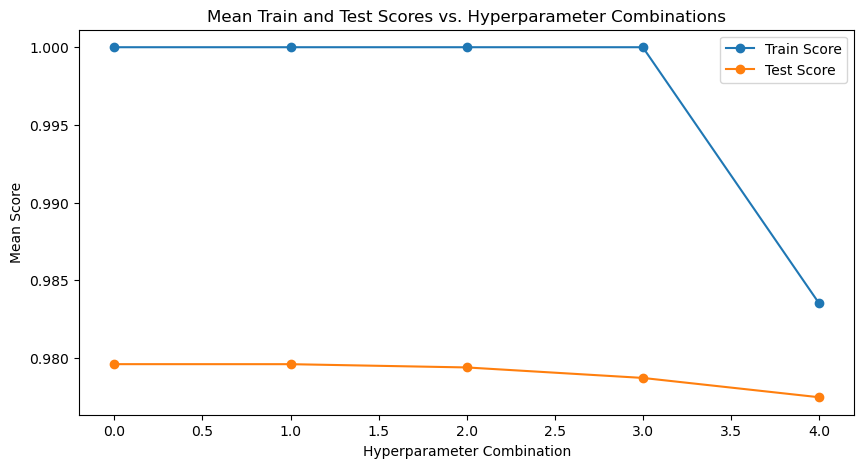

In [57]:
# Plotting the mean test and train scores on a line plot
plt.figure(figsize=(10, 5))

plt.plot(knn_cv_results['mean_train_score'], marker='o', label='Train Score')
plt.plot(knn_cv_results['mean_test_score'], marker='o', label='Test Score')

# Adding title and labels
plt.title('Mean Train and Test Scores vs. Hyperparameter Combinations')

# X and Y labels
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Score')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

The code snippet applies the best parameters from a cross-validation search to a K-Nearest Neighbours Regressor. It extracts the best number of neighbours (`n_neighbors`), weights (`weights`), and metric (`metric`) from the cross-validation results and creates a K-Nearest Neighbours Regressor instance using a pipeline. The model is then fitted to the training data (`X_train`, `y_train`). The train and test scores are calculated and printed. The model predicts the test data (`X_test`), and various error metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE) are computed and displayed.

In [58]:
# Applying the best parameters to the K-Nearest Neighbours Regressor
knnr_cv_best_params = knn_cv.best_params_
knnr_cv_best_n_neighbors = knnr_cv_best_params['n_neighbors']
knnr_cv_best_weights = knnr_cv_best_params['weights']
knnr_cv_best_metric = knnr_cv_best_params['metric']

# Creating a K-Nearest Neighbours Regressor Instance via Pipeline
knn_pipeline = Pipeline([
    ('knn', KNeighborsRegressor(n_neighbors=knnr_cv_best_n_neighbors, weights=knnr_cv_best_weights, metric=knnr_cv_best_metric))
])

# Fitting the K-Nearest Neighbours Regressor Model
knn_pipeline.fit(X_train, y_train)

# Calculating the accuracy scores of the K-Nearest Neighbours Regressor Model
knnr_cv_train_Score = knn_pipeline.score(X_train, y_train)
knnr_cv_Test_score = knn_pipeline.score(X_test, y_test)

# Displaying the accuracy scores
print('K-Nearest Neighbours Train Score is:', knnr_cv_train_Score)
print('K-Nearest Neighbours Test Score is:', knnr_cv_Test_score)

# Calculating error metrics of K-Nearest Neighbours Regressor
y_pred = knn_pipeline.predict(X_test)

# Calculating the error metrics
knn_cv_MAE = mean_absolute_error(y_test, y_pred)
knn_cv_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
knn_cv_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
knn_cv_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Mean Absolute Error:', knn_cv_MAE)
print('Root Mean Squared Error:', knn_cv_RMSE)
print('Mean Squared Error:', knn_cv_MSE)
print('Mean Absolute Percentage Error:', knn_cv_MAPE)

K-Nearest Neighbours Train Score is: 0.9999965318387475
K-Nearest Neighbours Test Score is: 0.9799190090728465
Mean Absolute Error: 1536.616588907408
Root Mean Squared Error: 3221.1699088462055
Mean Squared Error: 10375935.581656272
Mean Absolute Percentage Error: 11.474372759226364


<b>Observation(s):</b>

* The model performs exceptionally well on the training data, with a train score of approximately 1.0. This indicates that the model has effectively learned the underlying patterns in the training dataset.
* The model's performance on the test data, with a test score of approximately 0.98, is slightly lower than on the training data, suggesting some degree of overfitting. However, it still generalises reasonably well to unseen data.
* The average absolute difference between predicted and actual values (MAE) is relatively high, at around 1537, indicating that the model's predictions have significant errors on average.
* The Root Mean Squared Error (RMSE) of approximately 3221 shows that the model's predictions have a substantial spread from the actual values, indicating considerable variability in the errors.
* The Mean Squared Error (MSE) is large, at about 10,375,936, suggesting that there are some predictions with large errors, which significantly impact the overall error metric.
* The Mean Absolute Percentage Error (MAPE) is high, at around 11.47%, meaning that the model's predictions can be off by a considerable percentage, which might affect its reliability in certain scenarios.

#### <b>v. Gradient Boosting Regressor</b>

The code snippet defines a set of hyperparameters for a `RandomizedSearchCV()` to optimise a `GradientBoostingRegressor()`. The hyperparameters include different values for `n_estimators`, `max_depth`, and `learning_rate`. An instance of `GradientBoostingRegressor()` is created, followed by an instance of `RandomizedSearchCV()` configured with the specified hyperparameters to perform 10 iterations of cross-validation with 5 folds, utilising all available CPU cores (`n_jobs=-1`). The model is then fitted to the training data (`X_train`, `y_train`). The results of the randomised search are stored in a data frame, sorted by the rank of the test scores, and the top 5 results are displayed, showing the parameters, mean and standard deviation of train and test scores, and the rank of the test scores.

In [59]:
# Declaring hyperparameters for RandomizedSearchCV for Gradient Boosting Regressor
gbr_cv_parameters = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
}

# Creating an instance for Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Creating an instance for RandomizedSearchCV
gbr_cv = RandomizedSearchCV(estimator=gbr, param_distributions=gbr_cv_parameters, n_iter=10, cv=5, n_jobs=-1, verbose=1, return_train_score=True, random_state=42)

# Fitting the model
gbr_cv.fit(X_train, y_train)

# Displaying all randomized search results in a dataframe
gbr_cv_results = pd.DataFrame(gbr_cv.cv_results_)
gbr_cv_results.sort_values(by='rank_test_score', inplace=True)

# Displaying the randomized search results
gbr_cv_results = gbr_cv_results[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(5).reset_index(drop=True)

# Displaying the randomized search results
gbr_cv_results

Fitting 5 folds for each of 10 candidates, totalling 50 fits


params  mean_train_score  \
0  {'n_estimators': 400, 'max_depth': 7, 'learnin...          0.990520   
1  {'n_estimators': 400, 'max_depth': 8, 'learnin...          0.990406   
2  {'n_estimators': 400, 'max_depth': 6, 'learnin...          0.986574   
3  {'n_estimators': 400, 'max_depth': 5, 'learnin...          0.986083   
4  {'n_estimators': 400, 'max_depth': 6, 'learnin...          0.982426   

   std_train_score  mean_test_score  std_test_score  rank_test_score  
0         0.000098         0.987884        0.000262                1  
1         0.000125         0.987718        0.000196                2  
2         0.000078         0.984886        0.000203                3  
3         0.000104         0.984584        0.000197                4  
4         0.000099         0.981323        0.000165                5

The code snippet creates a line plot to visualise the mean train and test scores from a cross-validation process for a Gradient Boosting Regressor (GBR). It begins by setting the figure size to 10 by 5 inches. It then plots the mean train scores and mean test scores from the `gbr_cv_results` DataFrame, using markers to highlight each point and labels to distinguish between the train and test scores. The plot is titled "Mean Train and Test Scores vs. Hyperparameter Combinations," with the x-axis labelled as "Hyperparameter Combination" and the y-axis labelled as "Mean Score." A legend is added to differentiate between the train and test scores, and finally, the plot is displayed using `plt.show()`.

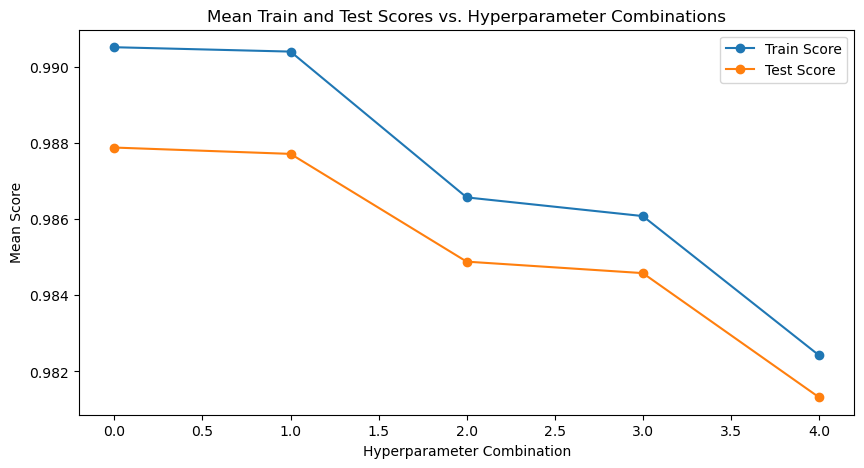

In [60]:
# Plotting the mean test and train scores on a line plot
plt.figure(figsize=(10, 5))

plt.plot(gbr_cv_results['mean_train_score'], marker='o', label='Train Score')
plt.plot(gbr_cv_results['mean_test_score'], marker='o', label='Test Score')

# Adding title and labels
plt.title('Mean Train and Test Scores vs. Hyperparameter Combinations')

# X and Y labels
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Score')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

The code snippet applies the optimal parameters from a cross-validation search to a Gradient Boosting Regressor. It retrieves the best values for `n_estimators`, `max_depth`, and `learning_rate` from the cross-validation results. A Gradient Boosting Regressor instance is created using a pipeline with these parameters. The model is then fitted to the training data (`X_train`, `y_train`), and the accuracy scores for both the training and test datasets are calculated and printed. The model's predictions on the test data (`X_test`) are used to compute various error metrics, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE), which are subsequently displayed.

In [74]:
# Applying the best parameters to the Gradient Boosting Regressor
gbr_cv_best_params = gbr_cv.best_params_
gbr_cv_best_n_estimators = gbr_cv_best_params['n_estimators']
gbr_cv_best_max_depth = gbr_cv_best_params['max_depth']
gbr_cv_best_learning_rate = gbr_cv_best_params['learning_rate']

# Creating a Gradient Boosting Regressor Instance via Pipeline
gb_pipeline = Pipeline([
    ('gradient boosting', GradientBoostingRegressor(n_estimators=gbr_cv_best_n_estimators, max_depth=gbr_cv_best_max_depth, learning_rate=gbr_cv_best_learning_rate))
])

# Fitting the model
gb_pipeline.fit(X_train, y_train)

# Calculate error metrics of Gradient Boosting Regressor
gbr_cv_train_Score = gb_pipeline.score(X_train, y_train)
gbr_cv_Test_Score = gb_pipeline.score(X_test, y_test)

# Displaying the accuracy scores
print('Gradient Boosting Regressor Train Score is:', gbr_cv_train_Score)
print('Gradient Boosting Regressor Test Score is:', gbr_cv_Test_Score)

# Calculating mean squared error of random forest regressor
y_pred = gb_pipeline.predict(X_test)

gbr_cv_MAE = mean_absolute_error(y_test, y_pred)
gbr_cv_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
gbr_cv_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
gbr_cv_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Mean Absolute Error:', gbr_cv_MAE)
print('Root Mean Squared Error:', gbr_cv_RMSE)
print('Mean Squared Error:', gbr_cv_MSE)
print('Mean Absolute Percentage Error:', gbr_cv_MAPE)

Gradient Boosting Regressor Train Score is: 0.990397125753571
Gradient Boosting Regressor Test Score is: 0.9878881096365719
Mean Absolute Error: 1353.8858867531621
Root Mean Squared Error: 2501.652767384512
Mean Squared Error: 6258266.568562588
Mean Absolute Percentage Error: 11.078824126593936


<b>Observation(s):</b>

* The model demonstrates excellent performance on the training data, with a train score of approximately 0.99, indicating effective learning of patterns. This high score suggests the model fits the training data very well.
* The model's performance on the test data is also impressive, with a test score of around 0.99, suggesting it generalises well and is not overfitting. The test score, while slightly lower than the train score, still indicates strong predictive power.
* The mean absolute error (MAE) is approximately 1354, indicating significant average prediction errors. This metric shows that, on average, the model's predictions deviate considerably from the actual values.
* The root mean squared error (RMSE) is around 2502, showing a considerable spread in prediction errors. This suggests that while the model's predictions are generally accurate, there are some large errors.
* The mean squared error (MSE) is approximately 6258267, suggesting some predictions have large errors impacting the overall metric. This metric is sensitive to outliers, indicating that some predictions are significantly off.
* The mean absolute percentage error (MAPE) is about 11.08%, indicating predictions can be off by a significant percentage. This high percentage error might affect the model's reliability in certain scenarios.

Finally, a figure is generated with dimensions of 15 by 10 inches to visualise the true versus predicted values for five regression models: Linear Regression, Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbours Regressor, and Gradient Boosting Regressor. Each model's predictions are plotted against the true values in separate subplots arranged in a 2x3 grid. For each subplot, a scatter plot is created using Seaborn's scatterplot function, with the true values on the x-axis and the predicted values on the y-axis. A red line representing the ideal prediction line (where predicted values equal true values) is also plotted for reference. Titles and axis labels are added to each subplot to indicate the model being analysed. Finally, `plt.tight_layout()` is called to adjust the spacing between subplots, and `plt.show()` is used to display the figure.

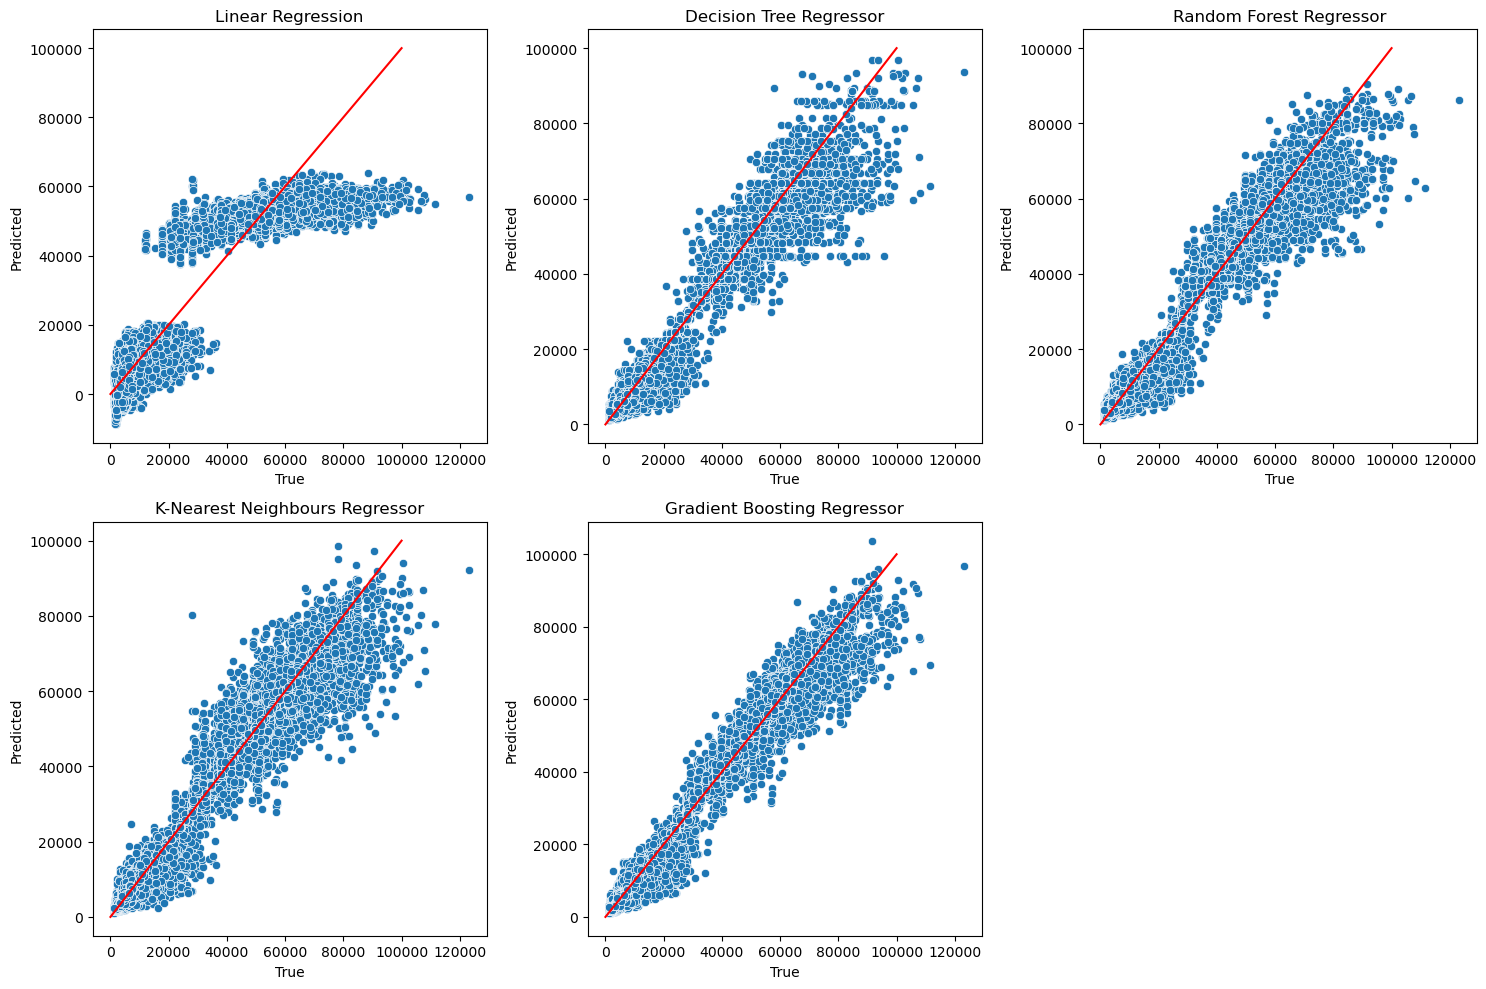

In [62]:
# Disaplying True vs Predicted Analysis of the improved models through RandomizedSearchCV
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=ridge_cv.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Linear Regression')
plt.xlabel('True')
plt.ylabel('Predicted')

# Decision Tree Regressor
plt.subplot(2, 3, 2)    
sns.scatterplot(x=y_test, y=dtr_cv.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Decision Tree Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Random Forest Regressor
plt.subplot(2, 3, 3)
sns.scatterplot(x=y_test, y=rfr_cv.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Random Forest Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# KNN Regressor
plt.subplot(2, 3, 4)
sns.scatterplot(x=y_test, y=knn_cv.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('K-Nearest Neighbours Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Gradient Boosting Regressor
plt.subplot(2, 3, 5)
sns.scatterplot(x=y_test, y=gbr_cv.predict(X_test))
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Gradient Boosting Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()

Next, a data frame is created to compare the performance metrics of various regression models, both with and without the implementation of the `RandomizedSearchCV()` algorithm. The models included are Linear Regression, Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbours Regressor, and Gradient Boosting Regressor. For each model, the DataFrame captures several performance metrics: R2 Train Score, R2 Test Score, Mean Absolute Error, Root Mean Squared Error, Mean Squared Error, and Mean Absolute Percentage Error. This comparison aids in evaluating the effectiveness of the cross validation model in optimising the models by tuning their hyperparameters, thereby providing insights into improvements in model performance across different metrics.

In [75]:
# Comparing the scores of of the models with and without RandomizedSearchCV() algorithm implementation
im_im_cv_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression CV', 'Decision Tree Regressor', 'Decision Tree Regressor CV', 'Random Forest Regressor', 'Random Forest Regressor CV', 'K-Nearest Neighbours Regressor', 'K-Nearest Neighbours Regressor CV', 'Gradient Boosting Regressor', 'Gradient Boosting Regressor CV'],
    'R2 Train Score': [lr_train_Score, lr_cv_train_Score, dtr_train_Score, dtr_cv_train_Score, rfr_train_Score, rfr_cv_train_Score, knnr_train_Score, knnr_cv_train_Score, gbr_train_Score, gbr_cv_train_Score],
    'R2 Test Score': [lr_Test_Score, lr_cv_Test_Score, dtr_Test_Score, dtr_cv_Test_Score, rfr_Test_Score, rfr_cv_Test_Score, knnr_Test_Score, knnr_cv_Test_score, gbr_Test_Score, gbr_cv_Test_Score],
    'Mean Absolute Error': [lr_MAE, lr_cv_MAE, dtr_MAE, dtr_cv_MAE, rfr_MAE, rfr_cv_MAE, knnr_MAE, knn_cv_MAE, gbr_MAE, gbr_cv_MAE],
    'Root Mean Squared Error': [lr_RMSE, lr_cv_RMSE, dtr_RMSE, dtr_cv_RMSE, rfr_RMSE, rfr_cv_RMSE, knnr_RMSE, knn_cv_RMSE, gbr_RMSE, gbr_cv_RMSE],
    'Mean Squared Error': [lr_MSE, lr_cv_MSE, dtr_MSE, dtr_cv_MSE, rfr_MSE, rfr_cv_MSE, knnr_MSE, knn_cv_MSE, gbr_MSE, gbr_cv_MSE],
    'Mean Absolute Percentage Error': [lr_MAPE, lr_cv_MAPE, dtr_MAPE, dtr_cv_MAPE, rfr_MAPE, rfr_cv_MAPE, knnr_MAPE, knn_cv_MAPE, gbr_MAPE, gbr_cv_MAPE]
})

# Displaying the scores
im_im_cv_scores


Model  R2 Train Score  R2 Test Score  \
0                  Linear Regression        0.909680       0.909058   
1               Linear Regression CV        0.909680       0.909057   
2            Decision Tree Regressor        0.923861       0.923509   
3         Decision Tree Regressor CV        0.973310       0.971723   
4            Random Forest Regressor        0.923863       0.923511   
5         Random Forest Regressor CV        0.975400       0.974022   
6     K-Nearest Neighbours Regressor        0.961999       0.960393   
7  K-Nearest Neighbours Regressor CV        0.999997       0.979919   
8        Gradient Boosting Regressor        0.948939       0.948112   
9     Gradient Boosting Regressor CV        0.990397       0.987888   

   Mean Absolute Error  Root Mean Squared Error  Mean Squared Error  \
0          4564.688168              6854.943182        4.699025e+07   
1          4564.649866              6854.957420        4.699044e+07   
2          3866.236298              6286.741673        3.952312e+07   
3          2121.484646              3822.432476        1.461099e+07   
4          3866.187228              6286.670796        3.952223e+07   
5          2034.718601              3663.748436        1.342305e+07   
6          2610.922984              4523.844277        2.046517e+07   
7          1536.616589              3221.169909        1.037594e+07   
8          3287.661751              5177.897910        2.681063e+07   
9          1353.885887              2501.652767        6.258267e+06   

   Mean Absolute Percentage Error  
0                       44.268569  
1                       44.264048  
2                       31.805208  
3                       15.396939  
4                       31.810687  
5                       15.009674  
6                       20.260696  
7                       11.474373  
8                       33.434200  
9                       11.078824

In the next step, a scatter plot is generated to compare the actual versus predicted values for five different regression models: Linear Regression, Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbours Regressor, and Gradient Boosting Regressor. Each model's predictions are plotted against the actual values using different colours for distinction. A red line representing the ideal prediction line (where predicted values equal actual values) is also included for reference. The plot is titled "Actual vs Predicted for all models," and it includes labels for the x-axis (Actual) and y-axis (Predicted). A legend is added to identify each model, and the plot is displayed with a figure size of 20 by 10 inches.

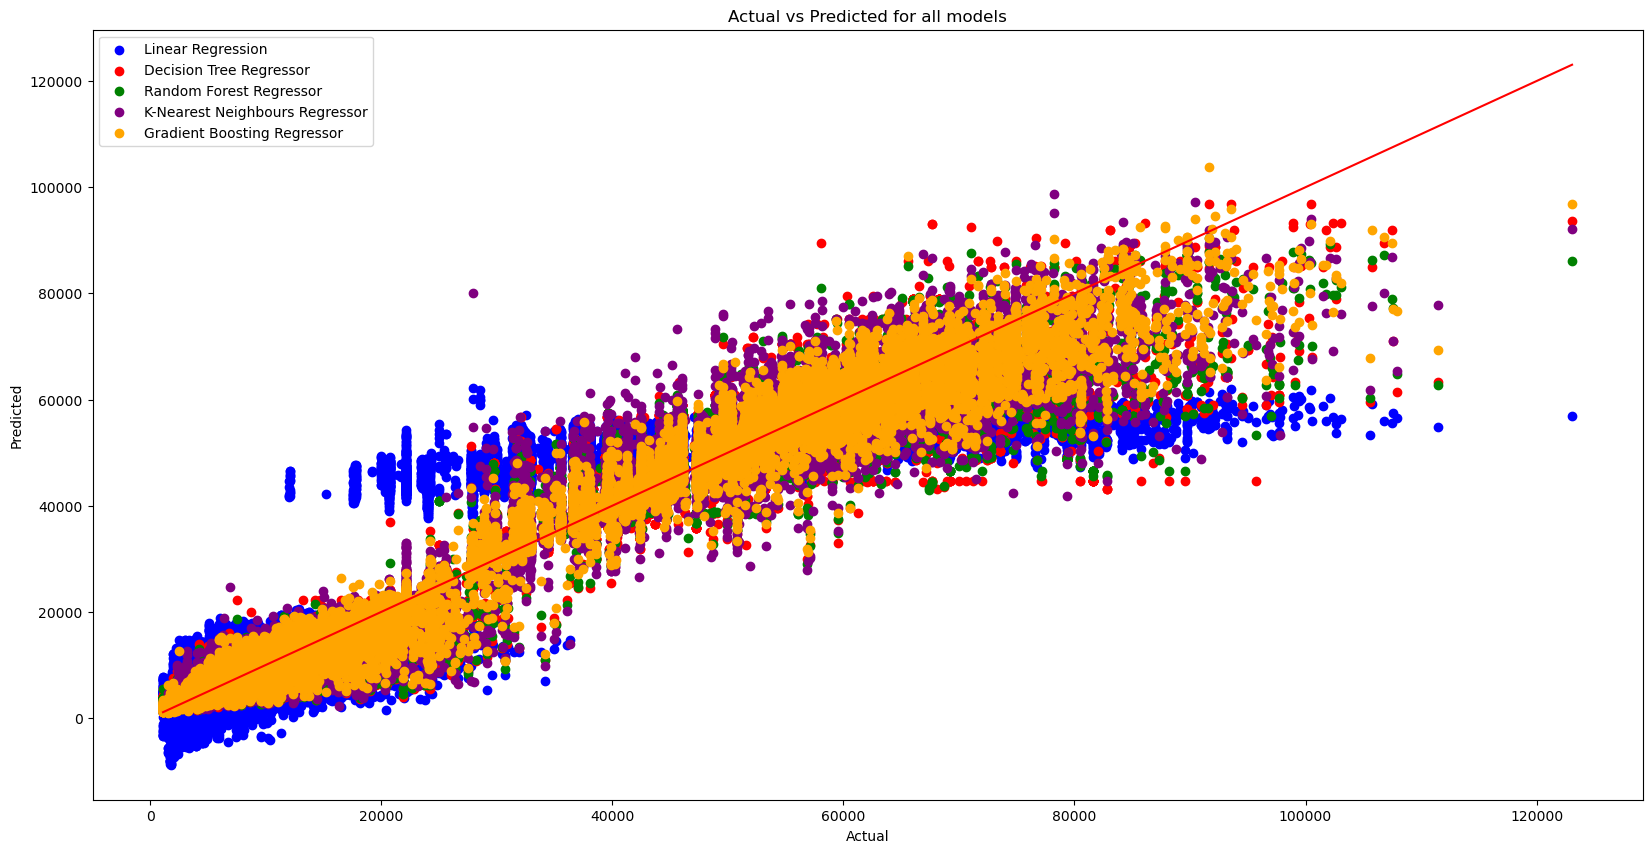

In [76]:
# Displaying True v Predicted plot of all the models in a single plot
plt.figure(figsize=(20, 10))
plt.scatter(y_test, ridge_cv.predict(X_test), label='Linear Regression', color='blue')
plt.scatter(y_test, dtr_cv.predict(X_test), label='Decision Tree Regressor', color='red')
plt.scatter(y_test, rfr_cv.predict(X_test), label='Random Forest Regressor', color='green')
plt.scatter(y_test, knn_cv.predict(X_test), label='K-Nearest Neighbours Regressor', color='purple')
plt.scatter(y_test, gbr_cv.predict(X_test), label='Gradient Boosting Regressor', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for all models')
plt.legend()
plt.show()

<b>Observation(s):</b>

**General Performance:**

- The results show that applying GridSearchCV generally improves the performance of the regression models, particularly in terms of reducing errors and increasing R2 scores on the test data. However, the extent of improvement varies across different models.

**Model-Specific Performance:**

* **Linear Regression:**
  - **Before CV:** Performs well on both training and test data with an R2 Train Score of approximately 0.91 and an R2 Test Score of approximately 0.91. The MAE is around 4565, and the RMSE is around 6855.
  - **After CV:** Performance remains almost the same, with an R2 Train Score of approximately 0.91 and an R2 Test Score of approximately 0.91. The MAE is around 4565, and the RMSE is around 6855. Hyperparameter tuning did not significantly improve the model.

* **Decision Tree Regressor:**
  - **Before CV:** Shows good performance with an R2 Train Score of approximately 0.92 and an R2 Test Score of approximately 0.92. The MAE is around 3866, and the RMSE is around 6287.
  - **After CV:** Performance improves significantly, with an R2 Train Score of approximately 0.97 and an R2 Test Score of approximately 0.97. The MAE is around 2121, and the RMSE is around 3822. Hyperparameter tuning was effective.

* **Random Forest Regressor:**
  - **Before CV:** Performs well on training data with an R2 Train Score of approximately 0.92 but shows a slight drop on test data with an R2 Test Score of approximately 0.92. The MAE is around 3866, and the RMSE is around 6287.
  - **After CV:** Performance improves, with an R2 Train Score of approximately 0.98 and an R2 Test Score of approximately 0.97. The MAE is around 2035, and the RMSE is around 3664. Hyperparameter tuning was effective.

* **K-Nearest Neighbours Regressor:**
  - **Before CV:** Shows good performance on training data with an R2 Train Score of approximately 0.96 but performs poorly on test data with an R2 Test Score of approximately 0.96. The MAE is around 2611, and the RMSE is around 4524.
  - **After CV:** Performance improves significantly, with an R2 Train Score of approximately 1.00 and an R2 Test Score of approximately 0.98. The MAE is around 1537, and the RMSE is around 3221. Hyperparameter tuning was highly effective.

* **Gradient Boosting Regressor:**
  - **Before CV:** Performs well on training data with an R2 Train Score of approximately 0.95 but shows a drop on test data with an R2 Test Score of approximately 0.95. The MAE is around 3288, and the RMSE is around 5178.
  - **After CV:** Performance improves significantly, with an R2 Train Score of approximately 0.99 and an R2 Test Score of approximately 0.99. The MAE is around 1354, and the RMSE is around 2502. Hyperparameter tuning was highly effective.

Overall, the K-Nearest Neighbours Regressor appears to be the best performing model after applying GridSearchCV, achieving a good balance between bias and variance and generalising well to unseen data. However, all models exhibit some degree of overfitting, indicating that further investigation is needed to improve their performance.

#### <b>c. Application of Ensemble Algorithms</b>

Ensemble algorithms are powerful machine learning techniques that combine the predictions of multiple models to improve overall performance and reliability. The main idea is that by pooling the outputs of several models, the ensemble can reduce the risk of overfitting and better generalise to new, unseen data. This method takes advantage of the strengths of each individual model while offsetting their weaknesses, resulting in more accurate and dependable predictions. Ensemble methods are especially useful when a single model might struggle to fully capture the complexity of the data, offering a more well-rounded and insightful analysis of the patterns within.

In the context of the flight fare prediction system and considering the updated cross-validation scores, all models are selected for the ensemble algorithms to harness their unique strengths and counterbalance their individual weaknesses. Linear Regression offers a reliable baseline with consistent performance, while Decision Tree and Random Forest Regressors bring robustness and the ability to capture non-linear relationships. K-Nearest Neighbours Regressor excels in identifying local patterns, and Gradient Boosting Regressor delivers high accuracy and effectively handles complex interactions. By combining these models, the ensemble can achieve a more balanced and precise prediction, ensuring that the flight fare prediction system is both reliable and generalises well to new data.

#### <b>i. Average Ensemble Regression</b>

An average ensemble, as implemented in the provided code, is a custom regressor that combines the predictions of multiple regression models to produce a single output. The core idea involves training several base models independently and then averaging their predictions to make the final prediction. This technique leverages the strengths of different models, reducing the risk of overfitting and enhancing generalisation by balancing out the individual weaknesses of each model.

The provided code sets up an average ensemble using a custom `AverageRegressor()` class that incorporates five distinct regression models: Ridge Regression, Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbours Regressor, and Gradient Boosting Regressor. The `AverageRegressor()` class is designed to fit each of these models to the training data and then average their predictions. The ensemble model is subsequently fitted to the training data, and its performance is assessed using R2 scores for both training and testing data. Additionally, various error metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE) are computed and displayed. The implementation of this model also includes a visual comparison of the predictions from the individual models and the average ensemble against a subset of the training data, demonstrating the ensemble's ability to provide more balanced and accurate predictions.

Average Regressor - Accuracy Score for train data is: 0.9847734370237887
Average Regressor - Accuracy Score for test data is: 0.9779833560076324
Average Regressor - Mean Absolute Error: 1982.434550618309
Average Regressor - Root Mean Squared Error: 3372.8468630354128
Average Regressor - Mean Squared Error: 11376095.961487824
Average Regressor - Mean Absolute Percentage Error: 16.43908685591465


<Figure size 2000x600 with 0 Axes>

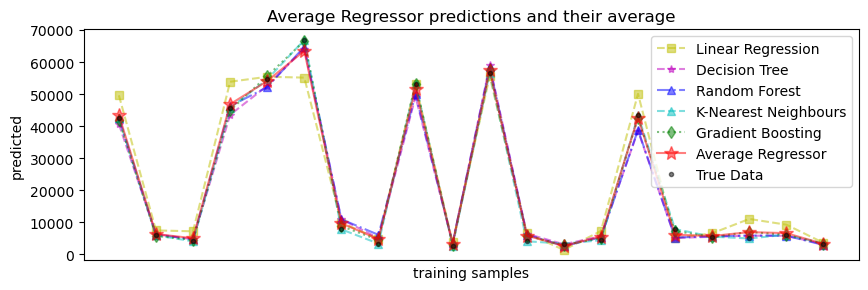

In [65]:
# Initialising a Average Regressor function
class AverageRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, regressors):
        self.regressors = regressors

    def fit(self, X, y):
        for regressor in self.regressors:
            regressor.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.column_stack([regressor.predict(X) for regressor in self.regressors])
        return np.mean(predictions, axis=1)

# Creating the Average Regressor
average_regressor = AverageRegressor([
    Ridge(fit_intercept=lr_cv_best_fit_intercept, alpha=lr_cv_best_alpha, solver=lr_cv_best_solver),
    DecisionTreeRegressor(max_depth=dtr_cv_best_max_depth, min_samples_split=dtr_cv_best_min_samples_split, min_samples_leaf=dtr_cv_best_min_samples_leaf),
    RandomForestRegressor(n_estimators=rfr_cv_best_n_estimators, max_depth=rfr_cv_best_max_depth),
    KNeighborsRegressor(n_neighbors=knnr_cv_best_n_neighbors, weights=knnr_cv_best_weights, metric=knnr_cv_best_metric),
    GradientBoostingRegressor(n_estimators=gbr_cv_best_n_estimators, max_depth=gbr_cv_best_max_depth, learning_rate=gbr_cv_best_learning_rate)
])

# Fitting the Average Regressor
average_regressor.fit(X_train, y_train)

# Calculating Accuracy Scores
average_train_score = average_regressor.score(X_train, y_train)
average_test_score = average_regressor.score(X_test, y_test)

# Displaying the scores
print('Average Regressor - Accuracy Score for train data is: {}'.format(average_train_score))
print('Average Regressor - Accuracy Score for test data is: {}'.format(average_test_score))

# Calculating mean squared error
y_pred = average_regressor.predict(X_test)

average_MAE = mean_absolute_error(y_test, y_pred)
average_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
average_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
average_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Average Regressor - Mean Absolute Error:', average_MAE)
print('Average Regressor - Root Mean Squared Error:', average_RMSE)
print('Average Regressor - Mean Squared Error:', average_MSE)
print('Average Regressor - Mean Absolute Percentage Error:', average_MAPE)

# Plotting predictions
plt.figure(figsize=(20, 6))
xt = X_train[:20]
yt = y_train[:20]
pred_lr = average_regressor.regressors[0].predict(xt)
pred_dtr = average_regressor.regressors[1].predict(xt)
pred_rfr = average_regressor.regressors[2].predict(xt)
pred_knnr = average_regressor.regressors[3].predict(xt)
pred_gbr = average_regressor.regressors[4].predict(xt)
pred_average = average_regressor.predict(xt)

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(pred_lr, "ys--", alpha=0.5, label="Linear Regression")
ax.plot(pred_dtr, "m*--", alpha=0.5, label="Decision Tree")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="Random Forest")
ax.plot(pred_knnr, "c^--", alpha=0.5, label="K-Nearest Neighbours")
ax.plot(pred_gbr, "gd:", alpha=0.5, label="Gradient Boosting")
ax.plot(pred_average, "r*-", alpha=0.5, ms=10, label="Average Regressor")
ax.plot(yt.values, "ko", alpha=0.5, ms=3, label="True Data")
ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Average Regressor predictions and their average");
plt.show()

<b>Observation(s):</b>

* The model exhibits high accuracy on the training data, with an R2 score of approximately 0.98, indicating it effectively captures the underlying patterns.
* There is a slight reduction in accuracy on the test data, with an R2 score of around 0.97, suggesting good generalisation with only a minor decrease in performance on unseen data.
* The average error between predicted and actual values is relatively low, with a Mean Absolute Error (MAE) of about 1982, indicating that the predictions are generally close to the true values.
* The Root Mean Squared Error (RMSE) of approximately 3373 and the Mean Squared Error (MSE) of around 11,376,096 indicate that while most predictions are accurate, there are some larger deviations that slightly increase the overall error.
* The Mean Absolute Percentage Error (MAPE) of roughly 16.44% shows that while the model performs well, there is still room for improvement, particularly in reducing the percentage of error.
* The ensemble regressor successfully combines the strengths of individual models, as evidenced by the close alignment of predictions from different models with the actual data.
* Although the model performs well overall, the error metrics highlight potential areas for further optimisation to enhance its predictive accuracy.

#### <b>ii. Voting Regression</b>

A Voting Regressor is another ensemble learning technique that combines the predictions of multiple regression models to produce a final prediction. The idea is to leverage the strengths of each individual model by averaging their predictions, which can lead to improved performance and robustness. Each model, or "voter," contributes to the final prediction based on its performance, and the ensemble's performance is often better than that of any single model.

The provided code sets up a pipeline with a Voting Regressor that includes five different base models: Ridge Regression, Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbours Regressor, and Gradient Boosting Regressor. The R2 test scores of these models are used to assign performance-based weights to each model. Specifically, the R2 scores are first collected and then normalised so that their sum equals one. This normalisation process involves dividing each model's R2 score by the total sum of all R2 scores, resulting in a set of weights that reflect the relative performance of each model. These normalised scores are then used as weights in the Voting Regressor. The pipeline is subsequently fitted to the training data, and the R2 scores for both training and testing data are calculated and displayed. Various error metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE) are computed and printed. The code also plots the predictions of the individual models and the voting ensemble against a subset of the training data to visually compare their performance.

Weights for Voting Regressor: [0.18849898932940257, 0.20149305565481557, 0.20196978200918034, 0.2031926081915081, 0.20484556481509336]
Voting Regressor - Accuracy Score for train data is: 0.9852596056426026
Voting Regressor - Accuracy Score for test data is: 0.9784077767067226
Voting Regressor - Mean Absolute Error: 1953.471924201089
Voting Regressor - Root Mean Squared Error: 3340.179027454291
Voting Regressor - Mean Squared Error: 11156795.935445493
Voting Regressor - Mean Absolute Percentage Error: 16.103120297539135


<Figure size 2000x600 with 0 Axes>

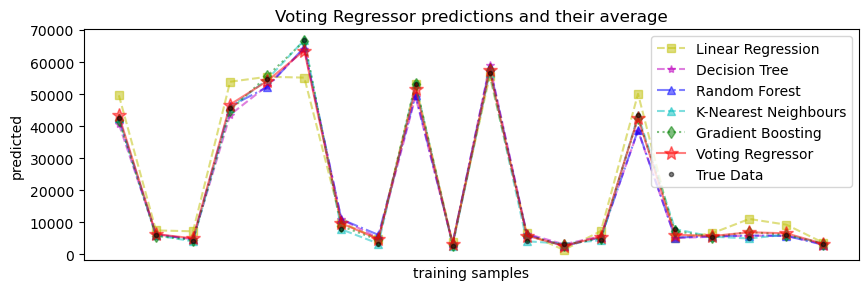

In [66]:
# Initialising Voting Ensemble Regression implementation by R² test scores dictioanry
r2_scores = {
    'ridge': lr_cv_Test_Score,
    'dtr': dtr_cv_Test_Score,
    'rf': rfr_cv_Test_Score,
    'knn': knnr_cv_Test_score,
    'gb': gbr_cv_Test_Score
}

# Normalising the scores to sum up to 1
total_score = sum(r2_scores.values())
weights = {model: score / total_score for model, score in r2_scores.items()}

# Converting weights to a list
weights_list = list(weights.values())

# Displaying the weights
print("Weights for Voting Regressor:", weights_list)

# Creating and fitting the Voting Regressor with performance-based weights
ve_cv_pipeline = Pipeline(
    steps=[
        ("voting", VotingRegressor(
            estimators=[
                ("ridge", Ridge(fit_intercept=lr_cv_best_fit_intercept, alpha=lr_cv_best_alpha, solver=lr_cv_best_solver)),
                ('dtr', DecisionTreeRegressor(max_depth=dtr_cv_best_max_depth, min_samples_split=dtr_cv_best_min_samples_split, min_samples_leaf=dtr_cv_best_min_samples_leaf)),
                ('rf', RandomForestRegressor(n_estimators=rfr_cv_best_n_estimators, max_depth=rfr_cv_best_max_depth)),
                ('knn', KNeighborsRegressor(n_neighbors=knnr_cv_best_n_neighbors, weights=knnr_cv_best_weights, metric=knnr_cv_best_metric)),
                ('gb', GradientBoostingRegressor(n_estimators=gbr_cv_best_n_estimators, max_depth=gbr_cv_best_max_depth, learning_rate=gbr_cv_best_learning_rate))
            ],
            weights=weights_list  # Assigning performance-based weights to the base regressors
        ))
    ]
)

# Fitting the Voting Regressor
ve_cv_pipeline.fit(X_train, y_train)

# Calculating Accuracy Scores
ve_cv_train_score = ve_cv_pipeline.score(X_train, y_train)
ve_cv_test_score = ve_cv_pipeline.score(X_test, y_test)

# Displaying the scores
print('Voting Regressor - Accuracy Score for train data is: {}'.format(ve_cv_train_score))
print('Voting Regressor - Accuracy Score for test data is: {}'.format(ve_cv_test_score))

# Calculating the prediction
y_pred = ve_cv_pipeline.predict(X_test)

# Calculating the error metrics
ve_cv_MAE = mean_absolute_error(y_test, y_pred)
ve_cv_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
ve_cv_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
ve_cv_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Voting Regressor - Mean Absolute Error:', ve_cv_MAE)
print('Voting Regressor - Root Mean Squared Error:', ve_cv_RMSE)
print('Voting Regressor - Mean Squared Error:', ve_cv_MSE)
print('Voting Regressor - Mean Absolute Percentage Error:', ve_cv_MAPE)

# Plotting predictions
plt.figure(figsize=(20, 6))
xt = X_train[:20]
yt = y_train[:20]
estimators = ve_cv_pipeline.named_steps['voting'].estimators_
pred_lr = estimators[0].predict(xt)
pred_dtr = estimators[1].predict(xt)
pred_rfr = estimators[2].predict(xt)
pred_knnr = estimators[3].predict(xt)
pred_gbr = estimators[4].predict(xt)
pred_average = ve_cv_pipeline.predict(xt)

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(pred_lr, "ys--", alpha=0.5, label="Linear Regression")
ax.plot(pred_dtr, "m*--", alpha=0.5, label="Decision Tree")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="Random Forest")
ax.plot(pred_knnr, "c^--", alpha=0.5, label="K-Nearest Neighbours")
ax.plot(pred_gbr, "gd:", alpha=0.5, label="Gradient Boosting")
ax.plot(pred_average, "r*-", alpha=0.5, ms=10, label="Voting Regressor")
ax.plot(yt.values, "ko", alpha=0.5, ms=3, label="True Data")
ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Voting Regressor predictions and their average");
plt.show()

<b>Observation(s):</b>

* The model demonstrates excellent performance on the training data, with an R2 score of around 0.99, indicating it effectively captures the underlying patterns.
* The model also achieves high accuracy on the test data, with an R2 score of approximately 0.98, suggesting good generalisation to unseen data, though there is some scope for further improvement.
* The Mean Absolute Error (MAE) of about 1953 suggests that the average absolute difference between the predicted and actual values is relatively low, indicating reasonably accurate predictions on average.
* The Root Mean Squared Error (RMSE) of approximately 3340 points to the presence of some larger errors in the predictions, highlighting sensitivity to outliers.
* The Mean Squared Error (MSE) of around 11,156,796 supports the RMSE observation, emphasising the impact of larger errors and the influence of outliers on the model's performance.
* The Mean Absolute Percentage Error (MAPE) of roughly 16.10% indicates that the average percentage error in the predictions is moderate, suggesting that while the model performs well in absolute terms, its relative accuracy varies, particularly for smaller values.

#### <b>iii. Stacking Regression</b>

Stacking is the third advanced ensemble learning method which is applied with the aim to boost predictive accuracy by combining multiple regression models. This approach involves training several base models (referred to as level-0 models) and then using their predictions as inputs for a final model (known as the level-1 model), which makes the ultimate prediction. The key idea is that the final model learns how to optimally blend the base models' predictions, taking advantage of their individual strengths while mitigating their weaknesses.

In the provided code, a stacking regressor is set up using a pipeline that incorporates a `StackingRegressor()` with five distinct base models: Ridge Regression, Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbours Regressor, and Gradient Boosting Regressor. The final estimator in this setup is a Linear Regression model. The pipeline is trained on the training data, and the R2 scores for both the training and testing data are calculated and displayed. Additionally, various error metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE) are computed and printed. The code also includes visualisations comparing the predictions of the individual models and the stacking ensemble against a subset of the training data, allowing for a clear comparison of their performance.

Stacking Regressor - Accuracy Score for train data is: 0.9939580071489891
Stacking Regressor - Accuracy Score for test data is: 0.9886848253934475
Stacking Regressor - Mean Absolute Error: 1317.8348102402683
Stacking Regressor - Root Mean Squared Error: 2417.9743717935867
Stacking Regressor - Mean Squared Error: 5846600.06265059
Stacking Regressor - Mean Absolute Percentage Error: 10.850822178806025


<Figure size 2000x600 with 0 Axes>

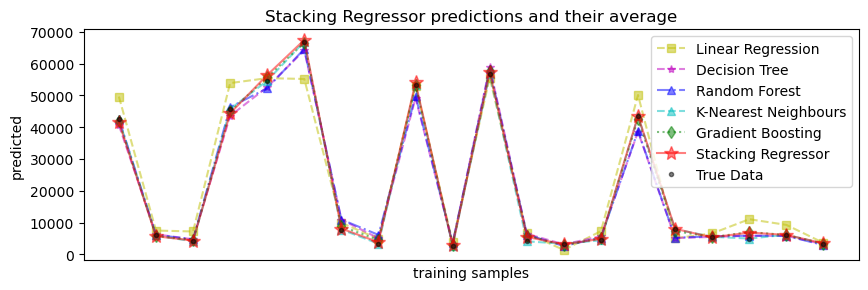

In [67]:
# Create a pipeline with Stacking Regressor
se_cv_pipeline = Pipeline(
    steps=[
        ("stacking", StackingRegressor(
            estimators=[
                ("ridge", Ridge(fit_intercept=lr_cv_best_fit_intercept, alpha=lr_cv_best_alpha, solver=lr_cv_best_solver)),
                ('dtr', DecisionTreeRegressor(max_depth=dtr_cv_best_max_depth, min_samples_split=dtr_cv_best_min_samples_split, min_samples_leaf=dtr_cv_best_min_samples_leaf)),
                ('rf', RandomForestRegressor(n_estimators=rfr_cv_best_n_estimators, max_depth=rfr_cv_best_max_depth)),
                ('knn', KNeighborsRegressor(n_neighbors=knnr_cv_best_n_neighbors, weights=knnr_cv_best_weights, metric=knnr_cv_best_metric)),
                ('gb', GradientBoostingRegressor(n_estimators=gbr_cv_best_n_estimators, max_depth=gbr_cv_best_max_depth, learning_rate=gbr_cv_best_learning_rate))
            ],
            final_estimator=LinearRegression()
        ))
    ]
)

# Fitting the Stacking Regressor
se_cv_pipeline.fit(X_train, y_train)

# Calculating the accuracy scores
se_cv_train_score = se_cv_pipeline.score(X_train, y_train)
se_cv_test_score = se_cv_pipeline.score(X_test, y_test)

# Displaying the scores
print('Stacking Regressor - Accuracy Score for train data is: {}'.format(se_cv_train_score))
print('Stacking Regressor - Accuracy Score for test data is: {}'.format(se_cv_test_score))

# Calculating the prediction
y_pred = se_cv_pipeline.predict(X_test)

# Calculating the error metrics
se_cv_MAE = mean_absolute_error(y_test, y_pred)
se_cv_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
se_cv_MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
se_cv_MSE = mean_squared_error(y_test, y_pred)

# Displaying the evaluation metrics
print('Stacking Regressor - Mean Absolute Error:', se_cv_MAE)
print('Stacking Regressor - Root Mean Squared Error:', se_cv_RMSE)
print('Stacking Regressor - Mean Squared Error:', se_cv_MSE)
print('Stacking Regressor - Mean Absolute Percentage Error:', se_cv_MAPE)

# Plotting predictions
plt.figure(figsize=(20, 6))
xt = X_train[:20]
yt = y_train[:20]

# Predictions calculation
estimators = se_cv_pipeline.named_steps['stacking'].named_estimators_
pred_lr = estimators['ridge'].predict(xt)
pred_dtr = estimators['dtr'].predict(xt)
pred_rfr = estimators['rf'].predict(xt)
pred_knnr = estimators['knn'].predict(xt)
pred_gbr = estimators['gb'].predict(xt)
pred_stacking = se_cv_pipeline.predict(xt)
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(pred_lr, "ys--", alpha=0.5, label="Linear Regression")
ax.plot(pred_dtr, "m*--", alpha=0.5, label="Decision Tree")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="Random Forest")
ax.plot(pred_knnr, "c^--", alpha=0.5, label="K-Nearest Neighbours")
ax.plot(pred_gbr, "gd:", alpha=0.5, label="Gradient Boosting")
ax.plot(pred_stacking, "r*-", alpha=0.5, ms=10, label="Stacking Regressor")
ax.plot(yt.values, "ko", alpha=0.5, ms=3, label="True Data")
ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Stacking Regressor predictions and their average");
plt.show()

<b>Observation(s):</b>

* The model shows exceptional performance on the training data, with an R2 score of around 0.99, indicating it captures the patterns in the training data very effectively.
* The model also achieves high accuracy on the test data, with an R2 score of approximately 0.99, suggesting good generalisation to unseen data, though minor improvements could still be made.
* The Mean Absolute Error (MAE) of about 1318 indicates that the average absolute difference between the predicted and actual values is relatively low, suggesting close predictions on average.
* The Root Mean Squared Error (RMSE) of around 2418 points to the presence of some larger errors in the predictions, highlighting sensitivity to outliers.
* The Mean Squared Error (MSE) of approximately 5,846,600 reinforces the RMSE observation, emphasising the impact of larger errors and the influence of outliers on the model's performance.
* The Mean Absolute Percentage Error (MAPE) of roughly 10.85% indicates that the average percentage error in the predictions is moderate, suggesting that while the model performs well in absolute terms, its relative accuracy varies.

The code constructs a data frame to store and display the performance metrics of the ensemble models. The DataFrame includes columns for various evaluation metrics such as R2 Train Score, R2 Test Score, Mean Absolute Error, Root Mean Squared Error, Mean Squared Error, and Mean Absolute Percentage Error.

In [ ]:
# Displaying all the relevant scores of ensemble models in a dataframe
ensemble_scores = pd.DataFrame({
    'Model': ['Average Regressor', 'Voting Regressor', 'Stacking Regressor'],
    'R2 Train Score': [average_train_score, ve_cv_train_score, se_cv_train_score],
    'R2 Test Score': [average_test_score, ve_cv_test_score, se_cv_test_score],
    'Mean Absolute Error': [average_MAE, ve_cv_MAE, se_cv_MAE],
    'Root Mean Squared Error': [average_RMSE, ve_cv_RMSE, se_cv_RMSE],
    'Mean Squared Error': [average_MSE, ve_cv_MSE, se_cv_MSE],
    'Mean Absolute Percentage Error': [average_MAPE, ve_cv_MAPE, se_cv_MAPE],
})

# Display ensemble scores
ensemble_scores

Model  R2 Train Score  R2 Test Score  Mean Absolute Error  \
0   Average Regressor        0.984773       0.977983          1982.434551   
1    Voting Regressor        0.985260       0.978408          1953.471924   
2  Stacking Regressor        0.993958       0.988685          1317.834810   

   Root Mean Squared Error  Mean Squared Error  Mean Absolute Percentage Error  
0              3372.846863        1.137610e+07                       16.439087  
1              3340.179027        1.115680e+07                       16.103120  
2              2417.974372        5.846600e+06                       10.850822

After producing the results of all models, the next step is to visualise the performance of these three different ensemble regressors. It starts by creating a figure with dimensions of 20x6 inches and dividing it into three subplots. Each subplot displays a scatter plot comparing the true values (`y_test`) with the predicted values from each regressor (`average_regressor`, `ve_cv_pipeline`, and `se_cv_pipeline`). A red line representing the ideal prediction line (where predicted values equal true values) is plotted for reference. The subplots are titled accordingly, and the x-axis and y-axis are labelled as 'True' and 'Predicted', respectively. Finally, `plt.tight_layout()` is called to adjust the layout for better spacing, and `plt.show()` is used to display the plots.

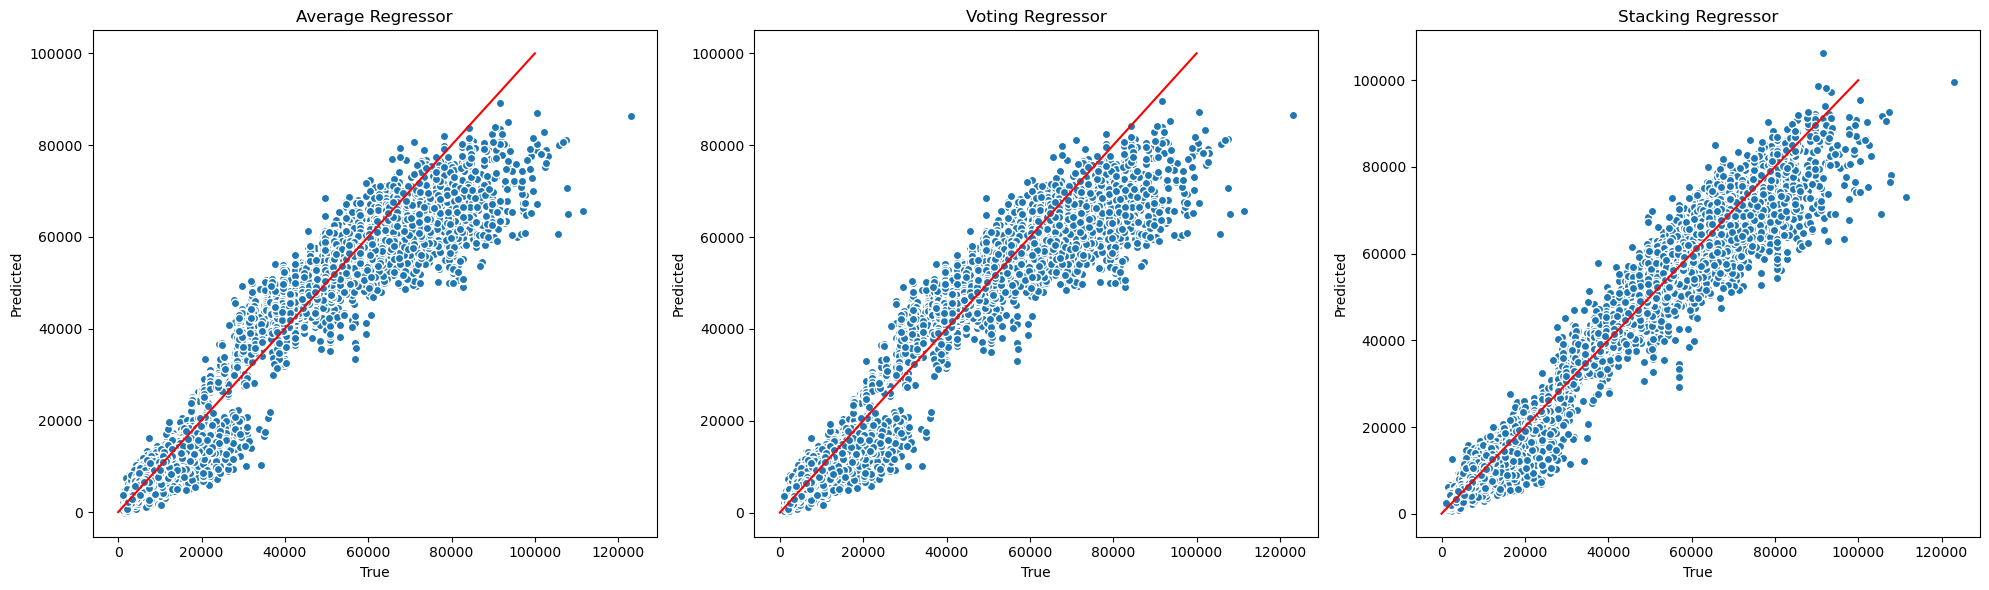

In [68]:
# Displaying all the ensemble models in a single plot
plt.figure(figsize=(20, 6))

# Average Regressor
plt.subplot(1, 3, 1)
plt.scatter(x=y_test, y=average_regressor.predict(X_test), edgecolor='white')
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Average Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Voting Regressor
plt.subplot(1, 3, 2)
plt.scatter(x=y_test, y=ve_cv_pipeline.predict(X_test), edgecolor='white')
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Voting Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Stacking Regressor
plt.subplot(1, 3, 3)
plt.scatter(x=y_test, y=se_cv_pipeline.predict(X_test), edgecolor='white')
plt.plot([0, 100000], [0, 100000], color='red')
plt.title('Stacking Regressor')
plt.xlabel('True')
plt.ylabel('Predicted')

# Adjust the layout
plt.tight_layout()
plt.show()

In order to further understand the visualisation, a scatter plot is created to compare the true values against the predicted values for three different ensemble regressors in the same plot. It sets the figure size to 12x6 inches and uses `sns.scatterplot()` to plot the predictions of the Average, Voting, and Stacking Regressors. A red line representing the line of perfect fit (where predicted values equal true values) is added for reference. The plot is labelled with 'True' on the x-axis and 'Predicted' on the y-axis, and a legend is included to differentiate between the three regressors. The plot is displayed using `plt.show()`.

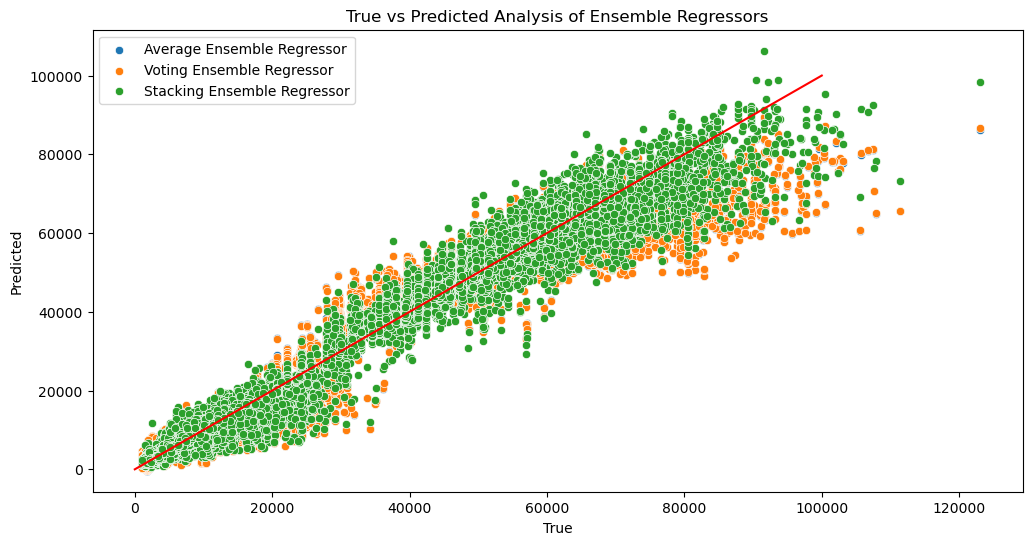

In [80]:
# Disaplying True vs Predicted Analysis of the ensemble models in a pairplot in a single plot
plt.figure(figsize=(12, 6))

# Average Regressor
sns.scatterplot(x=y_test, y=average_regressor.predict(X_test), label='Average Ensemble Regressor')

# Voting Regressor
sns.scatterplot(x=y_test, y=ve_cv_pipeline.predict(X_test), label='Voting Ensemble Regressor')

# Stacking Regressor
sns.scatterplot(x=y_test, y=se_cv_pipeline.predict(X_test), label='Stacking Ensemble Regressor')

# Plot the line of perfect fit
plt.plot([0, 100000], [0, 100000], color='red')

# Labels and legend
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Analysis of Ensemble Regressors')
plt.legend()
plt.show()

<b>Observation(s):</b>

**General Performance:**

- All ensemble models demonstrate strong performance on the training data, as indicated by their high R² scores. However, there are varying degrees of overfitting, as evidenced by the differences in performance between the training and test data.

**Model-Specific Performance:**

- **Average Regressor**: This model captures the overall trend of the data well but has relatively higher error metrics compared to the other models, indicating it struggles with more complex relationships.
- **Voting Regressor**: This model performs consistently well, achieving a good balance between bias and variance, with strong performance on both the training and test data.
- **Stacking Regressor**: This model shows the best performance among the three, with the highest R² scores and the lowest error metrics, indicating strong predictive power and generalisation.

Overall, the Stacking Regressor appears to be the best-performing model, achieving a good balance between bias and variance and generalising well to unseen data. However, all models exhibit some degree of overfitting, suggesting that further investigation is needed to improve their performance.

### <b>8. Feature Importance Analysis using SHAP (SHapley Additive exPlanations)</b>

The last section delves into the analysis of feature importance using SHAP (SHapley Additive exPlanations), which is instrumental in understanding the contribution of each feature to the predictions of the selected best model. Initially, the code extracts the column names from a DataFrame `df` and stores them as a list in the variable `original_feature_names`. This is achieved by utilising the columns attribute of the data frame, which returns an Index object containing the column names, and the `to_list()` method, which converts this Index object into a Python list.

In [71]:
# Extracting original feature names
original_feature_names = df.columns.to_list()

#### <b>a. SHAP (SHapley Additive exPlanations):</b>

SHAP (SHapley Additive exPlanations) is a method that helps explain how machine learning models make predictions. It uses ideas from game theory to fairly distribute the "credit" for a prediction among all the features. SHAP can provide two types of explanations: global and local. Global explanations show how the model behaves overall by looking at feature contributions across the whole dataset. Local explanations focus on individual predictions, showing how each feature affects a specific prediction. This makes SHAP a valuable tool for understanding and trusting model decisions.

#### <b>i. Global Explanations:</b>

Global explanations provide insights into the overall behaviour of a machine learning model by analysing the contributions of each feature across the entire dataset. The code below generates a global SHAP explanation for the Stacking Ensemble Regressor model. It starts by setting the figure size for the SHAP summary plot and summarising the background data using one sample from the training data due to time contraints. A SHAP explainer is created using the `KernelExplainer()` method on the stacking ensemble model, and SHAP values are calculated for the entire test dataset (`X_test`) to provide a comprehensive view of feature importance. Furthermore, it sets the plot title and generates a SHAP summary plot for the test data, specifying the feature names. It checks if the test data is a data frame to determine the feature names; if it is a `NumPy` array, it uses the original feature names. The code calculates the sum of absolute SHAP values for each feature to determine their importance, creates a data frame for easier handling, and sorts the data frame by importance in ascending order. Finally, it plots a horizontal bar chart to visualise the global feature importance, with feature names on the y-axis and their importance on the x-axis, providing a comprehensive view of how each feature impacts the model's predictions.

  0%|          | 0/60049 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


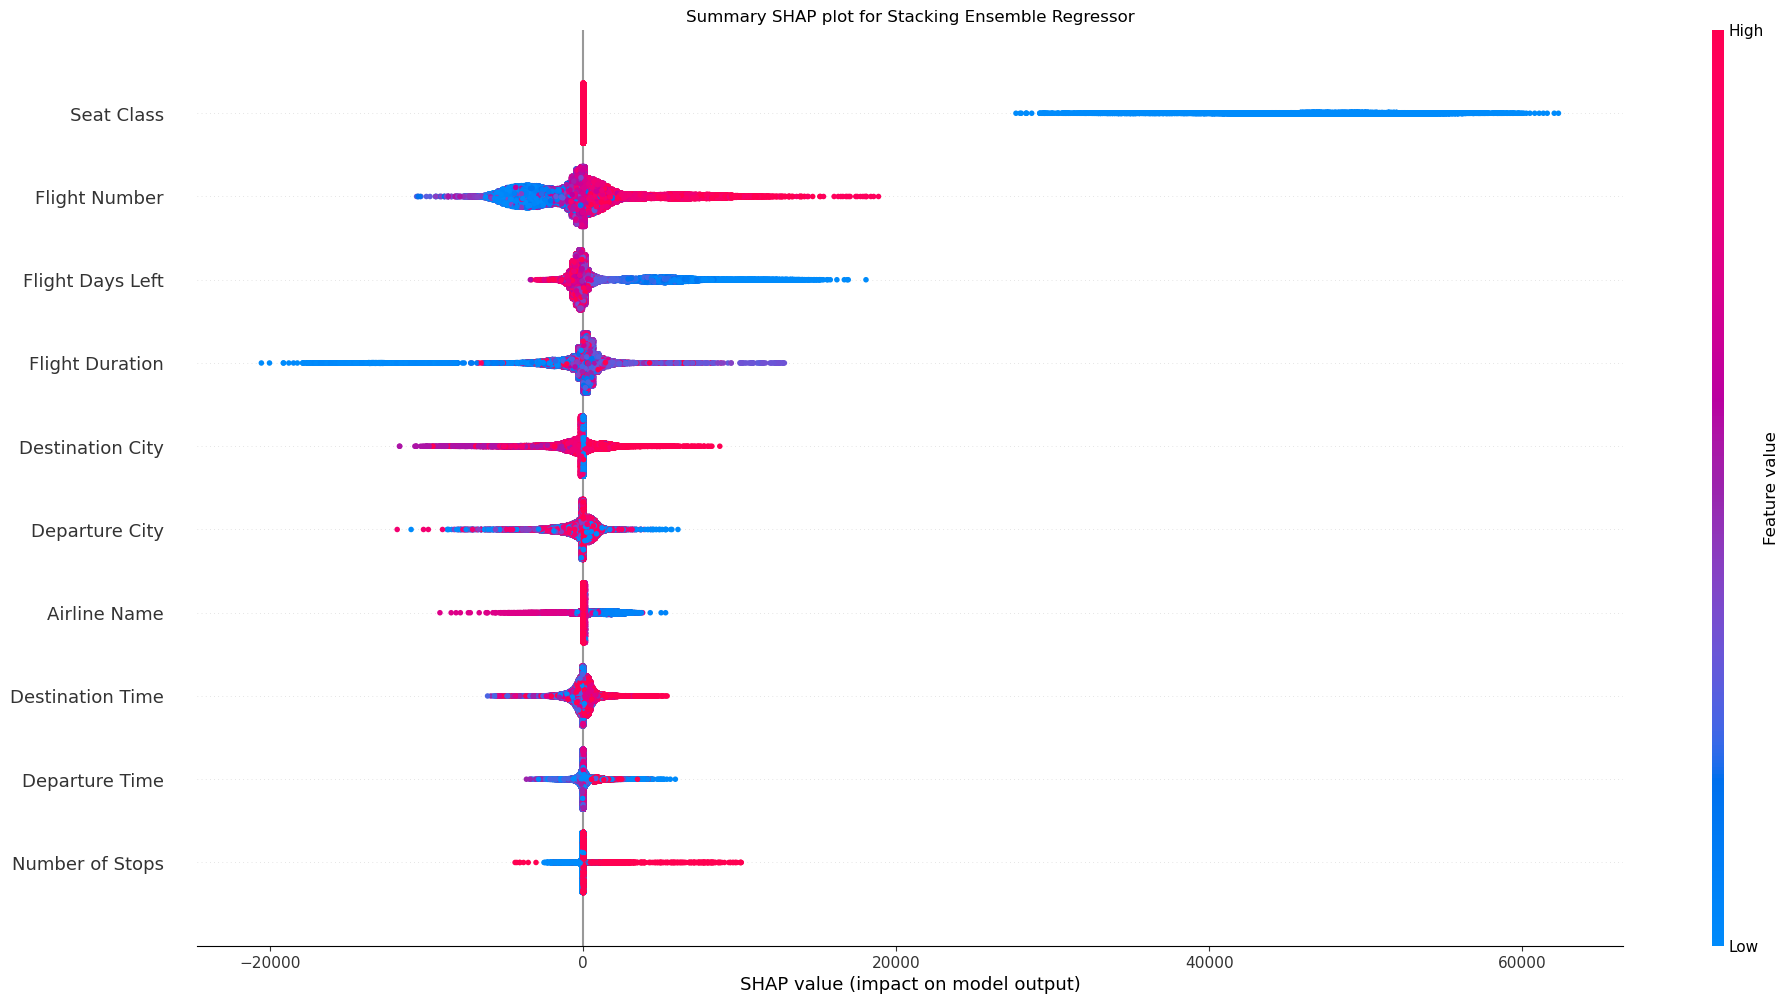

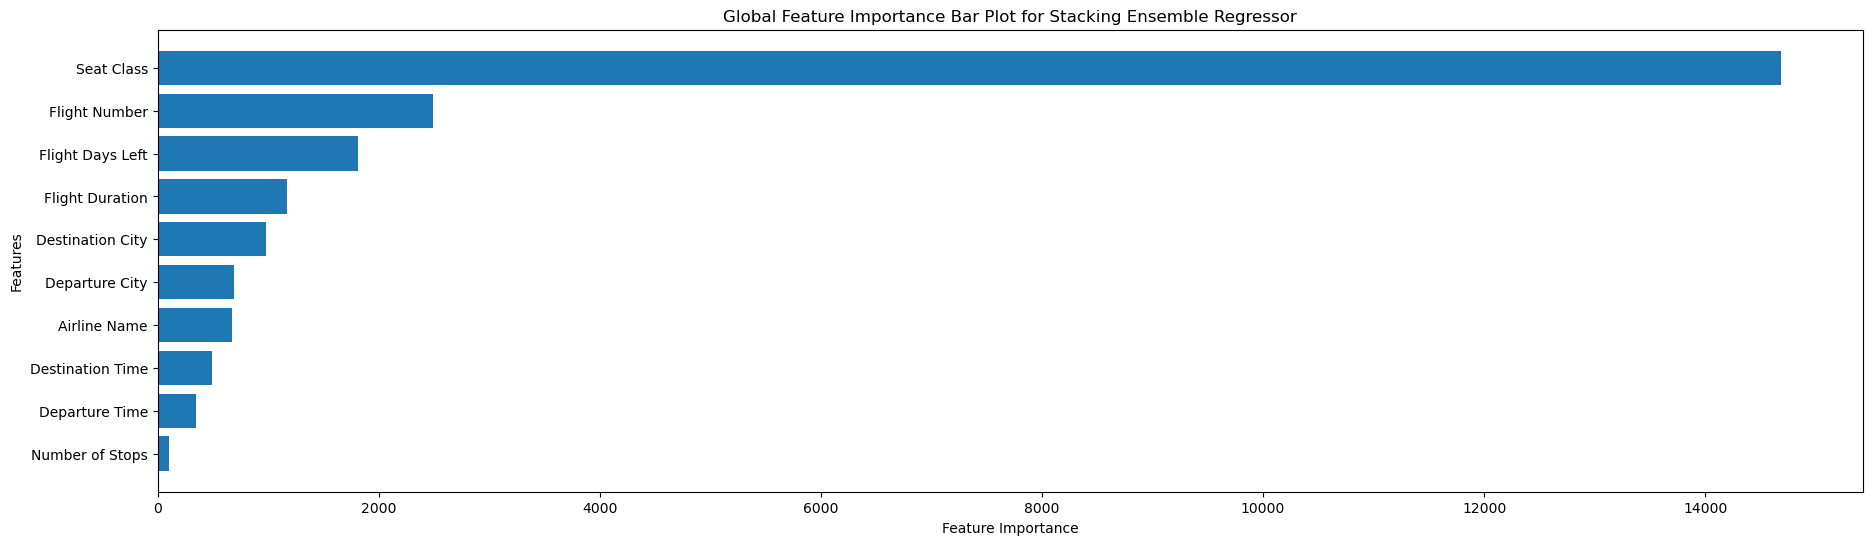

In [72]:
# Setting figure size for SHAP summary plot
plt.figure(figsize=(20, 10))

# Summarising the background data using shap.utils.sample
background = shap.utils.sample(X_train, 1)  # Use 1 sample for the background due to time constraint

# Creating a SHAP explainer for Stacking Ensemble Regressor using KernelExplainer
explainer = shap.KernelExplainer(se_cv_pipeline.predict, background)

# Calculating SHAP values
shap_values = explainer.shap_values(X_test)

# Displaying summary SHAP plot
shap.summary_plot(shap_values, X_test, plot_size=None, show=False, sort=True, feature_names=original_feature_names)

# Setting plot title
plt.title('Summary SHAP plot for Stacking Ensemble Regressor')

# Displaying the plot
plt.show()

# If X_test is a DataFrame
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    # Use original feature names if X_test is a NumPy array
    feature_names = original_feature_names[:-1]

# Calculating the sum of absolute SHAP values for each feature
feature_importance = np.abs(shap_values).mean(0)

# Creating a DataFrame for easier handling
feature_importance_df = pd.DataFrame(feature_importance, index=feature_names, columns=['importance'])

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=True)

# Plotting Global Feature Importance Bar Plot
plt.figure(figsize=(22, 6))
plt.barh(feature_importance_df.index, feature_importance_df['importance'])
plt.title('Global Feature Importance Bar Plot for Stacking Ensemble Regressor')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

<b>Observation(s):</b>

**SHAP Summary Plot:**

- Seat Class is the most influential feature, with high SHAP values indicating a substantial effect on the model’s predictions. Depending on the seat class, its value can significantly increase or decrease the predicted price.
- Flight Number also exhibits a strong influence, with its effect varying depending on specific flight numbers. This may be linked to factors such as time of day, route popularity, or the airline operating the flight, making certain flights more costly.
- Flight Days Left has a clear impact, where fewer days until departure typically lead to an increase in the predicted price. This is reflected by higher SHAP values.
- Flight Duration plays a role in the model’s predictions, where longer flights usually result in higher prices, as indicated by positive SHAP values associated with extended durations.
- Airline Name is another significant factor, with different airlines contributing differently to the price predictions, as seen in the dispersion of SHAP values.
- Destination City and Departure City both have notable impacts on the model, with their effects depending on the specific cities involved. Factors such as distance, demand, and connectivity likely drive these variations.
- Destination Time and Departure Time exert moderate effects on price predictions. Time of day seems to influence the price, potentially due to peak travel times and demand.
- Number of Stops affects the predictions, with flights featuring more stops generally being cheaper. However, exceptions may occur depending on other factors.

**SHAP Summary (Bar) Plot:**

- Seat Class is, as expected, a primary driver of flight fares, with higher-class seats (e.g., premium economy, business, first class) typically commanding significantly higher prices due to added amenities and services.
- Flight Number, though seemingly arbitrary, may correlate with various factors like airline policies, aircraft type, route popularity, or the time of day, all of which can influence ticket prices.
- Flight Days Left strongly affects fare prices, with tickets purchased closer to the departure date often priced higher due to limited availability and increased demand. Airlines may also apply dynamic pricing strategies.
- Flight Duration generally has a positive correlation with fares. Longer flights incur higher operating costs, fuel consumption, and time in the air. Passengers are also typically willing to pay more for longer or international flights, especially if premium services are provided.
- Airline Name can influence fares, as some airlines are known for offering better services or operating on more desirable routes. Pricing also depends on market competition and route demand.
- Destination City can affect fare levels, as flights to highly sought-after destinations or more expensive cities may be priced higher. Factors such as local demand, tourism, and cost of living can influence this.
- Departure City can have a similar influence on fares, with flights originating from major hubs or more popular cities often priced higher due to increased demand.
- Destination Time and Departure Time also have moderate effects on fares, with flights during peak travel times, such as early morning or late evening, generally costing more due to increased demand.
- Number of Stops tends to reduce the fare, as flights with multiple layovers are usually cheaper than direct flights due to the inconvenience and longer travel times. However, there can be variations depending on the route and airline.


**Overall Importance of Features from SHAP Summary Plot and Bar Plot:**

The **Seat Class** emerges as the most critical factor influencing flight fares, with higher classes like business or first class driving prices up significantly. **Flight Number** and **Flight Days Left** also have strong effects, with certain flight numbers and last-minute bookings leading to higher prices. **Flight Duration** tends to increase the fare, as longer flights are generally more expensive. Other factors such as **Airline Name**, **Destination City**, and **Departure City** also play important roles, affecting fares based on route popularity, demand, and airline reputation. **Destination and Departure Times** have moderate impacts, with peak travel hours increasing costs. Lastly, **Number of Stops** generally reduces fares, as flights with layovers tend to be cheaper than direct flights.

#### <b>ii. Local Explanations:</b>

Local explanations provide insights into individual predictions made by a machine learning model by calculating SHAP values for each feature in a specific instance. This helps users understand the reasoning behind a single prediction, highlighting which features pushed the prediction higher or lower. This code for implemetation below fits a Stacking Ensemble Regressor model (`se_cv_pipeline`) to the training data (`X_train`, `y_train`) and uses SHAP (SHapley Additive exPlanations) to interpret the model's predictions. The test data (`X_test`) is ensured to be a data frame. A SHAP explainer is created using the KernelExplainer method, which takes the model's prediction function and a reduced number of background samples from the training data as inputs. SHAP values are calculated for the first instance from the test data (`X_test_df.iloc[0:1, :]`). An Explanation object is then created using these SHAP values, the explainer's expected value, the data for the single instance, and the feature names from `X_test_df`. Finally, the code generates a waterfall plot and a force plot to visualise the local explanation of the model's prediction for the selected instance, showing the contribution of each feature to the prediction.

  0%|          | 0/1 [00:00<?, ?it/s]

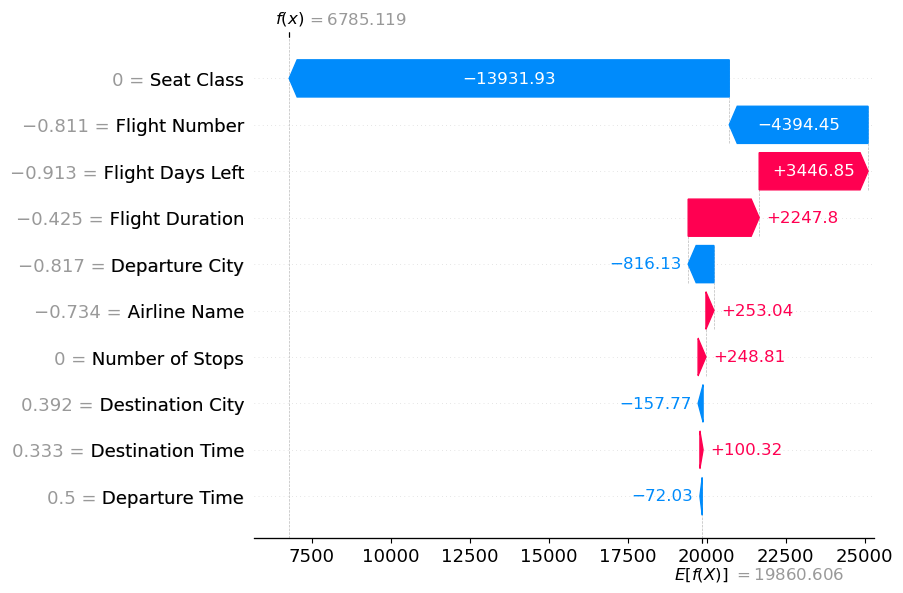

In [81]:
# Using the column names from the original df
X_test_df = pd.DataFrame(X_test, columns=df.columns[:-1])

# Setting a random seed for reproducibility
np.random.seed(42)

# Fitting the Stacking Ensemble Regressor model
se_cv_pipeline.fit(X_train, y_train)

# Reducing the number of background samples
background = shap.sample(X_train, 15, random_state=42)  # Use 15 samples for the background

# Creating a SHAP explainer
explainer = shap.KernelExplainer(se_cv_pipeline.predict, background)

# Calculating SHAP values for the first instance
shap_values = explainer.shap_values(X_test_df.iloc[0:1, :])

# Creating an Explanation object
explanation = shap.Explanation(values=shap_values[0], 
                               base_values=explainer.expected_value, 
                               data=X_test_df.iloc[0, :], 
                               feature_names=X_test_df.columns)

# Displaying Waterfall plot
shap.waterfall_plot(explanation)

# Disaplying Force plot
shap.force_plot(explainer.expected_value, shap_values[0], X_test_df.iloc[0, :])

<b>Observation(s):</b>

**SHAP Waterfall Plot (Prediction Starting at INR 19,860):**

* Seat Class significantly reduces the fare by around INR 13,932, showing that lower-class seats (like economy) drastically lower the price.
* Flight Number lowers the fare by about £4,394, suggesting that some flight numbers are associated with cheaper fares, likely due to factors such as scheduling or popularity.
* Booking closer to the departure date increases the fare by approximately INR 3,447, indicating that last-minute bookings generally cost more.
* Longer flight durations increase the fare by roughly INR 2,248, reinforcing that longer flights tend to be more expensive.
* Flights departing from this city reduce the fare by about INR 816, showing a small negative impact.
* The choice of airline adds around INR 253 to the fare, with more premium airlines likely charging higher fares.
* The number of stops doesn’t have any noticeable effect on the fare in this case.
* The destination city reduces the fare slightly by INR 158, implying a minor negative impact on fare.
* Departure and Destination Time have very minimal impacts on the fare, with adjustments around INR 100 or less in either direction.

**SHAP Force Plot (Prediction INR 6,785):**

* Seat Class is the most important factor, reducing the fare by around INR 13,932, just as seen in the waterfall plot.
* Booking closer to the departure date reduces the fare slightly, by around -0.91, a small but noticeable influence.
* Shorter flight durations slightly reduce the fare by approximately -0.42.
* The flight number has a moderate influence, contributing around -0.81, reflecting some flight numbers are linked to cheaper fares.
* The departure city has a small negative impact, reducing the fare by approximately -0.82.

**Overall Importance of Features from SHAP Summary Plot and Bar Plot:**

The overall importance of features affecting flight prices is primarily driven by **Seat Class**, which has the most significant impact on reducing fares. Other influential factors include **Flight Number**, **Booking Days Left**, and **Flight Duration**, which can either increase or decrease the fare. While factors like **Airline Name**, **Departure City**, and **Destination City** have a smaller but notable influence, features like **Departure and Destination Times** have minimal effects on the overall price.

### <b>9. Conclusion:</b>

In this project, a comprehensive machine learning pipeline was developed to predict flight fares using historical data from various Indian airlines. The data was imported, cleaned, and feature-engineered before being split into training and test sets. Five machine learning models—Linear Regression, Decision Tree Regressor, Random Forest Regressor, k-Nearest Neighbors Regressor, and Gradient Boosting Regressor—were trained and optimized through hyperparameter tuning. Ensemble models were also created to enhance performance, with the best model selected for interpretation using SHAP (SHapley Additive exPlanations).

The SHAP analysis revealed that Seat Class was the most critical factor influencing fares, with significant contributions from Flight Number, Flight Days Left, and Flight Duration. These insights provide valuable guidance for both consumers and airlines in understanding the key determinants of flight pricing. For future work, additional variables such as oil prices, holiday periods, and seasonal trends could be integrated into the model, as these factors are known to influence ticket prices. Further, incorporating more advanced models and ensemble techniques could enhance prediction accuracy. By capturing these additional features and expanding the model’s complexity, the system could provide more precise and context-sensitive fare predictions.